É importante ressaltar que os dados do Vigitel não devem ser analisados no Excel, do pacote Office (ou programa semelhante), pois a amostra do Vigitel leva em consideração fatores de ponderação para a análise de dados.

É necessário o uso de programas como o Epi Info ou R, ou, ainda, Stata, SPSS, SAS, entre outros, que possuem módulos de análise específicos para a utilização de fatores de ponderação

Link da base: https://svs.aids.gov.br/download/Vigitel/

trabalho relacionado que usou vigitel: https://www.scielo.br/j/ress/a/6hn69ts9c5mkPjHcGBMBbGJ/?lang=pt

referências:
artigo que usa métodos de ml para prever diabetico ou não
https://www.mdpi.com/1424-8220/22/16/6155

In [1]:
import pandas as pd 
pd.set_option('display.max_columns', 250)
import matplotlib.pyplot as plt
import seaborn as sns
import time
from glob import glob 
import re

In [2]:
# Machine Learning
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, balanced_accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Para rodar necessário criar uma pasta na raiz da pasta "databetes_predictor" com o nome "data" e colocar o arquivo desejado ex: Vigitel-2019-peso-rake.xls

### Leitura de um dos dataframes referente ao ano de 2019 somente para prototipação de visualizações e entendimento dos dados

In [4]:
# read file from google drive at folder databetes
# file_path = 'drive/My Drive/databetes/data/external/Vigitel-2021-peso-rake.xls'
# file_path = 'drive/My Drive/databetes/data/external/Vigitel-2020-peso-rake.xls'
file_path = 'drive/My Drive/databetes/data/external/Vigitel-2019-peso-rake.xls'
# file_path = '../data/Vigitel-2019-peso-rake.xls'
df = pd.read_excel(file_path, sheet_name='Sheet1')

In [5]:
file_path = 'drive/My Drive/databetes/data/external/Vigitel-2*'

Juntar todos os anos em um dataframe só?

In [6]:
df

chave  replica   ano  cidade  q6  q7  q8a  q8b  q8_anos   q9  \
0        311666031       29  2019      27  88   1    1  3.0        3   74   
1        318136030        4  2019      27  65   1    8  NaN        0   57   
2       1321836026        6  2019      10  68   1    1  3.0        3  777   
3       2323676021       16  2019      10  79   1    1  3.0        3   62   
4       2323716024       22  2019      10  70   1    1  3.0        3   66   
...            ...      ...   ...     ...  ..  ..  ...  ...      ...  ...   
52438  94312585036        4  2019      17  70   2    6  5.0       16   57   
52439  98318694029        1  2019       7  87   2    6  4.0       15   38   
52440  18315885032       25  2019      17  86   2    6  4.0       15  777   
52441  49311605030        3  2019      17  75   2    6  4.0       15   75   
52442  74315694027       13  2019       7  75   2    6  4.0       15  777   

       q11  q12   q13  q14  r190  r128a  q15  q16  q17  q18  q19  q20  q25  \
0      168  1.0  82.0  NaN     2      2    4    2  1.0  1.0  2.0  1.0    2   
1      159  1.0  62.0  NaN     2      2    4    5  1.0  1.0  5.0  NaN    3   
2      180  1.0  75.0  NaN     1      1    4    2  2.0  1.0  1.0  1.0    1   
3      170  1.0  54.0  NaN     1      1    4    3  2.0  3.0  2.0  3.0    5   
4      162  1.0  62.0  NaN     1      2    4    2  2.0  1.0  2.0  1.0    1   
...    ...  ...   ...  ...   ...    ...  ...  ...  ...  ...  ...  ...  ...   
52438  154  2.0   NaN  NaN     2      2    2    4  4.0  3.0  2.0  3.0    6   
52439  153  1.0  47.0  NaN     1      2    3    4  4.0  1.0  4.0  1.0    5   
52440  777  2.0   NaN  NaN     2      2    1    2  6.0  NaN  5.0  NaN    6   
52441  777  2.0   NaN  NaN     1      1    2    4  4.0  1.0  1.0  1.0    5   
52442  777  1.0  48.0  NaN     2      2    3    4  2.0  1.0  1.0  1.0    1   

       q26  q27  q28  q29  q30  q31  r301_a  r301_b  r301_c  r301_d  r301_e  \
0      3.0    4  3.0    5  3.0  1.0       0       0       0       0       1   
1      2.0    5  NaN    3  1.0  1.0       0       1       0       0       0   
2      2.0    2  1.0    1  1.0  1.0       1       1       0       0       1   
3      NaN    4  2.0    2  1.0  1.0       1       1       0       1       1   
4      1.0    2  2.0    1  1.0  1.0       1       1       0       1       1   
...    ...  ...  ...  ...  ...  ...     ...     ...     ...     ...     ...   
52438  NaN    4  2.0    5  2.0  1.0       1       0       1       1       1   
52439  NaN    4  1.0    6  NaN  NaN       0       0       0       1       1   
52440  NaN    2  2.0    5  1.0  1.0       0       0       0       1       0   
52441  NaN    2  2.0    4  2.0  1.0       1       1       1       1       1   
52442  2.0    3  2.0    3  2.0  3.0       1       1       0       1       1   

       r301_f  r301_g  r301_h  r301_i  r301_j  r301_k  r301_l  r302_a  r302_b  \
0           1       1       1       1       1       1       0       0       0   
1           1       1       0       0       0       0       0       1       0   
2           1       1       1       1       0       1       0       1       0   
3           1       1       0       1       1       1       0       1       0   
4           1       1       0       1       1       1       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
52438       1       0       0       1       0       1       1       0       0   
52439       1       1       0       1       0       1       0       0       1   
52440       1       0       0       1       0       1       0       0       0   
52441       1       1       0       1       0       1       1       1       0   
52442       1       0       0       1       0       1       0       1       0   

       r302_c  r302_d  r302_e  r302_f  r302_g  r302_h  r302_i  r302_j  r302_k  \
0           0       0       0       1       0       0       0       0       0   
1           0       0       0       0       0       0       0      

In [7]:
diabetes_count = df['diab'].value_counts()
diabetes_count

0    46192
1     6251
Name: diab, dtype: int64

## Explorar matriz de correlação

In [8]:
# erro: 'q78','q143'
# q6 e fet são sobre idade,
corr_columns= ['imc','hart','q42','q9_i','fet','r179','q60','q7','q6','diab']
df_corr = df[corr_columns]

In [9]:
df_corr = df_corr.rename(columns={"hart": "hipertensao", "q42": "ativo_fis","diab":"diabetes","q9_i":"peso"})

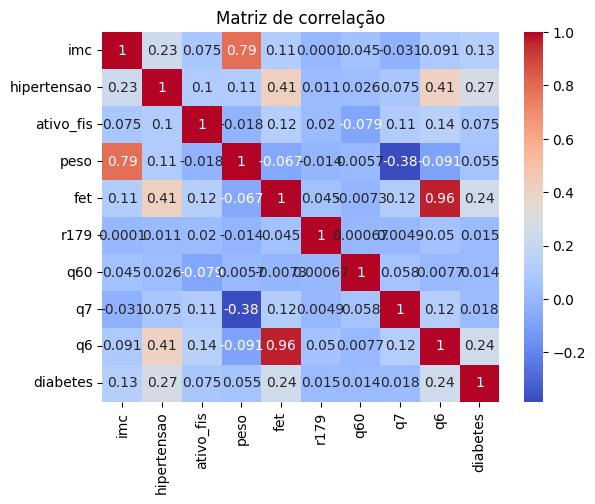

In [10]:
# Calculando a matriz de correlação
corr_matrix = df_corr.corr()

# Plotando a matriz de correlação
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Matriz de correlação')
plt.show()

## Subset para as variáveis usadas no American Diabetes Association (ADA) Risk Calculator https://www.mdcalc.com/calc/4020/american-diabetes-association-ada-risk-calculator

anos, 
gênero, 
1st degree relative with diabetes,
Hypertension,
Physically active,
BMI

In [11]:
df_ada = df[['imc','hart','q42','q9_i','diab','q11','cidade','q7','fet','chave']]
# bmi, hipertenso (1 sim 0 não). ativo (1 sim , 2 não). peso (input manual)
# fet: 1 a 6 : 18 a 24
# 25 a 34 anos
# 35 a 44 anos
# 45 a 54 anos
# 55 a 64 anos
# 65 anos e mais

In [12]:
df_ada = df_ada.rename(columns={"hart": "hipertensao", "q42": "ativo_fis","diab":"diabetes","q9_i":"peso","q11":"altura","q7":"sexo","fet":"faixa_etaria"})

In [13]:
df_ada

imc  hipertensao  ativo_fis  peso  diabetes  altura  cidade  \
0      26.218821            1          2    74         0     168      27   
1      22.546576            0          2    57         0     159      27   
2            NaN            1          2    67         1     180      10   
3      21.453287            0          1    62         0     170      10   
4      25.148605            0          1    66         0     162      10   
...          ...          ...        ...   ...       ...     ...     ...   
52438  24.034407            0          1    57         0     154      17   
52439  16.233072            0          1    38         0     153       7   
52440        NaN            1          1    70         0     777      17   
52441        NaN            1          1    75         0     777      17   
52442        NaN            1          1    64         0     777       7   

       sexo  faixa_etaria        chave  
0         1             6    311666031  
1         1             6    318136030  
2         1             6   1321836026  
3         1             6   2323676021  
4         1             6   2323716024  
...     ...           ...          ...  
52438     2             6  94312585036  
52439     2             6  98318694029  
52440     2             6  18315885032  
52441     2             6  49311605030  
52442     2             6  74315694027  

[52443 rows x 10 columns]

In [14]:
df_ada['imc_calc'] = df_ada['peso'] / (df_ada['altura'] / 100) ** 2

In [15]:
def get_bmi_class(imc):
    if imc < 18.5:
        return 'Abaixo do peso'
    elif imc < 25:
        return 'Peso normal'
    elif imc < 30:
        return 'Sobrepeso'
    elif imc < 35:
        return 'Obesidade classe I'
    elif imc < 40:
        return 'Obesidade classe II'
    else:
        return 'Obesidade classe III'

# Aplica a função para criar uma nova coluna 'classe_imc'
df_ada['classe_imc'] = df_ada['imc_calc'].apply(get_bmi_class)

In [16]:
df_ada

imc  hipertensao  ativo_fis  peso  diabetes  altura  cidade  \
0      26.218821            1          2    74         0     168      27   
1      22.546576            0          2    57         0     159      27   
2            NaN            1          2    67         1     180      10   
3      21.453287            0          1    62         0     170      10   
4      25.148605            0          1    66         0     162      10   
...          ...          ...        ...   ...       ...     ...     ...   
52438  24.034407            0          1    57         0     154      17   
52439  16.233072            0          1    38         0     153       7   
52440        NaN            1          1    70         0     777      17   
52441        NaN            1          1    75         0     777      17   
52442        NaN            1          1    64         0     777       7   

       sexo  faixa_etaria        chave   imc_calc      classe_imc  
0         1             6    311666031  26.218821       Sobrepeso  
1         1             6    318136030  22.546576     Peso normal  
2         1             6   1321836026  20.679012     Peso normal  
3         1             6   2323676021  21.453287     Peso normal  
4         1             6   2323716024  25.148605       Sobrepeso  
...     ...           ...          ...        ...             ...  
52438     2             6  94312585036  24.034407     Peso normal  
52439     2             6  98318694029  16.233073  Abaixo do peso  
52440     2             6  18315885032   1.159461  Abaixo do peso  
52441     2             6  49311605030   1.242279  Abaixo do peso  
52442     2             6  74315694027   1.060078  Abaixo do peso  

[52443 rows x 12 columns]

Remoção de Outliers

In [17]:
df_ada.describe()




imc   hipertensao     ativo_fis          peso      diabetes  \
count  47119.000000  52443.000000  52443.000000  52443.000000  52443.000000   
mean      26.498320      0.367561      1.437885     70.824896      0.119196   
std        4.970893      0.482146      0.496131     15.119749      0.324022   
min        9.962564      0.000000      1.000000     30.000000      0.000000   
25%       23.225431      0.000000      1.000000     60.000000      0.000000   
50%       25.826447      0.000000      1.000000     69.000000      0.000000   
75%       29.094282      1.000000      2.000000     80.000000      0.000000   
max       89.599998      1.000000      2.000000    300.000000      1.000000   

             altura        cidade          sexo  faixa_etaria         chave  \
count  52443.000000  52443.000000  52443.000000  52443.000000  5.244300e+04   
mean     209.812921     14.172301      1.650020      4.317373  4.216899e+10   
std      161.765488      7.873600      0.476968      1.628622  2.368828e+10   
min      120.000000      1.000000      1.000000      1.000000  2.109420e+08   
25%      158.000000      7.000000      1.000000      3.000000  2.434931e+10   
50%      165.000000     14.000000      2.000000      5.000000  3.732046e+10   
75%      173.000000     21.000000      2.000000      6.000000  5.831261e+10   
max      888.000000     27.000000      2.000000      6.000000  9.951894e+10   

           imc_calc  
count  52443.000000  
mean      24.604591  
std        8.249292  
min        0.496912  
25%       22.408179  
50%       25.390625  
75%       28.841532  
max       89.600000

In [18]:
def calculate_percentage(df, col_name):
    # Group by column and calculate the percentage of each category
    col_perc = df.groupby(col_name)[col_name].count() / len(df) * 100

    # Create a new DataFrame with the percentages
    df_perc = pd.DataFrame({
        col_name: col_perc.index,
        'percentage': col_perc.values
    })

    # Map the values in the column to their respective labels
    if col_name == 'sexo':
        df_perc[col_name] = df_perc[col_name].map({1: 'Man', 2: 'Female'})

    return df_perc

def dataset_percentages(df):
  """
  Receives the dataframe and returns some probabilities of desired columns
  """
  # Call the function and pass in the DataFrame and column name
  display(calculate_percentage(df, 'sexo'))

  display(calculate_percentage(df, 'faixa_etaria'))

  display(calculate_percentage(df, 'classe_imc'))

  display(calculate_percentage(df, 'cor'))

  display(calculate_percentage(df, 'pressao_alta'))

  display(calculate_percentage(df, 'bebida_alcoolica'))

  display(calculate_percentage(df, 'grau_escolaridade'))

  display(calculate_percentage(df, 'fumante'))

  display(calculate_percentage(df, 'diabetes'))


# Análise para varios anos e evolução

Definição de funções de pré processamento e plots

In [19]:
def dataset_preprocessing(df,
                          cols_to_keep = ['imc','hart','q42','q9_i','diab','q11','cidade','q7','fet','chave'],
                          cols_to_rename={"hart": "hipertensao", "q42": "ativo_fis","diab":"diabetes","q9_i":"peso","q11":"altura","q7":"sexo","fet":"faixa_etaria"}
                          ):
  """
  Recebe um dataframe, colunas a manter e colunas a serem renomeadas e faz o pré-processamento.
  Renomeia colunas, cria a coluna de imc e retorna o dataframe ajustado
  """
  df= df[cols_to_keep]
  df = df.rename(columns=cols_to_rename)
  df['imc_calc'] = df['peso'] / (df['altura'] / 100) ** 2
  df['classe_imc'] = df['imc_calc'].apply(get_bmi_class)
  state_abbrevs = ['SE','PA','BH','RR','MT','MS','PR','SC','CE','GO','PB','AP','AL','AM','RN','TO','RS','RO','PE','AC','RJ','BA','MA','SP','PI','ES','DF']

  # use the map() method to convert state numbers to abbreviations
  df['estado'] = df['cidade'].map(lambda x: state_abbrevs[x-1])
  # criar um dicionário que mapeia cada sigla para a região correspondente
  regioes = {'AC': 'Norte', 'AL': 'Nordeste', 'AP': 'Norte', 'AM': 'Norte',
            'BA': 'Nordeste', 'CE': 'Nordeste', 'DF': 'Centro-Oeste', 'ES': 'Sudeste',
            'GO': 'Centro-Oeste', 'MA': 'Nordeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste',
            'MG': 'Sudeste', 'PA': 'Norte', 'PB': 'Nordeste', 'PR': 'Sul', 'PE': 'Nordeste',
            'PI': 'Nordeste', 'RJ': 'Sudeste', 'RN': 'Nordeste', 'RS': 'Sul', 'RO': 'Norte',
            'RR': 'Norte', 'SC': 'Sul', 'SP': 'Sudeste', 'SE': 'Nordeste', 'TO': 'Norte'}
  df['regiao'] = df['estado'].map(regioes)

    # map all values greater than 5 to 5 using apply() and lambda
  df['moradores'] = df['moradores'].apply(lambda x: 6 if x > 6 else x)

  # replace values greater than 5 with "5 or more" using replace()
  df['moradores'] = df['moradores'].replace(6, '6 ou mais')
  # TODO decidir sobre os nas, tem muitos faltantes em alguns até mesmo para análise fica difícil então serão mantidos por enquanto
  # df.dropna()
  # df= df['ano'!=2022]
  return df

In [20]:
rename_cols_dict = {'q6':'idade (anos)', 
                          'q7':'sexo',
                          'civil':'estado conjugal atual',
                          'q8a':'grau_escolaridade',
                          'q9':'peso',
                          'q11':'altura',
                          #n estava em 2018# 'q15':'feijao',
                          'q16':'freq_horta',
                          'q25':'suco frutas',
                          'q27':'freq fruta',
                          'q29':'freq_refrigerante',
                           #n estava em 2017# 'q30':'tipo refrigerante',
                          'q35':'bebida_alcoolica',
                          'q36':'freq_alcool',
                          'q42':'exercicio_fisico',
                          'q45':'freq exercicio',
                          'q46':'duração exercicio',
                          'q47':'trabalha',
                          'q48':'anda bastante a pé',
                          'q49':'carrega peso',
                          'q50':'trajeto a pe ou bicicleta',
                          'q51':'duração do trajeto',
                          'q52':'curso/escola',
                          'q53':'como faz trajeto curso/escola',
                          'q54':'duração trajeto curso/escola',
                          'q59a':'quantas horas assiste tv/dia',
                          'q60':'fumante',
                          'q61_fx':'cigarros diário (agrup. em faixas)',
                          'q61a_fx':'cigarros semanal (agrup. em faixas)',
                          # 'q62':'idade inÍcio (anos)',
                          'q64':'ex-fumante',
                          #n estava em 2018# 'r403':'aparelhos eletrônicos com nicotina',
                          'q69':'cor',
                          'q74':'estado de saúde',
                          'q75':'pressao_alta',
                          'r129':'medicamento',
                          'q76':'diabetes',
                          # 'r138':'diabetes apenas na gravidez',
                          'q88':'posse_plano_saude',
                          # 'r179':'possui celular',
                          # 'r205':'já teve depressão',
                          # 'r206':'já teve depressão',
                           'r179':'possui celular',
                          'fet':'faixa_etaria',
                          'r900':'bolsa_familia',
                          'r143':'come_doce'
                               }

In [21]:
def remove_specific_value(df,column,value):
  """
  Remove valor específico, recebe o dataframe, coluna e valor e retorna ele com o valor removido de todas as linhas
  value é uma string, ex: '90'
  """
  mask = df[column].astype(str).str.match(value)
  if len(df[mask])> 1:
    print(f'coluna {column} com {len(df[mask])} valores {value}')
    # display(df[mask])
    # print(len(df))
    df = df[df[column] != int(value)]
    df = df.reset_index(drop=True)
  return df

def remove_unused_data(df,
                       list_cols = ['sexo','peso','altura','diabetes','faixa_etaria','cidade','exercicio_fisico','freq_horta',
                                    'grau_escolaridade','cor','freq_refrigerante','bebida_alcoolica','freq_alcool','pressao_alta',
                                    'posse_plano_saude','bolsa_familia'],
                       values = ['777','888']
                       ):
  """
  Função para remover dados indesejados, como 777 e 888 que estão presentes em várias colunas
  list_cols pode ser uma lista com colunas a serem removidas 
  values são os valores a serem removidos comuns a todas as colunas

  """
  for cols in list_cols:#df.columns
    for value in values:
      # remoção de valores de todas as colunas
      mask = df[cols].astype(str).str.match(value)
      # display(mask)

      if len(df[mask])> 1:
        print(f'coluna {cols} com {len(df[mask])} valores {value}')
        # display(df[mask])
        # print(len(df))
        df = df[df[cols] != int(value)]
        df = df.reset_index(drop=True)
        # print(len(df))

    # cor 80 não cadastrada
    if cols == 'cor':
      df = remove_specific_value(df,cols,'80')
    # consumo álcool 3 não cadastrado
    if cols == 'bebida_alcoolica':
      df = remove_specific_value(df,cols,'3')

  return df

## Concatenando os dados de acordo com lista de anos a serem analisados

In [22]:
years_analysis = ['2015','2016','2017','2018','2019','2020','2021']

In [23]:
appended_data = []
for file in sorted(glob(file_path)):

  # Extrair ano com regex
  year = re.search(r'\d{4}', file).group(0)
  # filtrar anos
  if year in years_analysis:
    print(file)
    print(year)
    # Padronização para encontrar o nome da planilha e já ler ela, já que nem sempre o nome é Sheet1
    xl = pd.ExcelFile(file)

    xl.sheet_names
    df = pd.read_excel(file, sheet_name=xl.sheet_names[0])
    appended_data.append(df)

appended_data = pd.concat(appended_data)
appended_data

drive/My Drive/databetes/data/external/Vigitel-2015-peso-rake.xls
2015
drive/My Drive/databetes/data/external/Vigitel-2016-peso-rake.xls
2016
drive/My Drive/databetes/data/external/Vigitel-2017-peso-rake.xls
2017
drive/My Drive/databetes/data/external/Vigitel-2018-peso-rake.xls
2018
drive/My Drive/databetes/data/external/Vigitel-2019-peso-rake.xls
2019
drive/My Drive/databetes/data/external/Vigitel-2020-peso-rake.xls
2020
drive/My Drive/databetes/data/external/Vigitel-2021-peso-rake.xls
2021


ordem  replica   ano  cidade  q6  q7  civil  q8a  q8b  q8_anos  r128a  \
0        1.0        1  2015       1  59   1      2    4  8.0        8      2   
1        2.0        1  2015       1  20   2      1    5  3.0       11      2   
2        3.0        1  2015       1  53   2      2    5  3.0       11      2   
3        4.0        1  2015       1  32   2      1    7  1.0       20      2   
4        5.0        1  2015       1  70   2      1    5  3.0       11      2   
...      ...      ...   ...     ...  ..  ..    ...  ...  ...      ...    ...   
27088    NaN       27  2021      26  79   2      1    6  4.0       15      2   
27089    NaN       36  2021      17  77   2      1    7  1.0       20      2   
27090    NaN       28  2021      24  73   2      1    6  4.0       15      1   
27091    NaN       35  2021      26  77   2      1    6  4.0       15      1   
27092    NaN       17  2021      17  77   2      2    6  4.0       15      2   

         q9  q11  q14  q15  q16  q17  q18  q19  q20  q21  q22  q23  q24  q25  \
0      76.0  172  NaN  2.0    4  2.0  2.0  1.0  2.0  2.0  1.0  5.0  NaN    2   
1      84.0  162  2.0  4.0    3  4.0  1.0  1.0  2.0  1.0  1.0  4.0  1.0    4   
2      77.0  777  NaN  2.0    1  1.0  1.0  1.0  1.0  2.0  1.0  2.0  1.0    4   
3      45.0  160  2.0  3.0    2  2.0  1.0  2.0  1.0  3.0  1.0  2.0  1.0    4   
4      62.0  153  NaN  4.0    4  1.0  1.0  4.0  1.0  1.0  1.0  2.0  1.0    6   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
27088  50.0  165  NaN  4.0    4  1.0  3.0  2.0  3.0  NaN  NaN  NaN  NaN    2   
27089  58.0  162  NaN  1.0    4  4.0  1.0  5.0  NaN  NaN  NaN  NaN  NaN    4   
27090  58.0  154  NaN  3.0    2  2.0  1.0  2.0  1.0  NaN  NaN  NaN  NaN    2   
27091  54.0  150  NaN  3.0    4  4.0  3.0  2.0  3.0  NaN  NaN  NaN  NaN    4   
27092  55.0  158  NaN  4.0    1  1.0  1.0  2.0  1.0  NaN  NaN  NaN  NaN    2   

       q26  q27  q28  q29  q30  q31  q32  q33  r143  r146  r144a  r144b  r145  \
0      2.0    2  1.0    6  NaN  NaN  1.0  1.0   6.0   NaN    6.0    6.0   3.0   
1      1.0    2  1.0    1  1.0  3.0  1.0  1.0   4.0   1.0    6.0    1.0   3.0   
2      1.0    3  1.0    2  1.0  1.0  6.0  NaN   2.0   1.0    1.0    6.0   3.0   
3      1.0    4  1.0    5  NaN  NaN  1.0  1.0   1.0   1.0    1.0    1.0   3.0   
4      NaN    4  3.0    6  NaN  NaN  4.0  2.0   1.0   1.0    6.0    6.0   4.0   
...    ...  ...  ...  ...  ...  ...  ...  ...   ...   ...    ...    ...   ...   
27088  3.0    4  3.0    6  NaN  NaN  NaN  NaN   NaN   NaN    NaN    NaN   NaN   
27089  1.0    4  1.0    6  NaN  NaN  NaN  NaN   NaN   NaN    NaN    NaN   NaN   
27090  2.0    3  2.0    6  NaN  NaN  NaN  NaN   NaN   NaN    NaN    NaN   NaN   
27091  3.0    4  3.0    5  3.0  1.0  NaN  NaN   NaN   NaN    NaN    NaN   NaN   
27092  2.0    4  2.0    6  NaN  NaN  NaN  NaN   NaN   NaN    NaN    NaN   NaN   

       q35  q36  q37  q38  q39  r200  q40  q40b  q42   q43  q44  q45  q46  \
0        2  NaN  NaN  NaN  NaN   NaN  NaN   NaN    2   NaN  NaN  NaN  NaN   
1        2  NaN  NaN  NaN  NaN   NaN  NaN   NaN    2   NaN  NaN  NaN  NaN   
2        2  NaN  NaN  NaN  NaN   NaN  NaN   NaN    2   NaN  NaN  NaN  NaN   
3        2  NaN  NaN  NaN  NaN   NaN  NaN   NaN    1  16.0  1.0  1.0  7.0   
4        1  1.0  NaN  2.0  NaN   NaN  NaN   NaN    1   1.0  1.0  2.0  4.0   
...    ...  ...  ...  ...  ...   ...  ...   ...  ...   ...  ...  ...  ...   
27088    3  NaN  NaN  NaN  NaN   NaN  NaN   NaN    1   NaN  1.0  2.0  5.0   
27089    2  NaN  NaN  NaN  NaN   NaN  NaN   NaN    2   NaN  NaN  NaN  NaN   
27090    3  NaN  NaN  NaN  NaN   NaN  NaN   NaN    1   NaN  1.0  1.0  7.0   
27091    3  NaN  NaN  NaN  NaN   NaN  NaN   NaN    2   NaN  NaN  NaN  NaN   
27092    2  NaN  NaN  NaN  NaN   NaN  NaN   NaN    1   NaN  1.0  4.0  2.0   

       q47  q48  q49  r147  r148_hh  r148_mm  q50  q51  q52  q53  q54  q55  \
0        1  1.0  2.0   NaN      NaN      NaN  3.0  NaN    2  NaN  NaN    3   
1        2  NaN  NaN   NaN     

Dessa forma, os dados são lidos de uma vez só, facilitando na hora de fazer as análises filtrando por anos. Será feita uma cópia dos dados para as análises em vários dataframes para se manter a integridade dos dados

In [24]:
df_ = appended_data.copy()

In [25]:
df_

ordem  replica   ano  cidade  q6  q7  civil  q8a  q8b  q8_anos  r128a  \
0        1.0        1  2015       1  59   1      2    4  8.0        8      2   
1        2.0        1  2015       1  20   2      1    5  3.0       11      2   
2        3.0        1  2015       1  53   2      2    5  3.0       11      2   
3        4.0        1  2015       1  32   2      1    7  1.0       20      2   
4        5.0        1  2015       1  70   2      1    5  3.0       11      2   
...      ...      ...   ...     ...  ..  ..    ...  ...  ...      ...    ...   
27088    NaN       27  2021      26  79   2      1    6  4.0       15      2   
27089    NaN       36  2021      17  77   2      1    7  1.0       20      2   
27090    NaN       28  2021      24  73   2      1    6  4.0       15      1   
27091    NaN       35  2021      26  77   2      1    6  4.0       15      1   
27092    NaN       17  2021      17  77   2      2    6  4.0       15      2   

         q9  q11  q14  q15  q16  q17  q18  q19  q20  q21  q22  q23  q24  q25  \
0      76.0  172  NaN  2.0    4  2.0  2.0  1.0  2.0  2.0  1.0  5.0  NaN    2   
1      84.0  162  2.0  4.0    3  4.0  1.0  1.0  2.0  1.0  1.0  4.0  1.0    4   
2      77.0  777  NaN  2.0    1  1.0  1.0  1.0  1.0  2.0  1.0  2.0  1.0    4   
3      45.0  160  2.0  3.0    2  2.0  1.0  2.0  1.0  3.0  1.0  2.0  1.0    4   
4      62.0  153  NaN  4.0    4  1.0  1.0  4.0  1.0  1.0  1.0  2.0  1.0    6   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
27088  50.0  165  NaN  4.0    4  1.0  3.0  2.0  3.0  NaN  NaN  NaN  NaN    2   
27089  58.0  162  NaN  1.0    4  4.0  1.0  5.0  NaN  NaN  NaN  NaN  NaN    4   
27090  58.0  154  NaN  3.0    2  2.0  1.0  2.0  1.0  NaN  NaN  NaN  NaN    2   
27091  54.0  150  NaN  3.0    4  4.0  3.0  2.0  3.0  NaN  NaN  NaN  NaN    4   
27092  55.0  158  NaN  4.0    1  1.0  1.0  2.0  1.0  NaN  NaN  NaN  NaN    2   

       q26  q27  q28  q29  q30  q31  q32  q33  r143  r146  r144a  r144b  r145  \
0      2.0    2  1.0    6  NaN  NaN  1.0  1.0   6.0   NaN    6.0    6.0   3.0   
1      1.0    2  1.0    1  1.0  3.0  1.0  1.0   4.0   1.0    6.0    1.0   3.0   
2      1.0    3  1.0    2  1.0  1.0  6.0  NaN   2.0   1.0    1.0    6.0   3.0   
3      1.0    4  1.0    5  NaN  NaN  1.0  1.0   1.0   1.0    1.0    1.0   3.0   
4      NaN    4  3.0    6  NaN  NaN  4.0  2.0   1.0   1.0    6.0    6.0   4.0   
...    ...  ...  ...  ...  ...  ...  ...  ...   ...   ...    ...    ...   ...   
27088  3.0    4  3.0    6  NaN  NaN  NaN  NaN   NaN   NaN    NaN    NaN   NaN   
27089  1.0    4  1.0    6  NaN  NaN  NaN  NaN   NaN   NaN    NaN    NaN   NaN   
27090  2.0    3  2.0    6  NaN  NaN  NaN  NaN   NaN   NaN    NaN    NaN   NaN   
27091  3.0    4  3.0    5  3.0  1.0  NaN  NaN   NaN   NaN    NaN    NaN   NaN   
27092  2.0    4  2.0    6  NaN  NaN  NaN  NaN   NaN   NaN    NaN    NaN   NaN   

       q35  q36  q37  q38  q39  r200  q40  q40b  q42   q43  q44  q45  q46  \
0        2  NaN  NaN  NaN  NaN   NaN  NaN   NaN    2   NaN  NaN  NaN  NaN   
1        2  NaN  NaN  NaN  NaN   NaN  NaN   NaN    2   NaN  NaN  NaN  NaN   
2        2  NaN  NaN  NaN  NaN   NaN  NaN   NaN    2   NaN  NaN  NaN  NaN   
3        2  NaN  NaN  NaN  NaN   NaN  NaN   NaN    1  16.0  1.0  1.0  7.0   
4        1  1.0  NaN  2.0  NaN   NaN  NaN   NaN    1   1.0  1.0  2.0  4.0   
...    ...  ...  ...  ...  ...   ...  ...   ...  ...   ...  ...  ...  ...   
27088    3  NaN  NaN  NaN  NaN   NaN  NaN   NaN    1   NaN  1.0  2.0  5.0   
27089    2  NaN  NaN  NaN  NaN   NaN  NaN   NaN    2   NaN  NaN  NaN  NaN   
27090    3  NaN  NaN  NaN  NaN   NaN  NaN   NaN    1   NaN  1.0  1.0  7.0   
27091    3  NaN  NaN  NaN  NaN   NaN  NaN   NaN    2   NaN  NaN  NaN  NaN   
27092    2  NaN  NaN  NaN  NaN   NaN  NaN   NaN    1   NaN  1.0  4.0  2.0   

       q47  q48  q49  r147  r148_hh  r148_mm  q50  q51  q52  q53  q54  q55  \
0        1  1.0  2.0   NaN      NaN      NaN  3.0  NaN    2  NaN  NaN    3   
1        2  NaN  NaN   NaN     

Aparecem cerca de 5000 linhas de 2022, provavelmente da pesquisa de 2021, entender se dá pra usar esses dados de alguma forma

In [26]:
df_2022 = df[df['ano']==2022]
df_2022

chave  replica   ano  cidade  q6  q7  q8a  q8b  q8_anos  q9  q11  \
1      28386296024        1  2022      20  23   1    5  1.0        9  70  186   
5      15363799029      100  2022      12  43   1    4  1.0        1  68  161   
8      27354459065       45  2022       4  44   1    4  7.0        7  84  168   
9      86315377039       16  2022      22  24   1    5  1.0        9  80  165   
12     24365329028       45  2022      12  19   1    5  2.0       10  54  180   
...            ...      ...   ...     ...  ..  ..  ...  ...      ...  ..  ...   
27063  91311532031       42  2022      21  80   2    6  8.0       19  50  150   
27064  38383304021       44  2022       8  65   2    6  4.0       15  68  167   
27070  22379382027       19  2022      26  69   2    6  8.0       19  90  160   
27085  21315955036       32  2022      17  82   2    6  4.0       15  53  153   
27087  24373202030       16  2022      26  67   2    7  1.0       20  85  167   

       q12   q13  q14  r190  r128a  q15  q16  q17  q18  q19  q20  q25  q26  \
1      2.0   NaN  NaN     2      2    4    1  1.0  1.0  1.0  3.0    4  2.0   
5      1.0  39.0  NaN     2      2    4    2  4.0  1.0  2.0  1.0    4  3.0   
8      1.0  55.0  NaN     1      1    4    3  2.0  3.0  5.0  NaN    2  3.0   
9      1.0  75.0  NaN     2      1    1    3  2.0  3.0  2.0  1.0    1  2.0   
12     NaN   NaN  NaN     2      2    4    2  5.0  NaN  2.0  1.0    5  NaN   
...    ...   ...  ...   ...    ...  ...  ...  ...  ...  ...  ...  ...  ...   
27063  2.0   NaN  NaN     2      2    4    4  3.0  3.0  3.0  3.0    2  2.0   
27064  1.0  56.0  NaN     1      1    1    1  5.0  NaN  1.0  1.0    5  NaN   
27070  1.0  40.0  NaN     1      1    4    4  4.0  1.0  2.0  3.0    3  3.0   
27085  2.0   NaN  NaN     2      2    2    4  2.0  1.0  2.0  1.0    2  3.0   
27087  1.0  50.0  NaN     1      1    4    2  1.0  1.0  1.0  1.0    5  NaN   

       q27  q28  q29  q30  q31  r301_a  r301_b  r301_c  r301_d  r301_e  \
1        4  1.0    1  3.0  2.0       0       0       0       1       1   
5        4  3.0    4  1.0  2.0       1       1       1       1       1   
8        5  NaN    1  1.0  1.0       1       0       0       1       1   
9        2  2.0    2  1.0  3.0       0       1       0       1       1   
12       3  2.0    4  1.0  3.0       0       1       0       0       1   
...    ...  ...  ...  ...  ...     ...     ...     ...     ...     ...   
27063    3  3.0    5  1.0  1.0       1       1       0       1       1   
27064    2  1.0    4  3.0  1.0       0       1       1       0       1   
27070    4  1.0    6  NaN  NaN       0       1       1       1       1   
27085    4  3.0    5  1.0  2.0       1       1       1       1       1   
27087    2  3.0    2  2.0  2.0       1       0       1       1       1   

       r301_f  r301_g  r301_h  r301_i  r301_j  r301_k  r301_l  r302_a  r302_b  \
1           0       0       0       0       0       0       0       1       0   
5           1       1       1       1       1       1       0       0       0   
8           1       1       0       1       0       0       0       1       0   
9           1       0       1       1       0       0       0       0       0   
12          1       1       0       0       0       1       1       1       1   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
27063       1       1       1       1       1       1       0       0       0   
27064       1       1       0       1       0       1       0       1       1   
27070       1       1       1       1       1       1       1       0       1   
27085       1       1       0       1       0       1       0       0       0   
27087       0       1       1       1       1       1       0       1       1   

       r302_c  r302_d  r302_e  r302_f  r302_g  r302_h  r302_i  r302_j  r302_k  \
1           0       0       0       1       0       0       0       1       0   
5           1       0       0       1       0       0       1       0       0  

## Análises gerais do conjunto de dados como todos os anos juntos de 2015 a 2021

ano  cidade  idade (anos)  sexo  estado conjugal atual  \
0      2015       1            59     1                      2   
1      2015       1            20     2                      1   
2      2015       1            53     2                      2   
3      2015       1            32     2                      1   
4      2015       1            70     2                      1   
...     ...     ...           ...   ...                    ...   
27088  2021      26            79     2                      1   
27089  2021      17            77     2                      1   
27090  2021      24            73     2                      1   
27091  2021      26            77     2                      1   
27092  2021      17            77     2                      2   

       grau_escolaridade  peso  altura  freq_horta  suco frutas  freq fruta  \
0                      4  76.0     172           4            2           2   
1                      5  84.0     162           3            4           2   
2                      5  77.0     777           1            4           3   
3                      7  45.0     160           2            4           4   
4                      5  62.0     153           4            6           4   
...                  ...   ...     ...         ...          ...         ...   
27088                  6  50.0     165           4            2           4   
27089                  7  58.0     162           4            4           4   
27090                  6  58.0     154           2            2           3   
27091                  6  54.0     150           4            4           4   
27092                  6  55.0     158           1            2           4   

       freq_refrigerante  bebida_alcoolica  freq_alcool  exercicio_fisico  \
0                      6                 2          NaN                 2   
1                      1                 2          NaN                 2   
2                      2                 2          NaN                 2   
3                      5                 2          NaN                 1   
4                      6                 1          1.0                 1   
...                  ...               ...          ...               ...   
27088                  6                 3          NaN                 1   
27089                  6                 2          NaN                 2   
27090                  6                 3          NaN                 1   
27091                  5                 3          NaN                 2   
27092                  6                 2          NaN                 1   

       freq exercicio  duração exercicio  trabalha  anda bastante a pé  \
0                 NaN                NaN         1                 1.0   
1                 NaN                NaN         2                 NaN   
2                 NaN                NaN         1                 1.0   
3                 1.0                7.0         1                 1.0   
4                 2.0                4.0         2                 NaN   
...               ...                ...       ...                 ...   
27088             2.0                5.0         2                 NaN   
27089             NaN                NaN         2                 NaN   
27090             1.0                7.0         2                 NaN   
27091             NaN                NaN         2                 NaN   
27092             4.0                2.0         2                 NaN   

       carrega peso  trajeto a pe ou bicicleta  duração do trajeto  \
0               2.0                        3.0                 NaN   
1               NaN                        NaN                 NaN   
2               1.0                        3.0                 NaN   
3               2.0                        2.0                 2.0   
4               NaN                        NaN                 NaN   
...             ...             

coluna peso com 14009 valores 777
coluna peso com 303 valores 888
coluna altura com 15342 valores 777
coluna altura com 198 valores 888
coluna diabetes com 278 valores 777
coluna grau_escolaridade com 1617 valores 777
coluna grau_escolaridade com 1488 valores 888
coluna cor com 4309 valores 555
coluna cor com 660 valores 666
coluna cor com 4846 valores 777
coluna cor com 770 valores 888
coluna cor com 11672 valores 80
coluna bebida_alcoolica com 23 valores 888
coluna bebida_alcoolica com 12397 valores 3
coluna pressao_alta com 113 valores 777
coluna posse_plano_saude com 631 valores 888
coluna bolsa_familia com 1588 valores 777
coluna r148_mm com 921 valores 777


ano         cidade   idade (anos)           sexo  \
count  248261.000000  248261.000000  248261.000000  248261.000000   
mean     2017.480688      14.089897      50.856876       1.606523   
std         1.817520       7.844531      17.884841       0.488522   
min      2015.000000       1.000000      18.000000       1.000000   
25%      2016.000000       7.000000      37.000000       1.000000   
50%      2017.000000      14.000000      52.000000       2.000000   
75%      2019.000000      21.000000      65.000000       2.000000   
max      2022.000000      27.000000     107.000000       2.000000   

       estado conjugal atual  grau_escolaridade           peso         altura  \
count          248261.000000      248261.000000  248261.000000  248261.000000   
mean                7.304192           5.141367      71.629818     164.686693   
std                66.856333           1.421065      15.108050      10.051984   
min                 1.000000           1.000000      30.000000     120.000000   
25%                 1.000000           5.000000      60.000000     158.000000   
50%                 2.000000           5.000000      70.000000     165.000000   
75%                 3.000000           6.000000      80.000000     171.000000   
max               888.000000           8.000000     210.000000     220.000000   

          freq_horta    suco frutas     freq fruta  freq_refrigerante  \
count  248261.000000  248261.000000  248261.000000      248261.000000   
mean        2.929143       3.037110       3.050133           3.603812   
std         1.221950       1.617374       1.247513           2.071214   
min         1.000000       1.000000       1.000000           1.000000   
25%         2.000000       2.000000       2.000000           1.000000   
50%         3.000000       3.000000       4.000000           4.000000   
75%         4.000000       4.000000       4.000000           6.000000   
max         6.000000       6.000000       6.000000           6.000000   

       bebida_alcoolica   freq_alcool  exercicio_fisico  freq exercicio  \
count     248261.000000  97214.000000     248261.000000   138245.000000   
mean           1.608420      2.754470          1.412981        2.169597   
std            0.488105      2.077991          0.492370        0.919001   
min            1.000000      1.000000          1.000000        1.000000   
25%            1.000000      1.000000          1.000000        1.000000   
50%            2.000000      1.000000          1.000000        2.000000   
75%            2.000000      5.000000          2.000000        3.000000   
max            2.000000      6.000000          2.000000        4.000000   

       duração exercicio       trabalha  anda bastante a pé   carrega peso  \
count      138249.000000  248261.000000       140684.000000  140684.000000   
mean            6.185737       1.433322            2.776570       2.762652   
std             1.316415       0.495535           31.605971      27.404943   
min             1.000000       1.000000            1.000000       1.000000   
25%             5.000000       1.000000            1.000000       2.000000   
50%             7.000000       1.000000            1.000000       2.000000   
75%             7.000000       2.000000            2.000000       2.000000   
max             7.000000       2.000000          777.000000     777.000000   

       trajeto a pe ou bicicleta  duração do trajeto   curso/escola  \
count              140684.000000        42471.000000  248261.000000   
mean                    2.541526            3.358056       2.657389   
std                     0.749309            1.802453      28.614517   
min                     1.000000            1.000000       1.000000   
25%                     2.000000            2.000000       1.000000   
50%                     3.000000            3.000000       2.000000   
75%                     3.000000            4.000000       2.000000   
max                     3.000000            7.000000     888

sexo  percentage
0     Man   39.347703
1  Female   60.652297

faixa_etaria  percentage
0             1    9.178647
1             2   12.617366
2             3   15.509887
3             4   17.603248
4             5   19.587853
5             6   25.502999

classe_imc  percentage
0        Abaixo do peso    2.254885
1    Obesidade classe I   14.398556
2   Obesidade classe II    3.632065
3  Obesidade classe III    1.334080
4           Peso normal   41.109155
5             Sobrepeso   37.271259

cor  percentage
0    1   47.604739
1    2    8.128945
2    3    1.427530
3    4   41.466038
4    5    1.372749

pressao_alta  percentage
0             1   32.979808
1             2   67.020192

bebida_alcoolica  percentage
0                 1   39.157983
1                 2   60.842017

grau_escolaridade  percentage
0                  1    6.205566
1                  2    0.260613
2                  3    2.025288
3                  4   12.184757
4                  5   35.106602
5                  6   33.720963
6                  7    9.233428
7                  8    1.262784

fumante  percentage
0        1    5.820085
1        2    1.292591
2        3   92.887324

diabetes  percentage
0         1   10.607788
1         2   89.392212

r148_mm  diabetes  count  percentage
0       0.0         1   1401    6.648949
2       1.0         1      3    9.677419
4       2.0         1      1    4.347826
6       3.0         1      2    6.060606
9       5.0         1      4    4.819277
12      9.0         1      1  100.000000
13     10.0         1     65    5.363036
15     11.0         1      7    6.796117
17     12.0         1     46    6.571429
19     13.0         1      3    7.142857
21     14.0         1      6   18.750000
23     15.0         1     49    7.050360
25     16.0         1      1    6.666667
27     17.0         1      1   33.333333
29     18.0         1      2   10.526316
31     20.0         1     62    5.860113
35     23.0         1      1   25.000000
37     24.0         1      7   10.447761
39     25.0         1      2    6.896552
43     30.0         1    220    6.825939
51     40.0         1     28    5.656566
55     45.0         1      2    4.081633
58     50.0         1      6   10.909091
64     60.0         1      1   14.285714

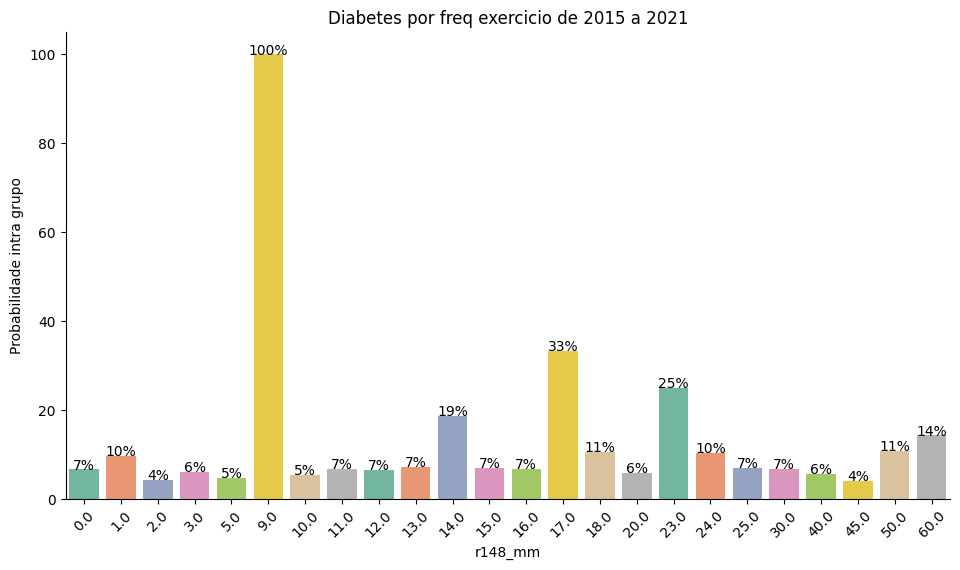

ano  diabetes  count  percentage
0   2015         1   3800    9.031921
2   2016         1   5179   11.588204
4   2017         1   4401   10.219673
6   2018         1   4293   10.056926
8   2019         1   4574   10.760327
10  2020         1   1767   10.955422
12  2021         1   1888   14.030916
14  2022         1    433   11.856517

<ipython-input-52-49b2f88009e8>:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=x_,y='percentage',  data=diabetes_count, legend=True,palette=palette


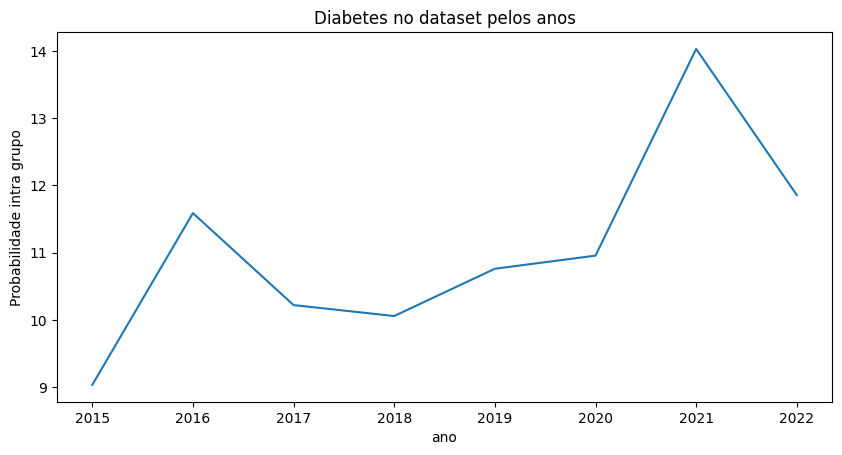

sexo  diabetes  count  percentage
0     1         1  10366   10.611660
2     2         1  15969   10.605276

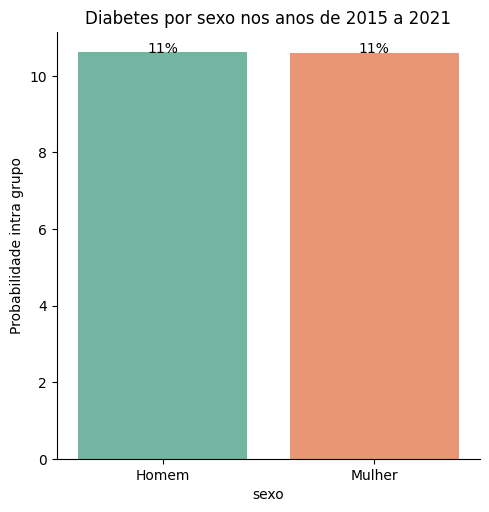

faixa_etaria  diabetes  count  percentage
0              1         1    180    0.789924
2              2         1    460    1.468523
4              3         1   1351    3.508635
6              4         1   3423    7.832593
8              5         1   7337   15.087705
10             6         1  13584   21.454970

<ipython-input-52-49b2f88009e8>:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=x_,y='percentage',  data=diabetes_count, legend=True,palette=palette


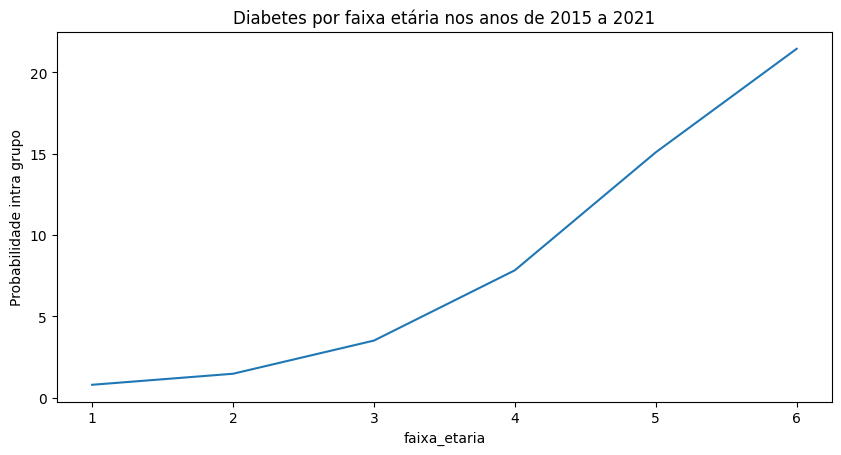

cor  diabetes  count  percentage
0    1         1  13226   11.191024
2    2         1   2234   11.069818
4    3         1    417   11.766366
6    4         1  10013    9.726647
8    5         1    445   13.057512

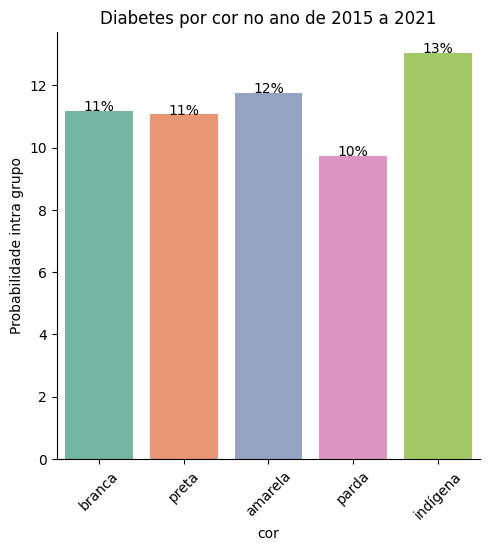

classe_imc  diabetes  count  percentage
0         Abaixo do peso         1    251    4.483744
2     Obesidade classe I         1   5848   16.359872
4    Obesidade classe II         1   1832   20.317179
6   Obesidade classe III         1    743   22.433575
8            Peso normal         1   6948    6.807894
10             Sobrepeso         1  10713   11.577867

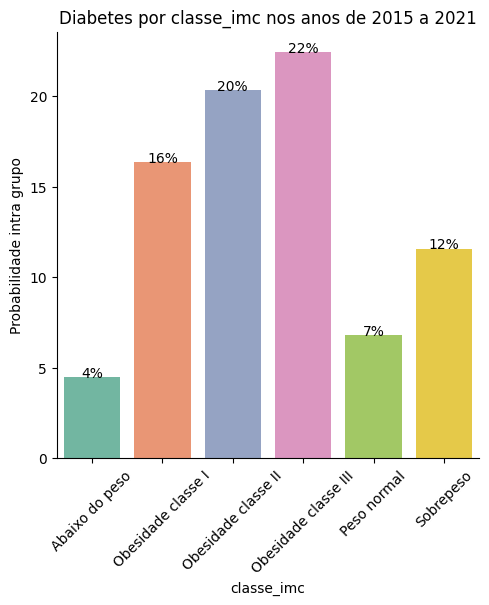

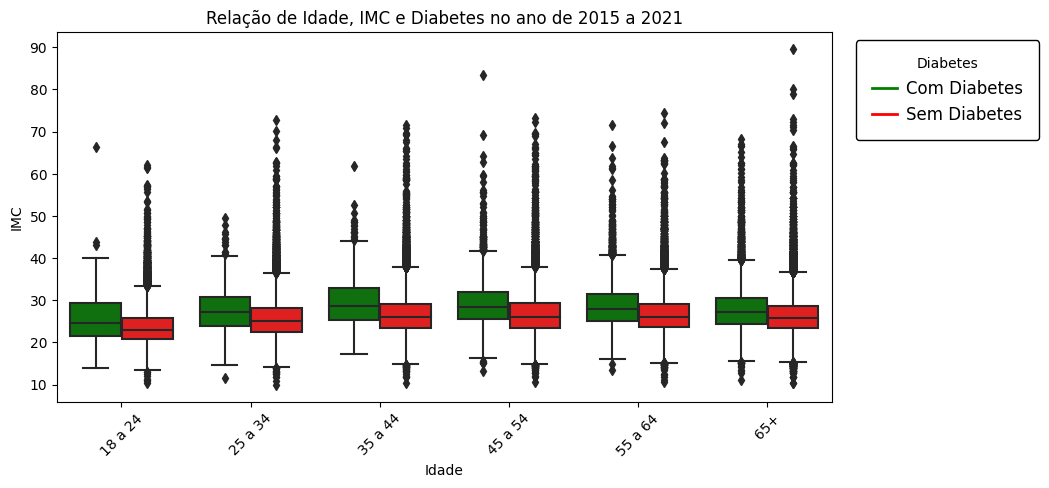

cidade  diabetes  count  percentage
0        1         1    983   10.889554
2        2         1    888    9.546334
4        3         1   1061   11.246555
6        4         1    627    7.839460
8        5         1   1198   12.881720
10       6         1   1041   11.155165
12       7         1   1249   12.377366
14       8         1   1147   11.389137
16       9         1    952   10.980392
18      10         1   1046   10.959765
20      11         1    977   10.867631
22      12         1    639    8.522273
24      13         1   1006   11.507664
26      14         1    803    9.285384
28      15         1    979   10.997529
30      16         1    714    7.285714
32      17         1   1266   12.386264
34      18         1    810    8.862144
36      19         1   1041   11.657335
38      20         1    668    8.058873
40      21         1   1307   13.750658
42      22         1    991   11.022133
44      23         1    857    9.435209
46      24         1   1069   10.960730
48      25         1    777    8.345865
50      26         1   1167   12.246825
52      27         1   1072   10.550143

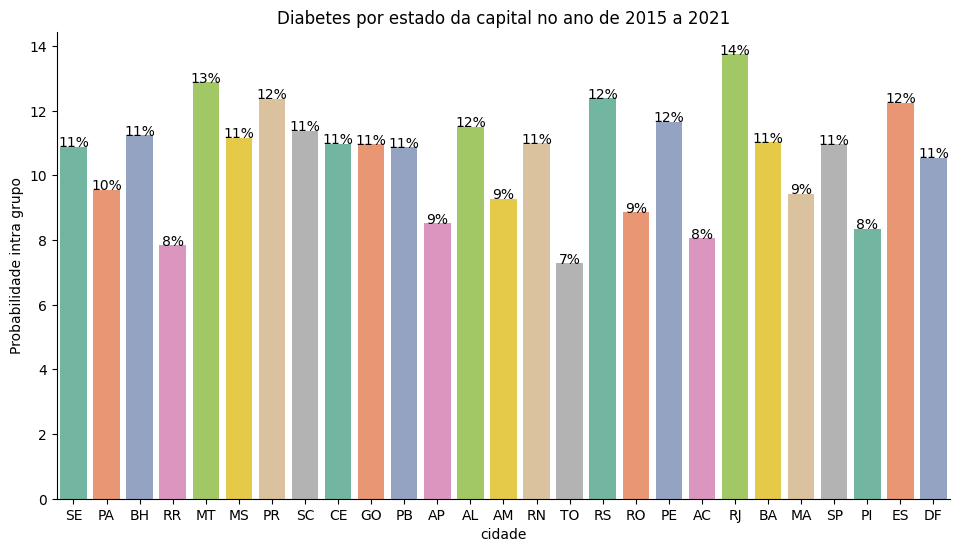

exercicio_fisico  diabetes  count  percentage
0                 1         1  12858    8.822924
2                 2         1  13477   13.144830

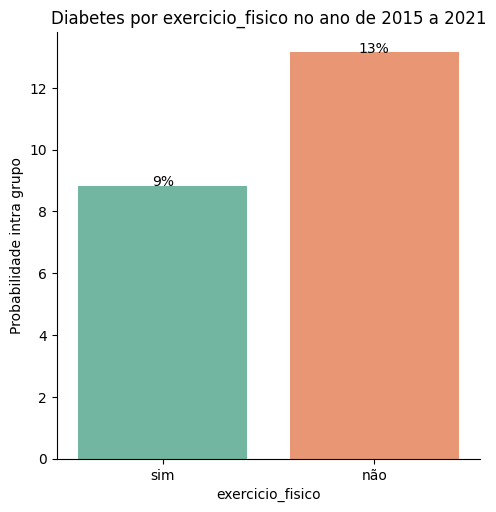

freq_horta  diabetes  count  percentage
0            1         1   4076   10.750646
2            2         1   6725   10.588383
4            3         1   3410    8.769899
6            4         1  11078   11.319906
8            5         1    719   11.274894
10           6         1    327    8.811641

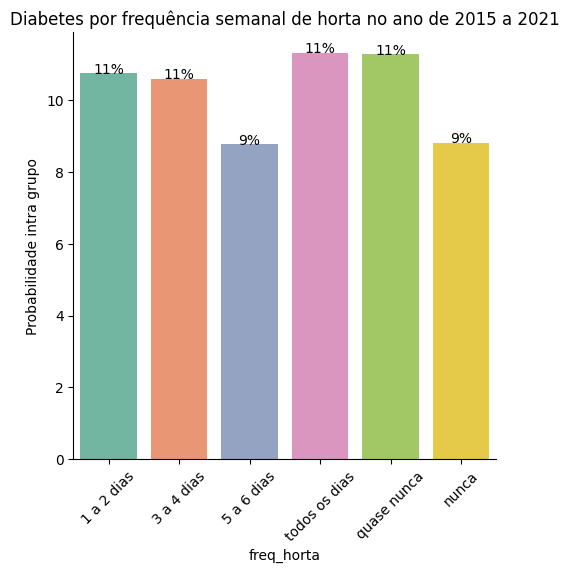

freq_refrigerante  diabetes  count  percentage
0                   1         1   6411    8.444526
2                   2         1   1712    7.093139
4                   3         1    585    6.061548
6                   4         1   1288    8.683927
8                   5         1   6993   11.630963
10                  6         1   9346   14.695200

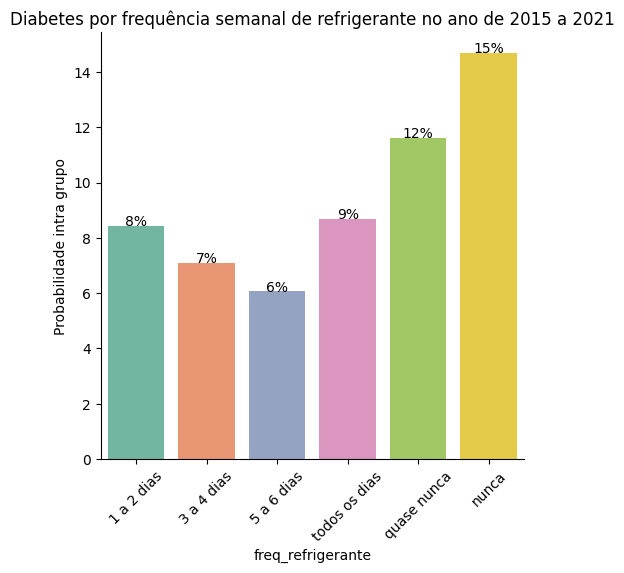

bebida_alcoolica  diabetes  count  percentage
0                 1         1   7365    7.576069
2                 2         1  18970   12.559005

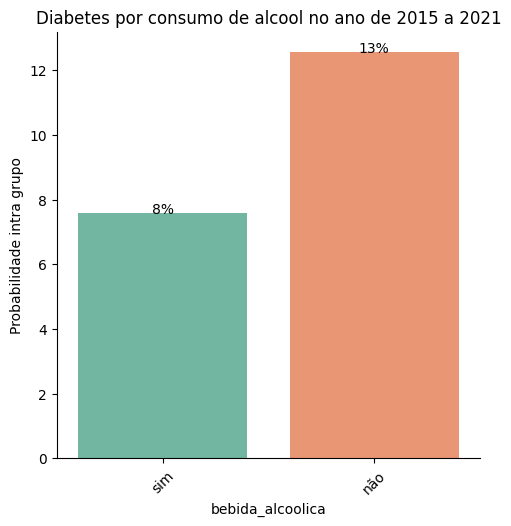

freq_alcool  diabetes  count  percentage
0           1.0         1   3525    7.042816
2           2.0         1    700    7.596310
4           3.0         1    159    9.689214
6           4.0         1    424   12.444966
8           5.0         1   1195    7.173300
10          6.0         1   1362    8.386183

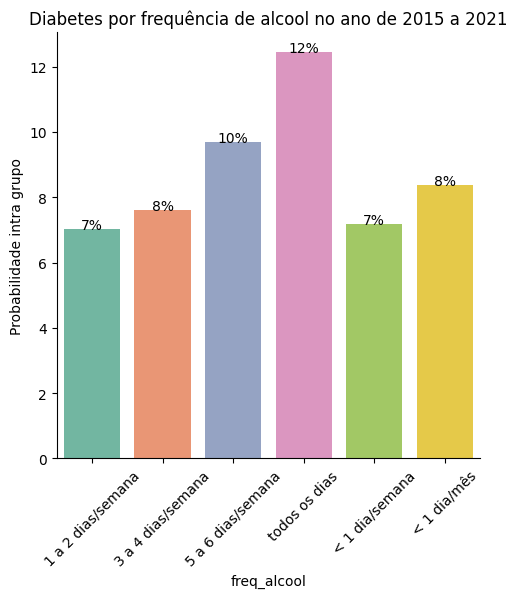

grau_escolaridade  diabetes  count  percentage
0                   1         1   3610   23.432429
2                   2         1    134   20.710974
4                   3         1   1039   20.664280
6                   4         1   4790   15.834711
8                   5         1   8269    9.487585
10                  6         1   6018    7.188590
12                  7         1   1663    7.254722
14                  8         1    812   25.901116

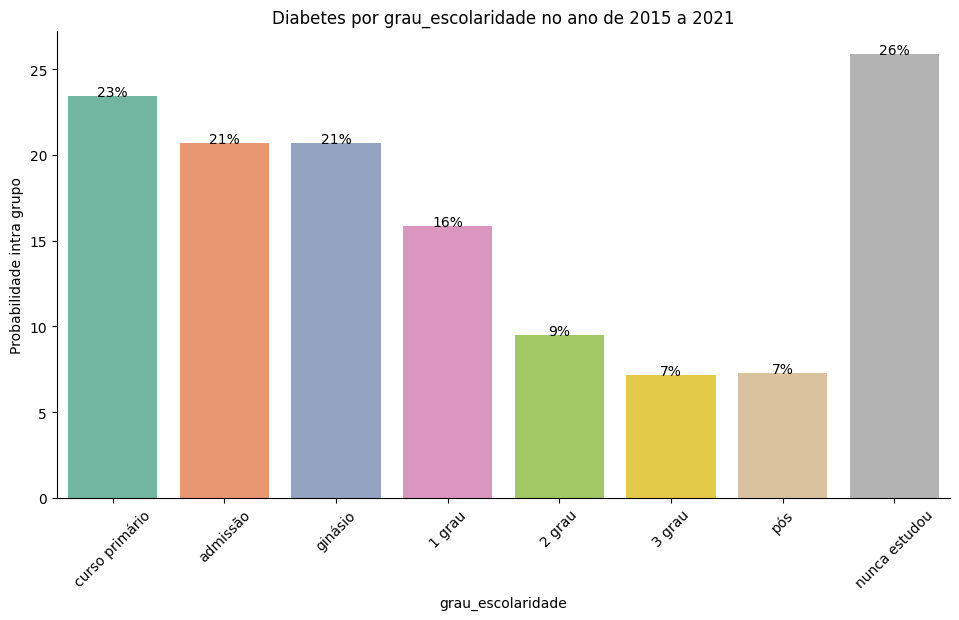

moradores  diabetes  count  percentage
0           1         1   4244   15.729005
2           2         1   9104   14.107074
4           3         1   5933    9.505880
6           4         1   3837    7.328953
8           5         1   1894    7.395549
10  6 ou mais         1   1323    8.083832

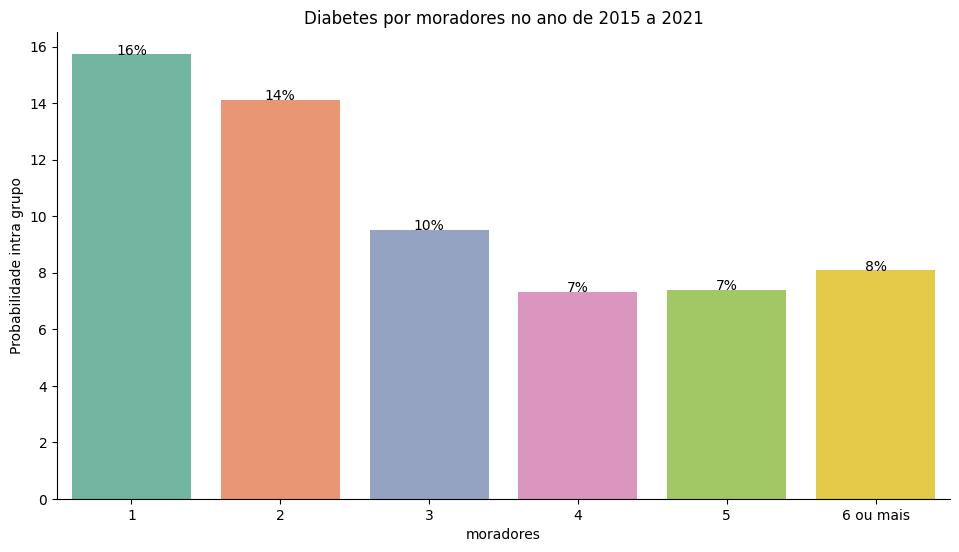

bolsa_familia  diabetes  count  percentage
0            1.0         1    579    8.471105
2            2.0         1  17868   10.756339

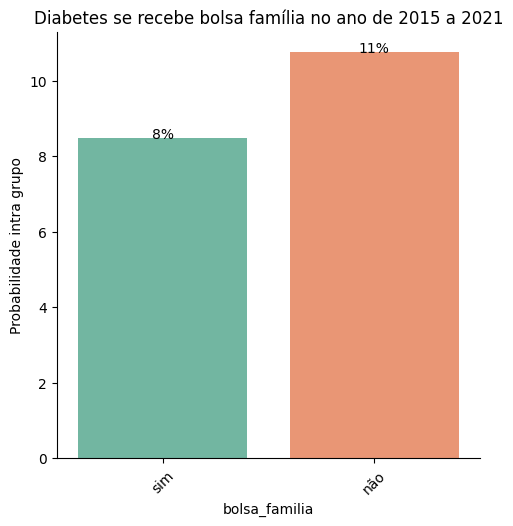

fumante  diabetes  count  percentage
0        1         1   1413    9.779223
2        2         1    222    6.918043
4        3         1  24700   10.711049

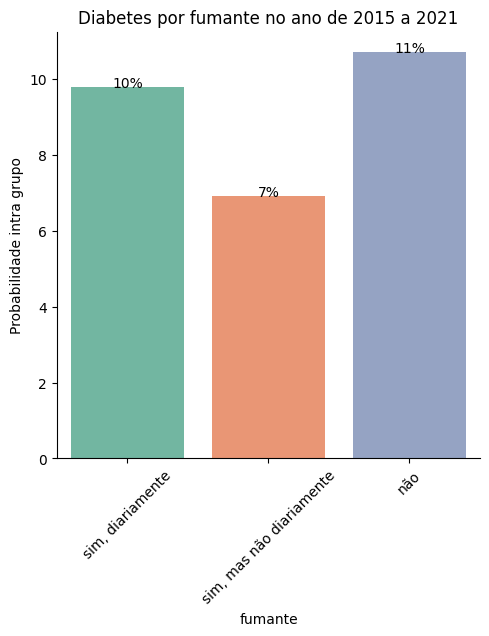

pressao_alta  diabetes  count  percentage
0             1         1  18379   22.447359
2             2         1   7956    4.781681

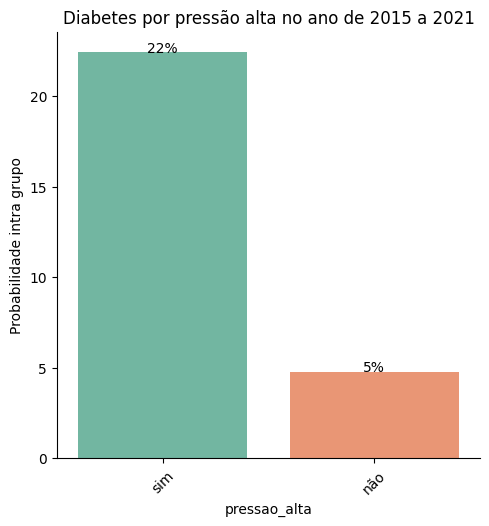

posse_plano_saude  diabetes  count  percentage
0                  1         1  14082   10.527732
2                  2         1    978    9.722636
4                  3         1  11275   10.795569

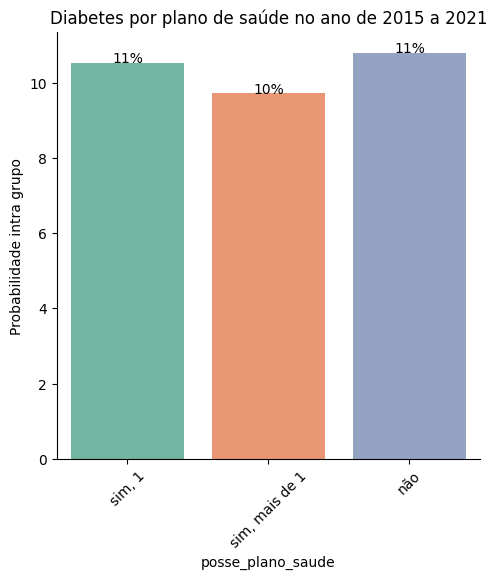

In [52]:
def catplot_var_general(df,x_,hue_,title_,graph ='bar',height_=5,aspect_=1,x_values=None,xtick_rotation=None,display_data=True,palette=sns.color_palette("Set2")):
    """
    Faz o plot geral de uma variável categórica pelo 'hue_'. Ex: plot de sexo no x_ e hue_ diabetes irá exibir um plot relacionando os dois
    Recebe a lista de anos a serem analisados, o título, rótulos do eixo x e parâmetros opcionais de estilização
    """
    df_plot = df#[df['ano']==int(year)]

    # Groupby coluna e 'diabetes' com contagem dos casos
    diabetes_count = df.groupby([x_, hue_]).size().reset_index(name='count')

    # Cálculo da porcentagem pela outra coluna
    total_per_gender = diabetes_count.groupby(x_)['count'].transform('sum')
    diabetes_count['percentage'] = diabetes_count['count'] / total_per_gender * 100
    diabetes_count = diabetes_count[diabetes_count['diabetes'].astype(int)==1]

    if display_data == True:
      display(diabetes_count)

    if graph == 'bar':
          ax = sns.catplot(x=x_,y='percentage', kind='bar', data=diabetes_count, legend=True,height=height_,aspect=aspect_,palette=palette
                      )
    elif graph == 'line':
      ax = sns.lineplot(x=x_,y='percentage',  data=diabetes_count, legend=True,palette=palette
                    )
    
    plt.title(f'{title_}')
    if x_values != None:
      ax.set_xticklabels(x_values)
    if xtick_rotation != None:
      plt.xticks(rotation = xtick_rotation)

    plt.ylabel('Probabilidade intra grupo')

    # Mostrar porcentagens
    total = len(df_plot)
    for p in plt.gca().patches:
        height = p.get_height()
        plt.text(p.get_x() + p.get_width() / 2, height , f'{height:.0f}%', ha='center', fontsize=10)
        

    plt.show()
    plt.close()


df = df_.copy()
# years_analysis = ['2017','2018','2019','2020','2021']
years_analysis = ['2015','2016','2017','2018','2019','2020','2021']

# display(df)
# um preprocessamento pra todos os anos
df = dataset_preprocessing(df,
                              cols_to_keep = ["ano","cidade","q6","q7","civil","q8a","q9","q11","q16","q25","q27",
                  "q29","q35","q36","q42","q45","q46","q47","q48","q49","q50","q51","q52",
                  "q53","q54","q59a","q60","q61_fx","q64","q69","q74","q75",
                  "r129","q76","q88","moradores","adultos","fet",'imc','r900','r148_mm'],
                              cols_to_rename = rename_cols_dict)
display(df)

# removendo valores 777 e 888
df = remove_unused_data(df,
                       list_cols = ['sexo','peso','altura','diabetes','faixa_etaria','cidade','exercicio_fisico','freq_horta',
                                    'grau_escolaridade','cor','freq_refrigerante','bebida_alcoolica','freq_alcool','pressao_alta',
                                    'posse_plano_saude','bolsa_familia','r148_mm'],
                       values = ['555','666','777','888']
                       )

display(df.describe())

dataset_percentages(df)

# sns.set_palette('Spectral', n_colors=2)

catplot_var_general(df,'r148_mm','diabetes',f'Diabetes por freq exercicio de {years_analysis[0]} a {years_analysis[-1]}',xtick_rotation=45, height_=5.4, aspect_=9.7/5.4)

catplot_var_general(df,'ano','diabetes',f'Diabetes no dataset pelos anos', 'line',height_=5.4, aspect_=9.7/5.4)

catplot_var_general(df,'sexo','diabetes',f'Diabetes por sexo nos anos de {years_analysis[0]} a {years_analysis[-1]}',x_values=["Homem","Mulher"])

catplot_var_general(df,'faixa_etaria','diabetes',f'Diabetes por faixa etária nos anos de {years_analysis[0]} a {years_analysis[-1]}','line')

catplot_var_general(df,'cor','diabetes',f'Diabetes por cor no ano de {years_analysis[0]} a {years_analysis[-1]}',x_values=["branca","preta","amarela","parda","indígena"],xtick_rotation=45)

catplot_var_general(df,'classe_imc','diabetes',f'Diabetes por classe_imc nos anos de {years_analysis[0]} a {years_analysis[-1]}',xtick_rotation=45)

# ax = sns.scatterplot(x='faixa_etaria', y='imc', hue='diabetes', data=df,palette='tab10')# 
# plt.title(f'Relação de Idade, IMC e Diabetes no ano de {years_analysis[0]} a {years_analysis[-1]}')
# plt.xlabel('Idade')
# plt.ylabel('IMC')
# ticks_loc = [".","18 a 24","25 a 34","35 a 44","45 a 54","55 a 64","65+"]
# ax.set_xticklabels(ticks_loc)
# plt.xticks(rotation = 45)
# plt.show()
# plt.close()

boxplot_colors = ['green', 'red']
ax = sns.boxplot(x='faixa_etaria', y='imc', hue='diabetes', data=df,palette=boxplot_colors)# 
plt.title(f'Relação de Idade, IMC e Diabetes no ano de {years_analysis[0]} a {years_analysis[-1]}')
plt.xlabel('Idade')
plt.ylabel('IMC')
ticks_loc = ["18 a 24","25 a 34","35 a 44","45 a 54","55 a 64","65+"]
ax.set_xticklabels(ticks_loc)
plt.xticks(rotation = 45)
plt.legend(title="Diabetes", loc='upper left', facecolor='white', framealpha=1, frameon=True,
           edgecolor='black', borderpad=1, handletextpad=0.5, handlelength=1.5, bbox_to_anchor=(1.02, 1), markerscale=1, ncol=1,
           prop={'size': 12}, labels=['Com Diabetes', 'Sem Diabetes'],handles=[plt.Line2D([0], [0], color=c, lw=2) for c in boxplot_colors])
plt.show()
plt.close()


catplot_var_general(df,'cidade','diabetes',f'Diabetes por estado da capital no ano de {years_analysis[0]} a {years_analysis[-1]}', height_=5.4, aspect_=9.7/5.4,
                    x_values=['SE','PA','BH','RR','MT','MS','PR','SC','CE','GO','PB','AP','AL','AM','RN','TO','RS','RO','PE','AC','RJ','BA','MA','SP','PI','ES','DF'])

catplot_var_general(df,'exercicio_fisico','diabetes',f'Diabetes por exercicio_fisico no ano de {years_analysis[0]} a {years_analysis[-1]}',x_values=["sim","não"])

catplot_var_general(df,'freq_horta','diabetes',f'Diabetes por frequência semanal de horta no ano de {years_analysis[0]} a {years_analysis[-1]}',
                    x_values=["1 a 2 dias","3 a 4 dias","5 a 6 dias","todos os dias","quase nunca","nunca"],xtick_rotation=45)

catplot_var_general(df,'freq_refrigerante','diabetes',f'Diabetes por frequência semanal de refrigerante no ano de {years_analysis[0]} a {years_analysis[-1]}',
                    x_values=["1 a 2 dias","3 a 4 dias","5 a 6 dias","todos os dias","quase nunca","nunca"],xtick_rotation=45)

catplot_var_general(df,'bebida_alcoolica','diabetes',f'Diabetes por consumo de alcool no ano de {years_analysis[0]} a {years_analysis[-1]}',x_values=["sim","não"],xtick_rotation=45)

catplot_var_general(df,'freq_alcool','diabetes',f'Diabetes por frequência de alcool no ano de {years_analysis[0]} a {years_analysis[-1]}',
                    x_values=["1 a 2 dias/semana","3 a 4 dias/semana","5 a 6 dias/semana","todos os dias","< 1 dia/semana","< 1 dia/mês"],xtick_rotation=45)

# TODO suco de fruta
# catplot_var(df,'feijao','diabetes',f'Diabetes por feijao no ano de {year}')


catplot_var_general(df,'grau_escolaridade','diabetes',f'Diabetes por grau_escolaridade no ano de {years_analysis[0]} a {years_analysis[-1]}',
                    x_values=["curso primário","admissão","ginásio","1 grau","2 grau","3 grau","pós","nunca estudou"],xtick_rotation=45, height_=5.4, aspect_=9.7/5.4)

catplot_var_general(df,'moradores','diabetes',f'Diabetes por moradores no ano de {years_analysis[0]} a {years_analysis[-1]}', height_=5.4, aspect_=9.7/5.4)

catplot_var_general(df,'bolsa_familia','diabetes',f'Diabetes se recebe bolsa família no ano de {years_analysis[0]} a {years_analysis[-1]}',x_values=["sim","não"],xtick_rotation=45)

catplot_var_general(df,'fumante','diabetes',f'Diabetes por fumante no ano de {years_analysis[0]} a {years_analysis[-1]}'
,x_values=["sim, diariamente","sim, mas não diariamente","não"],xtick_rotation=45)

catplot_var_general(df,'pressao_alta','diabetes',f'Diabetes por pressão alta no ano de {years_analysis[0]} a {years_analysis[-1]}',x_values=["sim","não"],xtick_rotation=45)

catplot_var_general(df,'posse_plano_saude','diabetes',f'Diabetes por plano de saúde no ano de {years_analysis[0]} a {years_analysis[-1]}',
                    x_values=["sim, 1","sim, mais de 1","não"],xtick_rotation=45)





## Gerais 2019 a 2021



ano  cidade  idade (anos)  sexo  estado conjugal atual  \
0      2015       1            59     1                      2   
1      2015       1            20     2                      1   
2      2015       1            53     2                      2   
3      2015       1            32     2                      1   
4      2015       1            70     2                      1   
...     ...     ...           ...   ...                    ...   
27088  2021      26            79     2                      1   
27089  2021      17            77     2                      1   
27090  2021      24            73     2                      1   
27091  2021      26            77     2                      1   
27092  2021      17            77     2                      2   

       grau_escolaridade  peso  altura  freq_horta  suco frutas  freq fruta  \
0                      4  76.0     172           4            2           2   
1                      5  84.0     162           3            4           2   
2                      5  77.0     777           1            4           3   
3                      7  45.0     160           2            4           4   
4                      5  62.0     153           4            6           4   
...                  ...   ...     ...         ...          ...         ...   
27088                  6  50.0     165           4            2           4   
27089                  7  58.0     162           4            4           4   
27090                  6  58.0     154           2            2           3   
27091                  6  54.0     150           4            4           4   
27092                  6  55.0     158           1            2           4   

       freq_refrigerante  bebida_alcoolica  freq_alcool  exercicio_fisico  \
0                      6                 2          NaN                 2   
1                      1                 2          NaN                 2   
2                      2                 2          NaN                 2   
3                      5                 2          NaN                 1   
4                      6                 1          1.0                 1   
...                  ...               ...          ...               ...   
27088                  6                 3          NaN                 1   
27089                  6                 2          NaN                 2   
27090                  6                 3          NaN                 1   
27091                  5                 3          NaN                 2   
27092                  6                 2          NaN                 1   

       freq exercicio  duração exercicio  trabalha  anda bastante a pé  \
0                 NaN                NaN         1                 1.0   
1                 NaN                NaN         2                 NaN   
2                 NaN                NaN         1                 1.0   
3                 1.0                7.0         1                 1.0   
4                 2.0                4.0         2                 NaN   
...               ...                ...       ...                 ...   
27088             2.0                5.0         2                 NaN   
27089             NaN                NaN         2                 NaN   
27090             1.0                7.0         2                 NaN   
27091             NaN                NaN         2                 NaN   
27092             4.0                2.0         2                 NaN   

       carrega peso  trajeto a pe ou bicicleta  duração do trajeto  \
0               2.0                        3.0                 NaN   
1               NaN                        NaN                 NaN   
2               1.0                        3.0                 NaN   
3               2.0                        2.0                 2.0   
4               NaN                        NaN                 NaN   
...             ...             

coluna peso com 14009 valores 777
coluna peso com 303 valores 888
coluna altura com 15342 valores 777
coluna altura com 198 valores 888
coluna diabetes com 278 valores 777
coluna grau_escolaridade com 1617 valores 777
coluna grau_escolaridade com 1488 valores 888
coluna cor com 4309 valores 555
coluna cor com 660 valores 666
coluna cor com 4846 valores 777
coluna cor com 770 valores 888
coluna cor com 11672 valores 80
coluna bebida_alcoolica com 23 valores 888
coluna bebida_alcoolica com 12397 valores 3
coluna pressao_alta com 113 valores 777
coluna posse_plano_saude com 631 valores 888
coluna bolsa_familia com 1588 valores 777


ano         cidade   idade (anos)           sexo  \
count  249182.000000  249182.000000  249182.000000  249182.000000   
mean     2017.483137      14.087266      50.847441       1.606131   
std         1.816340       7.844625      17.874760       0.488607   
min      2015.000000       1.000000      18.000000       1.000000   
25%      2016.000000       7.000000      37.000000       1.000000   
50%      2017.000000      14.000000      52.000000       2.000000   
75%      2019.000000      21.000000      65.000000       2.000000   
max      2022.000000      27.000000     107.000000       2.000000   

       estado conjugal atual  grau_escolaridade           peso         altura  \
count          249182.000000      249182.000000  249182.000000  249182.000000   
mean                7.320974           5.140423      71.635307     164.690620   
std                66.966221           1.421049      15.112233      10.051985   
min                 1.000000           1.000000      30.000000     120.000000   
25%                 1.000000           5.000000      60.000000     158.000000   
50%                 2.000000           5.000000      70.000000     165.000000   
75%                 3.000000           6.000000      80.000000     171.000000   
max               888.000000           8.000000     210.000000     220.000000   

          freq_horta    suco frutas     freq fruta  freq_refrigerante  \
count  249182.000000  249182.000000  249182.000000      249182.000000   
mean        2.929028       3.037587       3.049691           3.603735   
std         1.222266       1.617666       1.248036           2.070966   
min         1.000000       1.000000       1.000000           1.000000   
25%         2.000000       2.000000       2.000000           1.000000   
50%         3.000000       3.000000       4.000000           4.000000   
75%         4.000000       4.000000       4.000000           6.000000   
max         6.000000       6.000000       6.000000           6.000000   

       bebida_alcoolica   freq_alcool  exercicio_fisico  freq exercicio  \
count     249182.000000  97660.000000     249182.000000   138662.000000   
mean           1.608078      2.755099          1.413300        2.169513   
std            0.488180      2.078108          0.492427        0.919082   
min            1.000000      1.000000          1.000000        1.000000   
25%            1.000000      1.000000          1.000000        1.000000   
50%            2.000000      1.000000          1.000000        2.000000   
75%            2.000000      5.000000          2.000000        3.000000   
max            2.000000      6.000000          2.000000        4.000000   

       duração exercicio       trabalha  anda bastante a pé   carrega peso  \
count      138666.000000  249182.000000       141605.000000  141605.000000   
mean            6.185972       1.431721            2.772028       2.751188   
std             1.316527       0.495317           31.570396      27.316043   
min             1.000000       1.000000            1.000000       1.000000   
25%             5.000000       1.000000            1.000000       2.000000   
50%             7.000000       1.000000            1.000000       2.000000   
75%             7.000000       2.000000            2.000000       2.000000   
max             7.000000       2.000000          777.000000     777.000000   

       trajeto a pe ou bicicleta  duração do trajeto   curso/escola  \
count              141605.000000        42789.000000  249182.000000   
mean                    2.540998            3.360653       2.654176   
std                     0.749666            1.803977      28.561646   
min                     1.000000            1.000000       1.000000   
25%                     2.000000            2.000000       1.000000   
50%                     3.000000            3.000000       2.000000   
75%                     3.000000            4.000000       2.000000   
max                     3.000000            7.000000     888

sexo  percentage
0     Man   39.386874
1  Female   60.613126

faixa_etaria  percentage
0             1    9.170004
1             2   12.611264
2             3   15.537238
3             4   17.629283
4             5   19.592105
5             6   25.460105

classe_imc  percentage
0        Abaixo do peso    2.255781
1    Obesidade classe I   14.397910
2   Obesidade classe II    3.631482
3  Obesidade classe III    1.336774
4           Peso normal   41.101685
5             Sobrepeso   37.276368

cor  percentage
0    1   47.586102
1    2    8.131807
2    3    1.427069
3    4   41.482130
4    5    1.372892

pressao_alta  percentage
0             1   32.963858
1             2   67.036142

bebida_alcoolica  percentage
0                 1   39.192237
1                 2   60.807763

grau_escolaridade  percentage
0                  1    6.207912
1                  2    0.260452
2                  3    2.021815
3                  4   12.207944
4                  5   35.146600
5                  6   33.670169
6                  7    9.218563
7                  8    1.266544

fumante  percentage
0        1    5.829073
1        2    1.293833
2        3   92.877094

diabetes  percentage
0         1   10.597074
1         2   89.402926

ano  diabetes  count  percentage
0   2015         1   3800    9.031921
2   2016         1   5181   11.571706
4   2017         1   4420   10.215638
6   2018         1   4321   10.045099
8   2019         1   4588   10.743473
10  2020         1   1772   10.953146
12  2021         1   1890   13.997926
14  2022         1    434   11.832061

<ipython-input-52-49b2f88009e8>:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=x_,y='percentage',  data=diabetes_count, legend=True,palette=palette


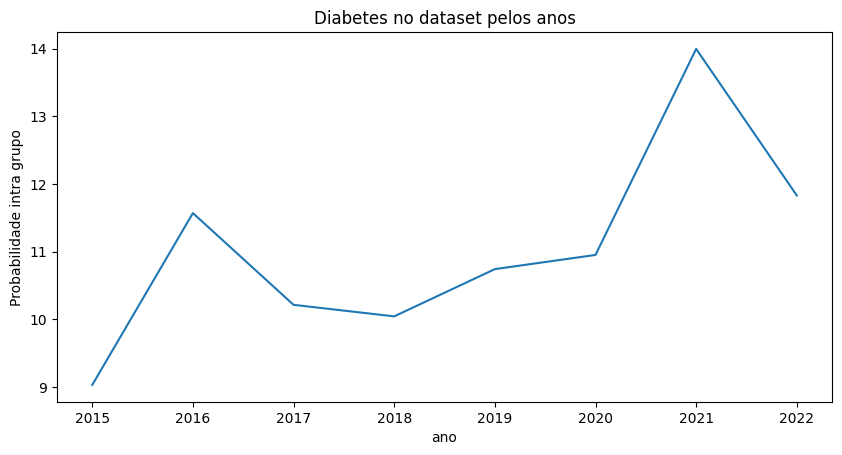

sexo  diabetes  count  percentage
0     1         1  10403   10.599623
2     2         1  16003   10.595417

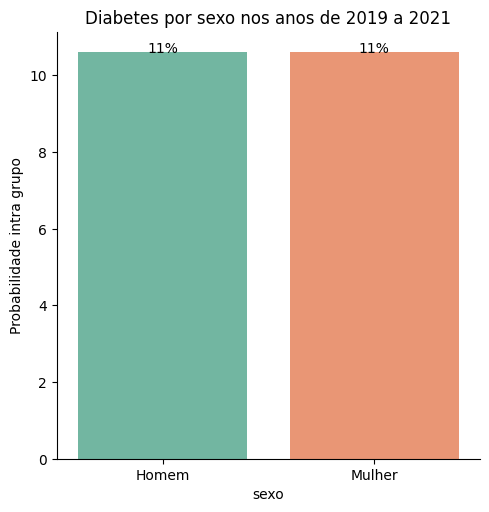

faixa_etaria  diabetes  count  percentage
0              1         1    180    0.787746
2              2         1    461    1.466985
4              3         1   1359    3.510177
6              4         1   3434    7.817160
8              5         1   7361   15.077837
10             6         1  13611   21.454242

<ipython-input-52-49b2f88009e8>:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax = sns.lineplot(x=x_,y='percentage',  data=diabetes_count, legend=True,palette=palette


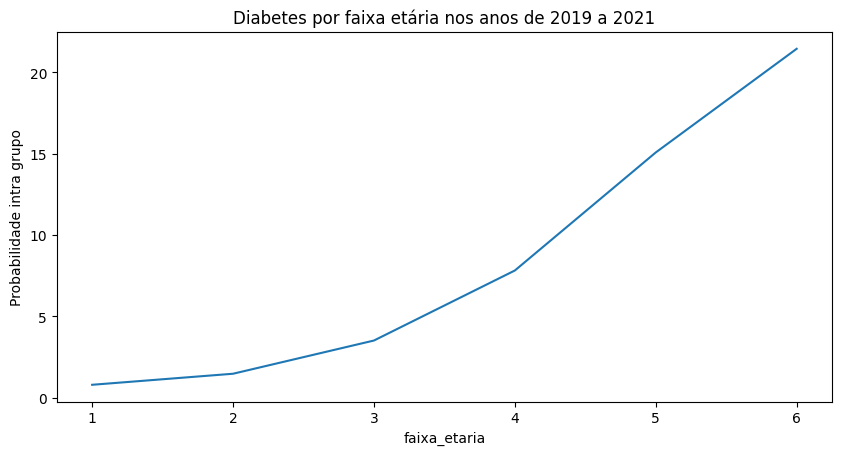

cor  diabetes  count  percentage
0    1         1  13255   11.178485
2    2         1   2240   11.054632
4    3         1    418   11.754781
6    4         1  10047    9.719831
8    5         1    446   13.037124

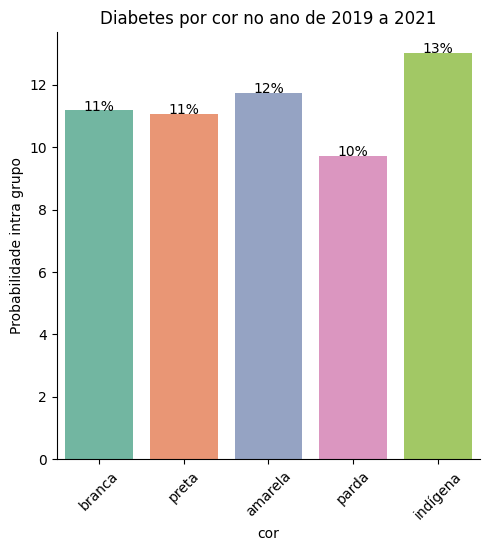

classe_imc  diabetes  count  percentage
0         Abaixo do peso         1    253    4.500978
2     Obesidade classe I         1   5861   16.336371
4    Obesidade classe II         1   1834   20.267433
6   Obesidade classe III         1    743   22.305614
8            Peso normal         1   6966    6.801539
10             Sobrepeso         1  10749   11.572250

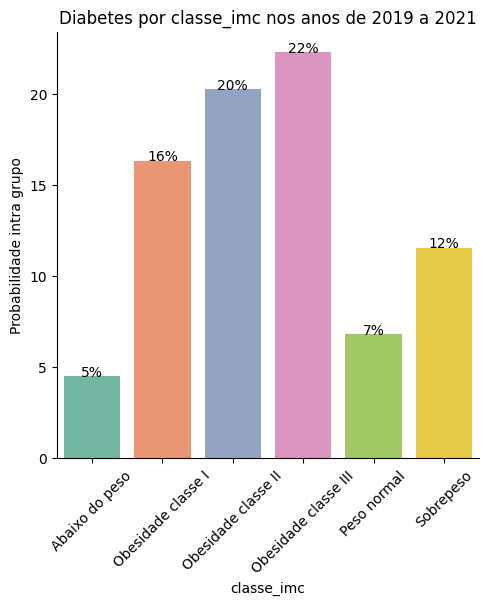

<ipython-input-55-e57a1638161e>:56: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks_loc)


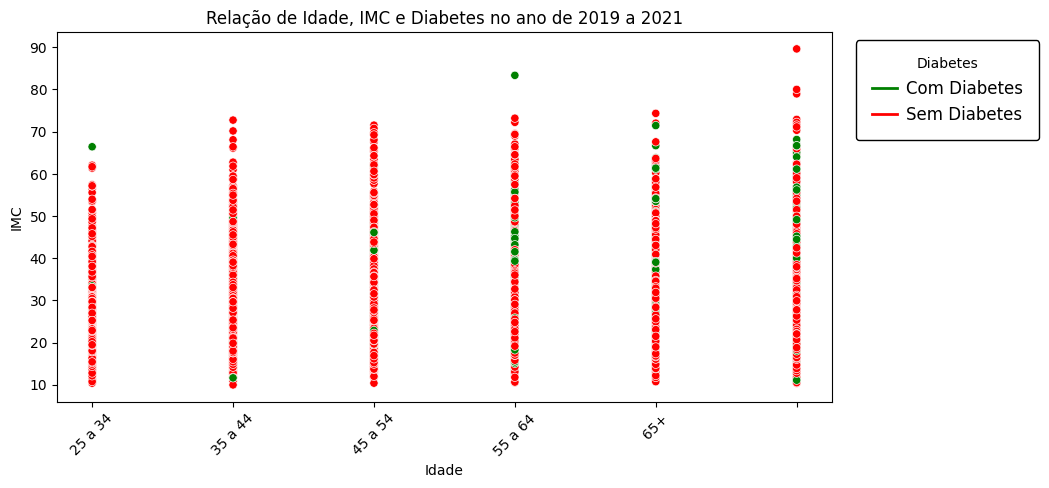

<ipython-input-55-e57a1638161e>:69: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ticks_loc)


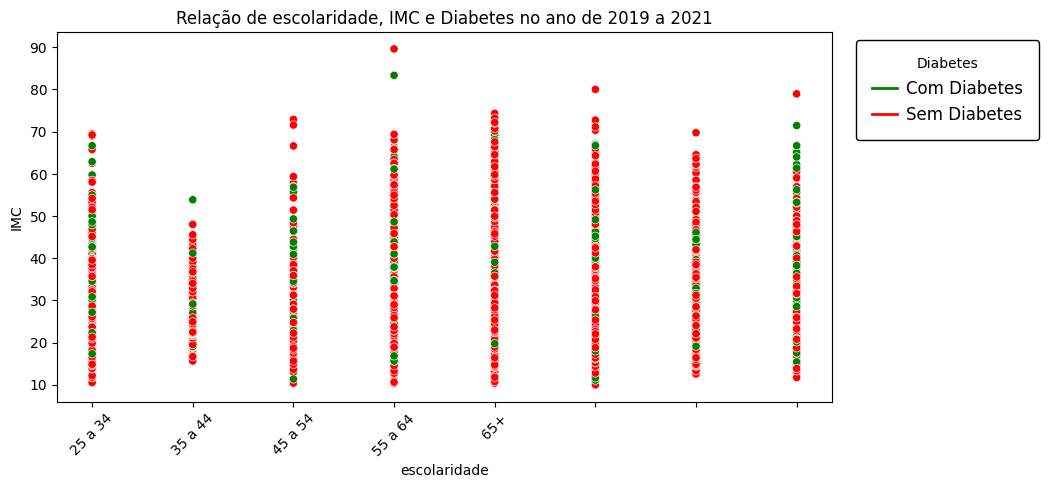

cidade  diabetes  count  percentage
0        1         1    984   10.860927
2        2         1    889    9.519220
4        3         1   1066   11.255411
6        4         1    630    7.839721
8        5         1   1200   12.856225
10       6         1   1043   11.118218
12       7         1   1251   12.339712
14       8         1   1150   11.359147
16       9         1    956   10.988506
18      10         1   1048   10.921217
20      11         1    978   10.853401
22      12         1    640    8.514035
24      13         1   1008   11.498973
26      14         1    806    9.296424
28      15         1    983   11.010305
30      16         1    715    7.264784
32      17         1   1269   12.367216
34      18         1    815    8.882834
36      19         1   1042   11.634658
38      20         1    671    8.066843
40      21         1   1309   13.729809
42      22         1    996   11.026237
44      23         1    859    9.429199
46      24         1   1072   10.939892
48      25         1    779    8.344938
50      26         1   1171   12.250235
52      27         1   1076   10.560408

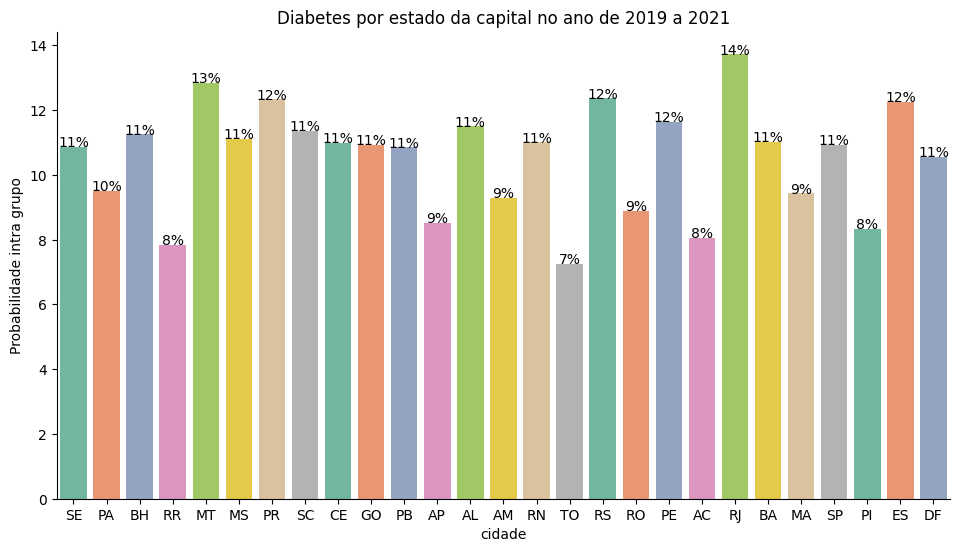

exercicio_fisico  diabetes  count  percentage
0                 1         1  12892    8.818359
2                 2         1  13514   13.122045

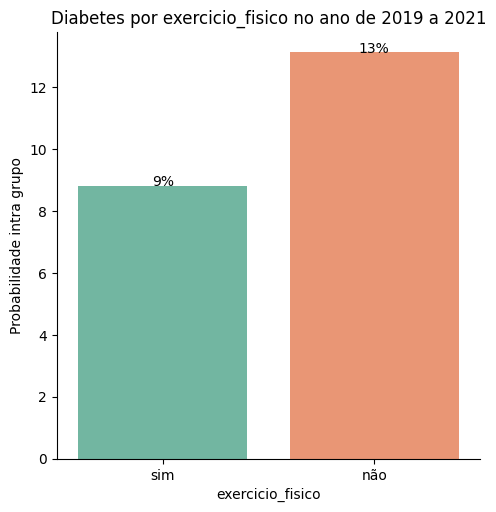

freq_horta  diabetes  count  percentage
0            1         1   4091   10.745147
2            2         1   6745   10.576742
4            3         1   3417    8.764910
6            4         1  11100   11.303577
8            5         1    725   11.284047
10           6         1    328    8.798283

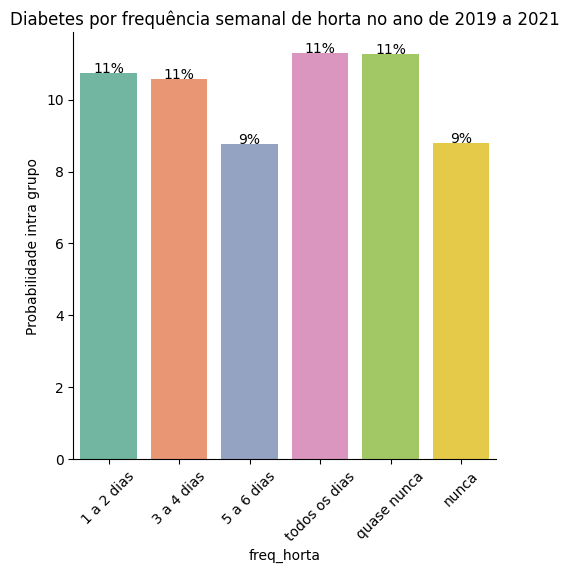

freq_refrigerante  diabetes  count  percentage
0                   1         1   6429    8.438558
2                   2         1   1715    7.078002
4                   3         1    585    6.037152
6                   4         1   1290    8.654814
8                   5         1   7011   11.612230
10                  6         1   9376   14.697077

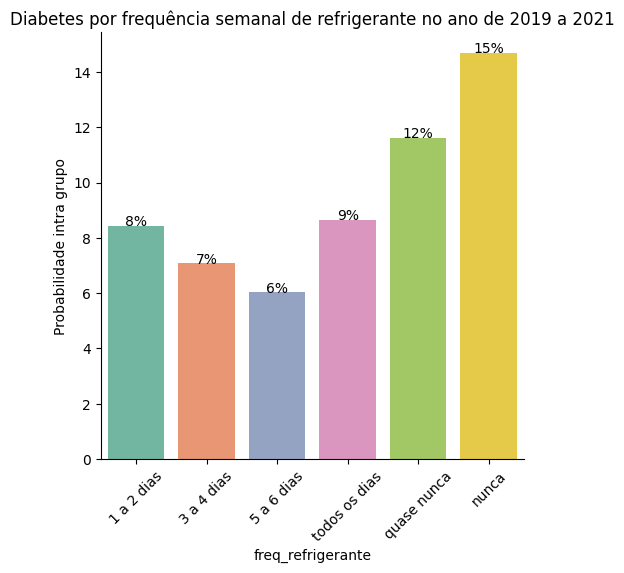

bebida_alcoolica  diabetes  count  percentage
0                 1         1   7390    7.567069
2                 2         1  19016   12.549993

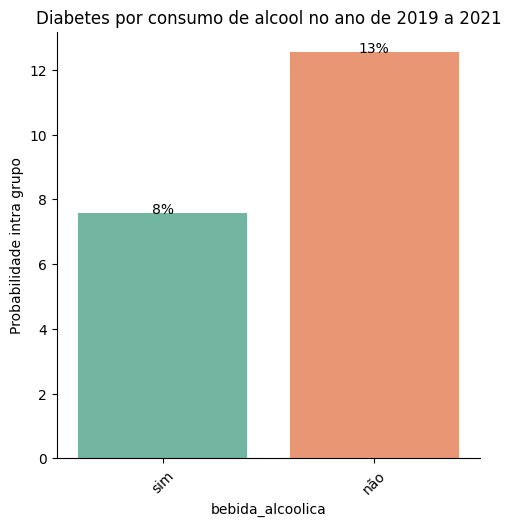

freq_alcool  diabetes  count  percentage
0           1.0         1   3539    7.040124
2           2.0         1    703    7.598357
4           3.0         1    159    9.648058
6           4.0         1    424   12.372337
8           5.0         1   1197    7.147976
10          6.0         1   1368    8.383380

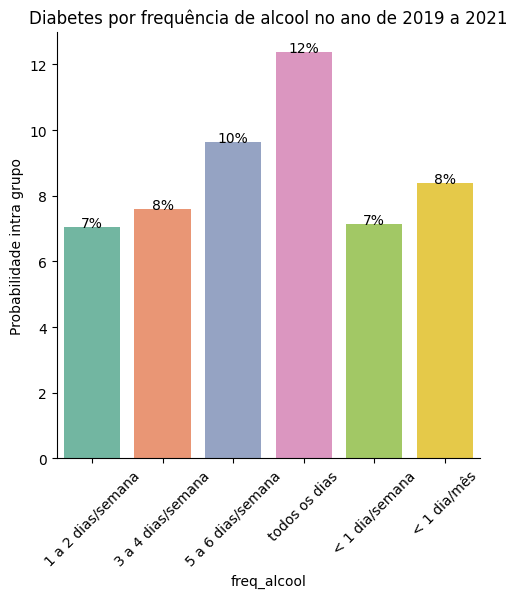

grau_escolaridade  diabetes  count  percentage
0                   1         1   3619   23.395177
2                   2         1    134   20.647149
4                   3         1   1042   20.682811
6                   4         1   4802   15.785667
8                   5         1   8306    9.484009
10                  6         1   6026    7.182360
12                  7         1   1663    7.239563
14                  8         1    814   25.792142

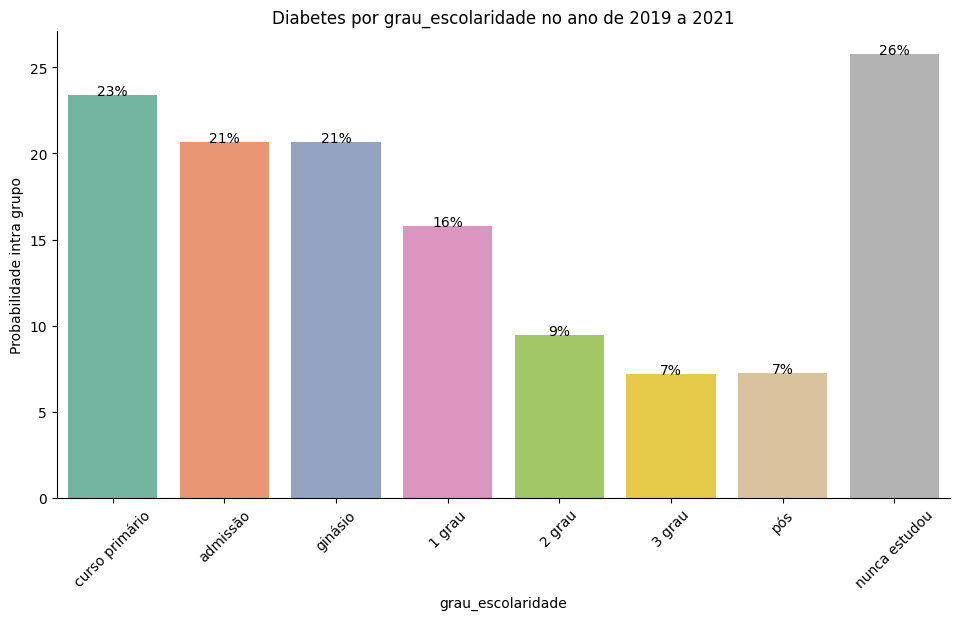

moradores  diabetes  count  percentage
0           1         1   4251   15.716504
2           2         1   9126   14.091815
4           3         1   5949    9.495611
6           4         1   3853    7.327463
8           5         1   1901    7.394873
10  6 ou mais         1   1326    8.069129

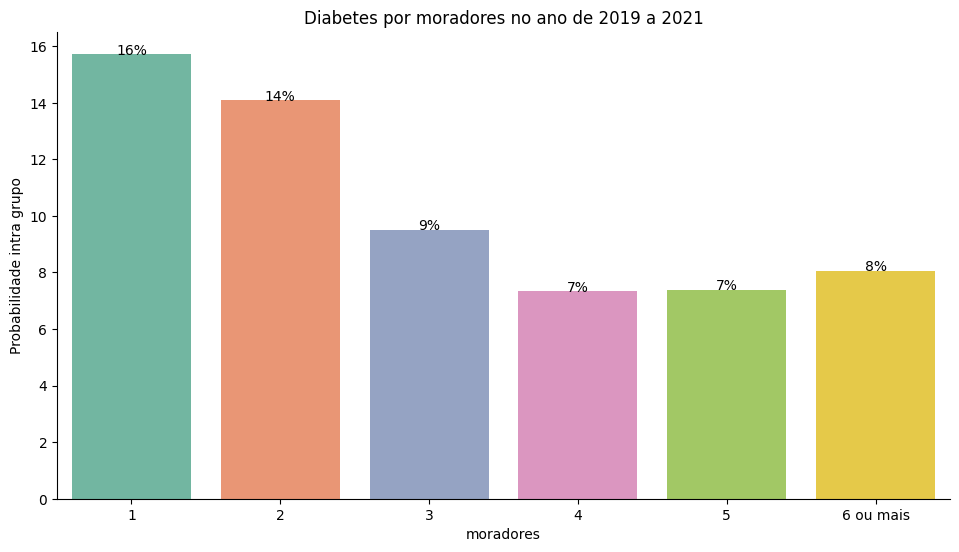

bolsa_familia  diabetes  count  percentage
0            1.0         1    581    8.436184
2            2.0         1  17929   10.744034

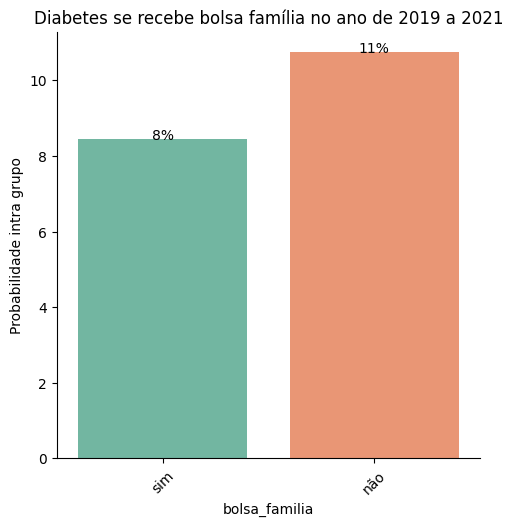

fumante  diabetes  count  percentage
0        1         1   1421    9.783133
2        2         1    222    6.885856
4        3         1  24763   10.699857

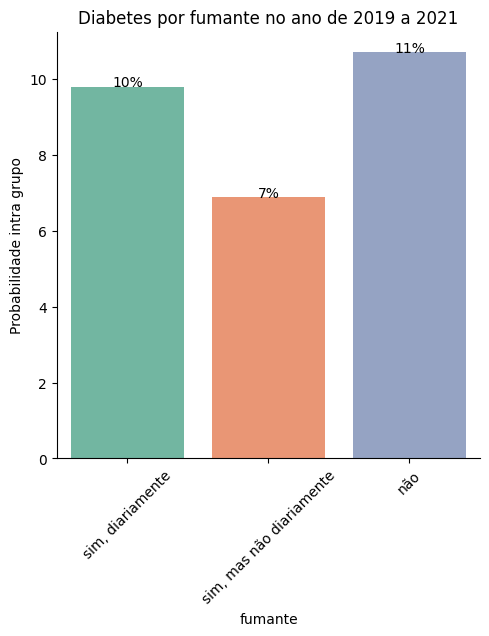

pressao_alta  diabetes  count  percentage
0             1         1  18420   22.425128
2             2         1   7986    4.780834

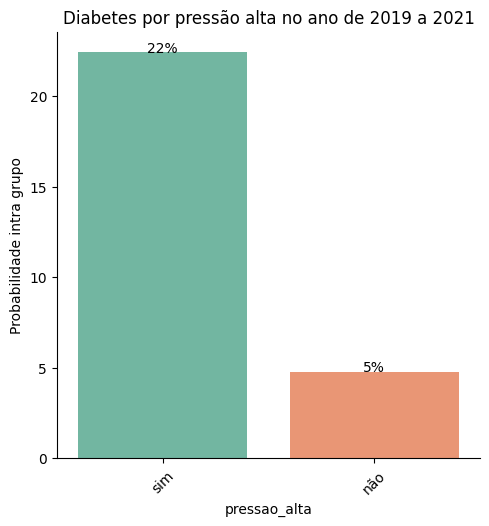

posse_plano_saude  diabetes  count  percentage
0                  1         1  14112   10.522862
2                  2         1    981    9.728282
4                  3         1  11313   10.775312

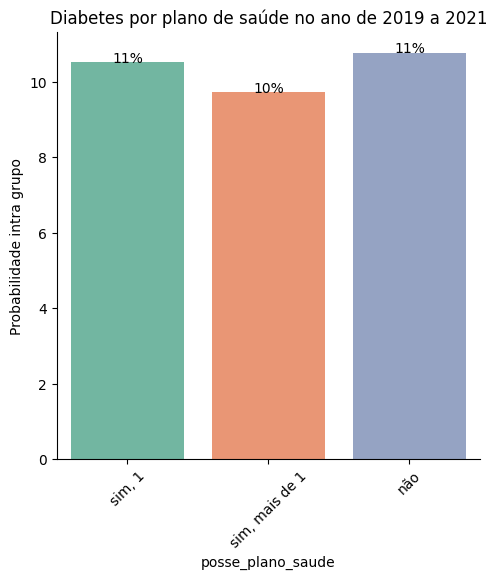

In [55]:
df = df_.copy()
# years_analysis = ['2017','2018','2019','2020','2021']
years_analysis = ['2019','2020','2021']

# display(df)
# um preprocessamento pra todos os anos
df = dataset_preprocessing(df,
                              cols_to_keep = ["ano","cidade","q6","q7","civil","q8a","q9","q11","q16","q25","q27",
                  "q29","q35","q36","q42","q45","q46","q47","q48","q49","q50","q51","q52",
                  "q53","q54","q59a","q60","q61_fx","q64","q69","q74","q75",
                  "r129","q76","q88","moradores","adultos","fet",'imc','r900'],
                              cols_to_rename = rename_cols_dict)
display(df)

# removendo valores 777 e 888
df = remove_unused_data(df,
                       list_cols = ['sexo','peso','altura','diabetes','faixa_etaria','cidade','exercicio_fisico','freq_horta',
                                    'grau_escolaridade','cor','freq_refrigerante','bebida_alcoolica','freq_alcool','pressao_alta',
                                    'posse_plano_saude','bolsa_familia'],
                       values = ['555','666','777','888']
                       )

display(df.describe())

dataset_percentages(df)

# sns.set_palette('Spectral', n_colors=2)

catplot_var_general(df,'ano','diabetes',f'Diabetes no dataset pelos anos', 'line',height_=5.4, aspect_=9.7/5.4)

catplot_var_general(df,'sexo','diabetes',f'Diabetes por sexo nos anos de {years_analysis[0]} a {years_analysis[-1]}',x_values=["Homem","Mulher"])

catplot_var_general(df,'faixa_etaria','diabetes',f'Diabetes por faixa etária nos anos de {years_analysis[0]} a {years_analysis[-1]}','line')

catplot_var_general(df,'cor','diabetes',f'Diabetes por cor no ano de {years_analysis[0]} a {years_analysis[-1]}',x_values=["branca","preta","amarela","parda","indígena"],xtick_rotation=45)

catplot_var_general(df,'classe_imc','diabetes',f'Diabetes por classe_imc nos anos de {years_analysis[0]} a {years_analysis[-1]}',xtick_rotation=45)

# ax = sns.scatterplot(x='faixa_etaria', y='imc', hue='diabetes', data=df,palette='tab10')# 
# plt.title(f'Relação de Idade, IMC e Diabetes no ano de {years_analysis[0]} a {years_analysis[-1]}')
# plt.xlabel('Idade')
# plt.ylabel('IMC')
# ticks_loc = [".","18 a 24","25 a 34","35 a 44","45 a 54","55 a 64","65+"]
# ax.set_xticklabels(ticks_loc)
# plt.xticks(rotation = 45)
# plt.show()
# plt.close()

boxplot_colors = ['green', 'red']
# ax = sns.boxplot(x='faixa_etaria', y='imc', hue='diabetes', data=df,palette=boxplot_colors)# 
ax = sns.scatterplot(x='faixa_etaria', y='imc', hue='diabetes', data=df,palette=boxplot_colors)# 
plt.title(f'Relação de Idade, IMC e Diabetes no ano de {years_analysis[0]} a {years_analysis[-1]}')
plt.xlabel('Idade')
plt.ylabel('IMC')
ticks_loc = ["18 a 24","25 a 34","35 a 44","45 a 54","55 a 64","65+"]
ax.set_xticklabels(ticks_loc)
plt.xticks(rotation = 45)
plt.legend(title="Diabetes", loc='upper left', facecolor='white', framealpha=1, frameon=True,
           edgecolor='black', borderpad=1, handletextpad=0.5, handlelength=1.5, bbox_to_anchor=(1.02, 1), markerscale=1, ncol=1,
           prop={'size': 12}, labels=['Com Diabetes', 'Sem Diabetes'],handles=[plt.Line2D([0], [0], color=c, lw=2) for c in boxplot_colors])
plt.show()
plt.close()

ax = sns.scatterplot(x='grau_escolaridade', y='imc', hue='diabetes', data=df,palette=boxplot_colors)# 
plt.title(f'Relação de escolaridade, IMC e Diabetes no ano de {years_analysis[0]} a {years_analysis[-1]}')
plt.xlabel('escolaridade')
plt.ylabel('IMC')
# ticks_loc = ["18 a 24","25 a 34","35 a 44","45 a 54","55 a 64","65+"]
ax.set_xticklabels(ticks_loc)
plt.xticks(rotation = 45)
plt.legend(title="Diabetes", loc='upper left', facecolor='white', framealpha=1, frameon=True,
           edgecolor='black', borderpad=1, handletextpad=0.5, handlelength=1.5, bbox_to_anchor=(1.02, 1), markerscale=1, ncol=1,
           prop={'size': 12}, labels=['Com Diabetes', 'Sem Diabetes'],handles=[plt.Line2D([0], [0], color=c, lw=2) for c in boxplot_colors])
plt.show()
plt.close()






catplot_var_general(df,'cidade','diabetes',f'Diabetes por estado da capital no ano de {years_analysis[0]} a {years_analysis[-1]}', height_=5.4, aspect_=9.7/5.4,
                    x_values=['SE','PA','BH','RR','MT','MS','PR','SC','CE','GO','PB','AP','AL','AM','RN','TO','RS','RO','PE','AC','RJ','BA','MA','SP','PI','ES','DF'])

catplot_var_general(df,'exercicio_fisico','diabetes',f'Diabetes por exercicio_fisico no ano de {years_analysis[0]} a {years_analysis[-1]}',x_values=["sim","não"])

catplot_var_general(df,'freq_horta','diabetes',f'Diabetes por frequência semanal de horta no ano de {years_analysis[0]} a {years_analysis[-1]}',
                    x_values=["1 a 2 dias","3 a 4 dias","5 a 6 dias","todos os dias","quase nunca","nunca"],xtick_rotation=45)

catplot_var_general(df,'freq_refrigerante','diabetes',f'Diabetes por frequência semanal de refrigerante no ano de {years_analysis[0]} a {years_analysis[-1]}',
                    x_values=["1 a 2 dias","3 a 4 dias","5 a 6 dias","todos os dias","quase nunca","nunca"],xtick_rotation=45)

catplot_var_general(df,'bebida_alcoolica','diabetes',f'Diabetes por consumo de alcool no ano de {years_analysis[0]} a {years_analysis[-1]}',x_values=["sim","não"],xtick_rotation=45)

catplot_var_general(df,'freq_alcool','diabetes',f'Diabetes por frequência de alcool no ano de {years_analysis[0]} a {years_analysis[-1]}',
                    x_values=["1 a 2 dias/semana","3 a 4 dias/semana","5 a 6 dias/semana","todos os dias","< 1 dia/semana","< 1 dia/mês"],xtick_rotation=45)

# TODO suco de fruta
# catplot_var(df,'feijao','diabetes',f'Diabetes por feijao no ano de {year}')


catplot_var_general(df,'grau_escolaridade','diabetes',f'Diabetes por grau_escolaridade no ano de {years_analysis[0]} a {years_analysis[-1]}',
                    x_values=["curso primário","admissão","ginásio","1 grau","2 grau","3 grau","pós","nunca estudou"],xtick_rotation=45, height_=5.4, aspect_=9.7/5.4)

catplot_var_general(df,'moradores','diabetes',f'Diabetes por moradores no ano de {years_analysis[0]} a {years_analysis[-1]}', height_=5.4, aspect_=9.7/5.4)

catplot_var_general(df,'bolsa_familia','diabetes',f'Diabetes se recebe bolsa família no ano de {years_analysis[0]} a {years_analysis[-1]}',x_values=["sim","não"],xtick_rotation=45)

catplot_var_general(df,'fumante','diabetes',f'Diabetes por fumante no ano de {years_analysis[0]} a {years_analysis[-1]}'
,x_values=["sim, diariamente","sim, mas não diariamente","não"],xtick_rotation=45)

catplot_var_general(df,'pressao_alta','diabetes',f'Diabetes por pressão alta no ano de {years_analysis[0]} a {years_analysis[-1]}',x_values=["sim","não"],xtick_rotation=45)

catplot_var_general(df,'posse_plano_saude','diabetes',f'Diabetes por plano de saúde no ano de {years_analysis[0]} a {years_analysis[-1]}',
                    x_values=["sim, 1","sim, mais de 1","não"],xtick_rotation=45)

## Análises do conjunto de dados lendo ano a ano e plotando separado

coluna peso com 14009 valores 777
coluna peso com 303 valores 888
coluna altura com 15342 valores 777
coluna altura com 198 valores 888
coluna diabetes com 278 valores 777
coluna grau_escolaridade com 1617 valores 777
coluna grau_escolaridade com 1488 valores 888
coluna cor com 4309 valores 555
coluna cor com 660 valores 666
coluna cor com 4846 valores 777
coluna cor com 770 valores 888
coluna cor com 11672 valores 80
coluna bebida_alcoolica com 23 valores 888
coluna bebida_alcoolica com 12397 valores 3
coluna pressao_alta com 113 valores 777
coluna posse_plano_saude com 631 valores 888
coluna bolsa_familia com 1588 valores 777
Descrição geral do dataframe no ano 2015


ano        cidade  idade (anos)          sexo  \
count  42073.0  42073.000000  42073.000000  42073.000000   
mean    2015.0     13.994700     48.699332      1.601383   
std        0.0      7.829915     17.529328      0.489619   
min     2015.0      1.000000     18.000000      1.000000   
25%     2015.0      7.000000     35.000000      1.000000   
50%     2015.0     14.000000     49.000000      2.000000   
75%     2015.0     21.000000     62.000000      2.000000   
max     2015.0     27.000000    105.000000      2.000000   

       estado conjugal atual  grau_escolaridade          peso        altura  \
count           42073.000000       42073.000000  42073.000000  42073.000000   
mean               14.627433           5.178880     71.370624    164.935446   
std               104.165813           1.309437     14.938931      9.992682   
min                 1.000000           1.000000     31.000000    120.000000   
25%                 1.000000           5.000000     60.000000    158.000000   
50%                 2.000000           5.000000     70.000000    165.000000   
75%                 3.000000           6.000000     80.000000    171.000000   
max               888.000000           8.000000    190.000000    210.000000   

         freq_horta   suco frutas    freq fruta  freq_refrigerante  \
count  42073.000000  42073.000000  42073.000000       42073.000000   
mean       3.029045      3.171511      3.136144           3.580895   
std        1.223663      1.617699      1.260195           2.064818   
min        1.000000      1.000000      1.000000           1.000000   
25%        2.000000      2.000000      2.000000           1.000000   
50%        3.000000      3.000000      4.000000           4.000000   
75%        4.000000      4.000000      4.000000           6.000000   
max        6.000000      6.000000      6.000000           6.000000   

       bebida_alcoolica   freq_alcool  exercicio_fisico  freq exercicio  \
count      42073.000000  14661.000000      42073.000000     23210.00000   
mean           1.651534      2.555556          1.429539         2.21034   
std            0.476490      2.039012          0.495016         0.93115   
min            1.000000      1.000000          1.000000         1.00000   
25%            1.000000      1.000000          1.000000         1.00000   
50%            2.000000      1.000000          1.000000         2.00000   
75%            2.000000      5.000000          2.000000         3.00000   
max            2.000000      6.000000          2.000000         4.00000   

       duração exercicio      trabalha  anda bastante a pé  carrega peso  \
count       23210.000000  42073.000000        24262.000000  24262.000000   
mean            6.173589      1.423336            4.748413      5.497568   
std             1.304308      0.494093           50.181176     53.244490   
min             1.000000      1.000000            1.000000      1.000000   
25%             5.000000      1.000000            1.000000      2.000000   
50%             7.000000      1.000000            1.000000      2.000000   
75%             7.000000      2.000000            2.000000      2.000000   
max             7.000000      2.000000          777.000000    777.000000   

       trajeto a pe ou bicicleta  duração do trajeto  curso/escola  \
count               24262.000000         7561.000000  42073.000000   
mean                    2.522422            3.169158      6.380030   
std                     0.762495            1.741747     64.067107   
min                     1.000000            1.000000      1.000000   
25%                     2.000000            2.000000      1.000000   
50%                     3.000000            3.000000      2.000000   
75%                     3.000000            4.000000      2.000000   
max                     3.000000            7.000000    888.000000   

       como faz trajeto curso/escola  duração trajeto curso/escola  \
count                   11525.000000                   3553.00000

Descrição geral do dataframe no ano 2016


ano        cidade  idade (anos)          sexo  \
count  44773.0  44773.000000  44773.000000  44773.000000   
mean    2016.0     14.051125     49.353673      1.600898   
std        0.0      7.822254     17.706908      0.489719   
min     2016.0      1.000000     18.000000      1.000000   
25%     2016.0      7.000000     35.000000      1.000000   
50%     2016.0     14.000000     50.000000      2.000000   
75%     2016.0     21.000000     63.000000      2.000000   
max     2016.0     27.000000    105.000000      2.000000   

       estado conjugal atual  grau_escolaridade          peso        altura  \
count           44773.000000       44773.000000  44773.000000  44773.000000   
mean                6.979117           5.143390     71.497932    164.869207   
std                64.824500           1.403619     14.943284     10.039694   
min                 1.000000           1.000000     30.000000    120.000000   
25%                 1.000000           5.000000     60.000000    158.000000   
50%                 2.000000           5.000000     70.000000    165.000000   
75%                 3.000000           6.000000     80.000000    171.000000   
max               888.000000           8.000000    200.000000    220.000000   

         freq_horta   suco frutas    freq fruta  freq_refrigerante  \
count  44773.000000  44773.000000  44773.000000       44773.000000   
mean       2.931566      2.921314      2.989503           3.364371   
std        1.210679      1.577743      1.269193           2.067420   
min        1.000000      1.000000      1.000000           1.000000   
25%        2.000000      1.000000      2.000000           1.000000   
50%        3.000000      3.000000      3.000000           3.000000   
75%        4.000000      4.000000      4.000000           5.000000   
max        6.000000      6.000000      6.000000           6.000000   

       bebida_alcoolica   freq_alcool  exercicio_fisico  freq exercicio  \
count      44773.000000  16958.000000      44773.000000    24554.000000   
mean           1.621245      2.658863          1.427825        2.131588   
std            0.485082      2.049824          0.494769        0.913607   
min            1.000000      1.000000          1.000000        1.000000   
25%            1.000000      1.000000          1.000000        1.000000   
50%            2.000000      1.000000          1.000000        2.000000   
75%            2.000000      5.000000          2.000000        3.000000   
max            2.000000      6.000000          2.000000        4.000000   

       duração exercicio      trabalha  anda bastante a pé  carrega peso  \
count       24555.000000  44773.000000        26643.000000  26643.000000   
mean            6.172633      1.404932            2.200465      2.388507   
std             1.323979      0.490884           23.750660     21.760090   
min             1.000000      1.000000            1.000000      1.000000   
25%             5.000000      1.000000            1.000000      2.000000   
50%             7.000000      1.000000            1.000000      2.000000   
75%             7.000000      2.000000            2.000000      2.000000   
max             7.000000      2.000000          777.000000    777.000000   

       trajeto a pe ou bicicleta  duração do trajeto  curso/escola  \
count               26643.000000         8360.000000  44773.000000   
mean                    2.532297            3.342344      1.870681   
std                     0.746208            1.801828     11.854806   
min                     1.000000            1.000000      1.000000   
25%                     2.000000            2.000000      1.000000   
50%                     3.000000            3.000000      2.000000   
75%                     3.000000            4.000000      2.000000   
max                     3.000000            7.000000    888.000000   

       como faz trajeto curso/escola  duração trajeto curso/escola  \
count                   12878.000000                   3830.00000

Descrição geral do dataframe no ano 2017


ano        cidade  idade (anos)          sexo  \
count  43267.0  43267.000000  43267.000000  43267.000000   
mean    2017.0     14.088104     51.031525      1.611066   
std        0.0      7.839976     17.848082      0.487514   
min     2017.0      1.000000     18.000000      1.000000   
25%     2017.0      7.000000     37.000000      1.000000   
50%     2017.0     14.000000     52.000000      2.000000   
75%     2017.0     21.000000     65.000000      2.000000   
max     2017.0     27.000000    102.000000      2.000000   

       estado conjugal atual  grau_escolaridade          peso        altura  \
count           43267.000000       43267.000000  43267.000000  43267.000000   
mean                9.576167           5.123489     71.396214    164.669725   
std                80.246844           1.442092     15.059283     10.053052   
min                 1.000000           1.000000     30.000000    120.000000   
25%                 1.000000           5.000000     60.000000    158.000000   
50%                 2.000000           5.000000     70.000000    165.000000   
75%                 3.000000           6.000000     80.000000    171.000000   
max               888.000000           8.000000    210.000000    220.000000   

         freq_horta   suco frutas    freq fruta  freq_refrigerante  \
count  43267.000000  43267.000000  43267.000000       43267.000000   
mean       2.930409      3.034992      3.036009           3.606790   
std        1.228612      1.611989      1.250488           2.073786   
min        1.000000      1.000000      1.000000           1.000000   
25%        2.000000      2.000000      2.000000           1.000000   
50%        3.000000      3.000000      4.000000           5.000000   
75%        4.000000      4.000000      4.000000           6.000000   
max        6.000000      6.000000      6.000000           6.000000   

       bebida_alcoolica   freq_alcool  exercicio_fisico  freq exercicio  \
count      43267.000000  16354.000000      43267.000000    23682.000000   
mean           1.622021      2.738351          1.417454        2.192889   
std            0.484888      2.063349          0.493145        0.916350   
min            1.000000      1.000000          1.000000        1.000000   
25%            1.000000      1.000000          1.000000        1.000000   
50%            2.000000      1.000000          1.000000        2.000000   
75%            2.000000      5.000000          2.000000        3.000000   
max            2.000000      6.000000          2.000000        4.000000   

       duração exercicio      trabalha  anda bastante a pé  carrega peso  \
count       23685.000000  43267.000000        24796.000000  24796.000000   
mean            6.233439      1.426907            2.576545      2.229714   
std             1.279941      0.494634           29.120648     18.419717   
min             1.000000      1.000000            1.000000      1.000000   
25%             5.000000      1.000000            1.000000      2.000000   
50%             7.000000      1.000000            1.000000      2.000000   
75%             7.000000      2.000000            2.000000      2.000000   
max             7.000000      2.000000          777.000000    777.000000   

       trajeto a pe ou bicicleta  duração do trajeto  curso/escola  \
count               24796.000000          7349.00000  43267.000000   
mean                    2.547992             3.35066      1.817644   
std                     0.747703             1.79348      8.532582   
min                     1.000000             1.00000      1.000000   
25%                     2.000000             2.00000      1.000000   
50%                     3.000000             3.00000      2.000000   
75%                     3.000000             4.00000      2.000000   
max                     3.000000             7.00000    888.000000   

       como faz trajeto curso/escola  duração trajeto curso/escola  \
count                   11434.000000                   3366.00000

Descrição geral do dataframe no ano 2018


ano        cidade  idade (anos)          sexo  \
count  43016.0  43016.000000  43016.000000  43016.000000   
mean    2018.0     14.118700     50.802190      1.616375   
std        0.0      7.836567     17.793558      0.486274   
min     2018.0      1.000000     18.000000      1.000000   
25%     2018.0      7.000000     37.000000      1.000000   
50%     2018.0     14.000000     52.000000      2.000000   
75%     2018.0     21.000000     65.000000      2.000000   
max     2018.0     27.000000    106.000000      2.000000   

       estado conjugal atual  grau_escolaridade          peso        altura  \
count           43016.000000       43016.000000  43016.000000  43016.000000   
mean                4.499326           5.128069     71.570648    164.599916   
std                44.751797           1.471046     15.193546     10.096651   
min                 1.000000           1.000000     30.000000    120.000000   
25%                 1.000000           5.000000     60.000000    158.000000   
50%                 2.000000           5.000000     70.000000    165.000000   
75%                 3.000000           6.000000     80.000000    171.000000   
max               888.000000           8.000000    190.000000    220.000000   

         freq_horta   suco frutas    freq fruta  freq_refrigerante  \
count  43016.000000  43016.000000  43016.000000       43016.000000   
mean       2.890483      3.079738      3.060768           3.772875   
std        1.220700      1.622394      1.230659           2.046098   
min        1.000000      1.000000      1.000000           1.000000   
25%        2.000000      2.000000      2.000000           1.000000   
50%        3.000000      3.000000      4.000000           5.000000   
75%        4.000000      4.000000      4.000000           6.000000   
max        6.000000      6.000000      6.000000           6.000000   

       bebida_alcoolica   freq_alcool  exercicio_fisico  freq exercicio  \
count      43016.000000  16202.000000      43016.000000    24618.000000   
mean           1.623349      2.824651          1.394039        2.154521   
std            0.484552      2.084340          0.488649        0.915138   
min            1.000000      1.000000          1.000000        1.000000   
25%            1.000000      1.000000          1.000000        1.000000   
50%            2.000000      2.000000          1.000000        2.000000   
75%            2.000000      5.000000          2.000000        3.000000   
max            2.000000      6.000000          2.000000        4.000000   

       duração exercicio      trabalha  anda bastante a pé  carrega peso  \
count       24618.000000  43016.000000        24597.000000  24597.000000   
mean            6.256966      1.428190            2.371021      2.162337   
std             1.280887      0.494822           26.155744     17.123810   
min             1.000000      1.000000            1.000000      1.000000   
25%             5.000000      1.000000            1.000000      2.000000   
50%             7.000000      1.000000            1.000000      2.000000   
75%             7.000000      2.000000            2.000000      2.000000   
max             7.000000      2.000000          777.000000    777.000000   

       trajeto a pe ou bicicleta  duração do trajeto  curso/escola  \
count               24597.000000         7178.000000  43016.000000   
mean                    2.559296            3.431179      1.801725   
std                     0.737744            1.802515      8.557966   
min                     1.000000            1.000000      1.000000   
25%                     2.000000            2.000000      1.000000   
50%                     3.000000            3.000000      2.000000   
75%                     3.000000            4.000000      2.000000   
max                     3.000000            7.000000    888.000000   

       como faz trajeto curso/escola  duração trajeto curso/escola  \
count                   12073.000000                   3583.00000

Descrição geral do dataframe no ano 2019


ano        cidade  idade (anos)          sexo  \
count  42705.0  42705.000000  42705.000000  42705.000000   
mean    2019.0     14.235195     52.707973      1.626063   
std        0.0      7.888005     17.947857      0.483853   
min     2019.0      1.000000     18.000000      1.000000   
25%     2019.0      7.000000     39.000000      1.000000   
50%     2019.0     14.000000     55.000000      2.000000   
75%     2019.0     21.000000     66.000000      2.000000   
max     2019.0     27.000000    106.000000      2.000000   

       estado conjugal atual  grau_escolaridade          peso        altura  \
count           42705.000000       42705.000000  42705.000000  42705.000000   
mean                3.844866           5.100667     71.515607    164.228193   
std                37.598102           1.486074     15.167795     10.099504   
min                 1.000000           1.000000     30.000000    120.000000   
25%                 1.000000           5.000000     60.000000    157.000000   
50%                 2.000000           5.000000     70.000000    164.000000   
75%                 3.000000           6.000000     80.000000    170.000000   
max               888.000000           8.000000    195.000000    210.000000   

         freq_horta   suco frutas    freq fruta  freq_refrigerante  \
count  42705.000000  42705.000000  42705.000000       42705.000000   
mean       2.900316      3.011685      3.048144           3.707692   
std        1.221746      1.626238      1.223473           2.078274   
min        1.000000      1.000000      1.000000           1.000000   
25%        2.000000      1.000000      2.000000           1.000000   
50%        3.000000      3.000000      4.000000           5.000000   
75%        4.000000      4.000000      4.000000           6.000000   
max        6.000000      6.000000      6.000000           6.000000   

       bebida_alcoolica   freq_alcool  exercicio_fisico  freq exercicio  \
count      42705.000000  15684.000000      42705.000000    24059.000000   
mean           1.632736      2.809997          1.402833        2.139490   
std            0.482065      2.071012          0.490474        0.911174   
min            1.000000      1.000000          1.000000        1.000000   
25%            1.000000      1.000000          1.000000        1.000000   
50%            2.000000      2.000000          1.000000        2.000000   
75%            2.000000      5.000000          2.000000        3.000000   
max            2.000000      6.000000          2.000000        4.000000   

       duração exercicio      trabalha  anda bastante a pé  carrega peso  \
count       24059.000000  42705.000000        23271.000000  23271.000000   
mean            6.189202      1.455076            2.278501      2.043617   
std             1.320568      0.497984           24.897999     14.377411   
min             1.000000      1.000000            1.000000      1.000000   
25%             5.000000      1.000000            1.000000      2.000000   
50%             7.000000      1.000000            1.000000      2.000000   
75%             7.000000      2.000000            2.000000      2.000000   
max             7.000000      2.000000          777.000000    777.000000   

       trajeto a pe ou bicicleta  duração do trajeto  curso/escola  \
count               23271.000000         7183.000000  42705.000000   
mean                    2.532981            3.456634      1.905093   
std                     0.752090            1.819181     12.137131   
min                     1.000000            1.000000      1.000000   
25%                     2.000000            2.000000      1.000000   
50%                     3.000000            3.000000      2.000000   
75%                     3.000000            4.000000      2.000000   
max                     3.000000            7.000000    888.000000   

       como faz trajeto curso/escola  duração trajeto curso/escola  \
count                   11141.000000                   3456.00000

Descrição geral do dataframe no ano 2020


ano        cidade  idade (anos)          sexo  \
count  16178.0  16178.000000  16178.000000  16178.000000   
mean    2020.0     14.018791     51.720052      1.558969   
std        0.0      7.850241     17.773800      0.496526   
min     2020.0      1.000000     18.000000      1.000000   
25%     2020.0      7.000000     38.000000      1.000000   
50%     2020.0     14.000000     53.000000      2.000000   
75%     2020.0     21.000000     65.000000      2.000000   
max     2020.0     27.000000    102.000000      2.000000   

       estado conjugal atual  grau_escolaridade          peso        altura  \
count           16178.000000       16178.000000  16178.000000  16178.000000   
mean                3.766164           5.210966     72.865867    165.169366   
std                36.839269           1.380123     15.331564      9.979809   
min                 1.000000           1.000000     30.000000    120.000000   
25%                 1.000000           5.000000     62.000000    158.000000   
50%                 2.000000           5.000000     71.000000    165.000000   
75%                 3.000000           6.000000     81.000000    172.000000   
max               888.000000           8.000000    200.000000    212.000000   

         freq_horta   suco frutas    freq fruta  freq_refrigerante  \
count  16178.000000  16178.000000  16178.000000       16178.000000   
mean       2.862097      2.926814      3.000309           3.537953   
std        1.212975      1.597607      1.231477           2.057215   
min        1.000000      1.000000      1.000000           1.000000   
25%        2.000000      1.000000      2.000000           1.000000   
50%        3.000000      3.000000      3.000000           4.000000   
75%        4.000000      4.000000      4.000000           5.000000   
max        6.000000      6.000000      6.000000           6.000000   

       bebida_alcoolica  freq_alcool  exercicio_fisico  freq exercicio  \
count      16178.000000  9287.000000      16178.000000     9186.000000   
mean           1.425949     2.958652          1.386018        2.168953   
std            0.494501     2.134053          0.486850        0.913325   
min            1.000000     1.000000          1.000000        1.000000   
25%            1.000000     1.000000          1.000000        1.000000   
50%            1.000000     2.000000          1.000000        2.000000   
75%            2.000000     5.000000          2.000000        3.000000   
max            2.000000     6.000000          2.000000        4.000000   

       duração exercicio      trabalha  anda bastante a pé  carrega peso  \
count        9186.000000  16178.000000         9323.000000   9323.000000   
mean            6.143588      1.423724            2.404269      1.766384   
std             1.335402      0.494163           26.628684      0.423153   
min             1.000000      1.000000            1.000000      1.000000   
25%             5.000000      1.000000            1.000000      2.000000   
50%             7.000000      1.000000            1.000000      2.000000   
75%             7.000000      2.000000            2.000000      2.000000   
max             7.000000      2.000000          777.000000      2.000000   

       trajeto a pe ou bicicleta  duração do trajeto  curso/escola  \
count                9323.000000         2707.000000  16178.000000   
mean                    2.558618            3.497229      2.020522   
std                     0.740724            1.850943     15.584611   
min                     1.000000            1.000000      1.000000   
25%                     2.000000            2.000000      1.000000   
50%                     3.000000            3.000000      2.000000   
75%                     3.000000            5.000000      2.000000   
max                     3.000000            7.000000    888.000000   

       como faz trajeto curso/escola  duração trajeto curso/escola  \
count                    4098.000000                   1152.000000   
mean

Descrição geral do dataframe no ano 2021


ano        cidade  idade (anos)          sexo  \
count  13502.0  13502.000000  13502.000000  13502.000000   
mean    2021.0     14.252111     54.940675      1.594579   
std        0.0      8.018513     18.381874      0.490992   
min     2021.0      1.000000     18.000000      1.000000   
25%     2021.0      7.000000     40.000000      1.000000   
50%     2021.0     15.000000     57.000000      2.000000   
75%     2021.0     22.000000     69.000000      2.000000   
max     2021.0     27.000000    105.000000      2.000000   

       estado conjugal atual  grau_escolaridade          peso        altura  \
count           13502.000000       13502.000000  13502.000000  13502.000000   
mean                3.764924           5.111613     72.331062    164.649089   
std                36.548936           1.447263     15.277746      9.972703   
min                 1.000000           1.000000     33.000000    120.000000   
25%                 1.000000           5.000000     62.000000    158.000000   
50%                 2.000000           5.000000     70.000000    165.000000   
75%                 3.000000           6.000000     80.000000    171.000000   
max               888.000000           8.000000    185.000000    210.000000   

         freq_horta   suco frutas    freq fruta  freq_refrigerante  \
count  13502.000000  13502.000000  13502.000000       13502.000000   
mean       2.921863      3.114131      3.075100           3.678344   
std        1.221568      1.705030      1.253271           2.081305   
min        1.000000      1.000000      1.000000           1.000000   
25%        2.000000      1.000000      2.000000           1.000000   
50%        3.000000      3.000000      4.000000           5.000000   
75%        4.000000      5.000000      4.000000           6.000000   
max        6.000000      6.000000      6.000000           6.000000   

       bebida_alcoolica  freq_alcool  exercicio_fisico  freq exercicio  \
count      13502.000000   6634.00000      13502.000000     7324.000000   
mean           1.508665      2.81429          1.427714        2.224468   
std            0.499943      2.11387          0.494766        0.941043   
min            1.000000      1.00000          1.000000        1.000000   
25%            1.000000      1.00000          1.000000        2.000000   
50%            2.000000      1.00000          1.000000        2.000000   
75%            2.000000      5.00000          2.000000        3.000000   
max            2.000000      6.00000          2.000000        4.000000   

       duração exercicio      trabalha  anda bastante a pé  carrega peso  \
count        7324.000000  13502.000000         6658.000000   6658.000000   
mean            5.939787      1.506888            2.335536      2.349805   
std             1.467777      0.499971           25.138392     21.242239   
min             1.000000      1.000000            1.000000      1.000000   
25%             5.000000      1.000000            1.000000      2.000000   
50%             7.000000      2.000000            2.000000      2.000000   
75%             7.000000      2.000000            2.000000      2.000000   
max             7.000000      2.000000          777.000000    777.000000   

       trajeto a pe ou bicicleta  duração do trajeto  curso/escola  \
count                6658.000000         1940.000000  13502.000000   
mean                    2.537399            3.344330      2.399496   
std                     0.768853            1.862746     22.876263   
min                     1.000000            1.000000      1.000000   
25%                     2.000000            2.000000      2.000000   
50%                     3.000000            3.000000      2.000000   
75%                     3.000000            4.000000      2.000000   
max                     3.000000            7.000000    888.000000   

       como faz trajeto curso/escola  duração trajeto curso/escola  \
count                     2580.00000                    717.000000   
mean

Descrição geral do dataframe no ano 2022


ano       cidade  idade (anos)         sexo  estado conjugal atual  \
count  3668.0  3668.000000   3668.000000  3668.000000            3668.000000   
mean   2022.0    13.184569     51.502181     1.564613               3.414940   
std       0.0     7.149387     17.602751     0.495875              32.708122   
min    2022.0     1.000000     18.000000     1.000000               1.000000   
25%    2022.0     7.000000     38.000000     1.000000               1.000000   
50%    2022.0    13.000000     51.000000     2.000000               2.000000   
75%    2022.0    19.000000     65.000000     2.000000               3.000000   
max    2022.0    27.000000    107.000000     2.000000             888.000000   

       grau_escolaridade         peso       altura   freq_horta  suco frutas  \
count        3668.000000  3668.000000  3668.000000  3668.000000  3668.000000   
mean            5.265540    73.331788   164.437841     2.842421     2.965376   
std             1.288425    16.114324    10.168593     1.270689     1.620583   
min             1.000000    30.000000   120.000000     1.000000     1.000000   
25%             5.000000    62.000000   158.000000     2.000000     1.000000   
50%             5.000000    71.000000   165.000000     3.000000     3.000000   
75%             6.000000    83.000000   170.000000     4.000000     4.000000   
max             8.000000   178.000000   202.000000     6.000000     6.000000   

        freq fruta  freq_refrigerante  bebida_alcoolica  freq_alcool  \
count  3668.000000        3668.000000       3668.000000  1880.000000   
mean      2.966467           3.573064          1.487459     3.053191   
std       1.295971           2.088668          0.499911     2.175959   
min       1.000000           1.000000          1.000000     1.000000   
25%       2.000000           1.000000          1.000000     1.000000   
50%       3.000000           4.000000          1.000000     2.000000   
75%       4.000000           6.000000          2.000000     5.000000   
max       6.000000           6.000000          2.000000     6.000000   

       exercicio_fisico  freq exercicio  duração exercicio     trabalha  \
count       3668.000000     2029.000000        2029.000000  3668.000000   
mean           1.415758        2.230655           6.115821     1.439749   
std            0.492919        0.927886           1.379582     0.496424   
min            1.000000        1.000000           1.000000     1.000000   
25%            1.000000        2.000000           5.000000     1.000000   
50%            1.000000        2.000000           7.000000     1.000000   
75%            2.000000        3.000000           7.000000     2.000000   
max            2.000000        4.000000           7.000000     2.000000   

       anda bastante a pé  carrega peso  trajeto a pe ou bicicleta  \
count         2055.000000   2055.000000                2055.000000   
mean             2.678345      2.149878                   2.592214   
std             29.618315     17.106201                   0.748343   
min              1.000000      1.000000                   1.000000   
25%              1.000000      2.000000                   3.000000   
50%              2.000000      2.000000                   3.000000   
75%              2.000000      2.000000                   3.000000   
max            777.000000    777.000000                   3.000000   

       duração do trajeto  curso/escola  como faz trajeto curso/escola  \
count          511.000000   3668.000000                     736.000000   
mean             3.636008      1.799346                       2.566576   
std              1.970517      0.400544                       0.791741   
min              1.000000      1.000000                       1.000000   
25%              2.000000      2.000000                       3.000000   
50%              3.000000      2.000000                       3.000000   
75%              5.000000      2.000000                       3.000000   
max              7.0

sexo  diabetes  count  percentage  year
0     1         1   1491    8.890346  2015
2     2         1   2309    9.125761  2015
0     1         1   2007   11.231742  2016
2     2         1   3174   11.797502  2016
0     1         1   1761   10.464702  2017
2     2         1   2659   10.057113  2017
0     1         1   1695   10.271482  2018
2     2         1   2626    9.904202  2018
0     1         1   1695   10.614315  2019
2     2         1   2893   10.820616  2019
0     1         1    815   11.422565  2020
2     2         1    957   10.582771  2020
0     1         1    752   13.737669  2021
2     2         1   1138   14.175386  2021
0     1         1    187   11.709455  2022
2     2         1    247   11.926606  2022

<ipython-input-56-e001c2f58666>:32: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.lineplot(x="year", y="percentage", hue=x_, data=diabetes_count,palette=palette)


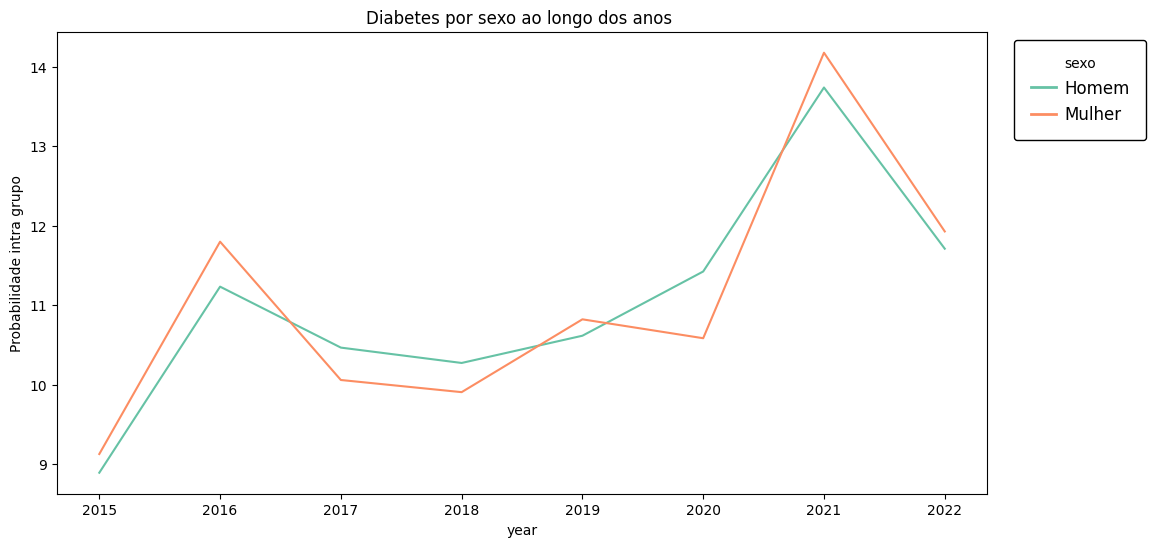

cor  diabetes  count  percentage  year
0    1         1   1982    9.713306  2015
2    2         1    296    9.952925  2015
4    3         1    112    8.967174  2015
6    4         1   1343    8.013605  2015
8    5         1     67    9.766764  2015
0    1         1   2674   12.495911  2016
2    2         1    410   11.520090  2016
4    3         1     80   11.544012  2016
6    4         1   1914   10.391444  2016
8    5         1    103   14.651494  2016
0    1         1   2254   10.767687  2017
2    2         1    366   10.306956  2017
4    3         1     75   14.097744  2017
6    4         1   1651    9.330847  2017
8    5         1     74   13.285458  2017
0    1         1   2176   10.582114  2018
2    2         1    352   10.226612  2018
4    3         1     50   12.722646  2018
6    4         1   1681    9.286267  2018
8    5         1     62   12.015504  2018
0    1         1   2267   11.176297  2019
2    2         1    392   11.303345  2019
4    3         1     50   13.192612  2019
6    4         1   1797    9.960093  2019
8    5         1     82   15.413534  2019
0    1         1    873   11.754410  2020
2    2         1    150   11.013216  2020
4    3         1     21   14.583333  2020
6    4         1    700    9.992862  2020
8    5         1     28   11.666667  2020
0    1         1    868   13.961718  2021
2    2         1    210   13.627515  2021
4    3         1     24   18.181818  2021
6    4         1    765   13.995609  2021
8    5         1     23   15.753425  2021
0    1         1    161   11.943620  2022
2    2         1     64   17.486339  2022
4    3         1      6   17.647059  2022
6    4         1    196   10.431080  2022
8    5         1      7   17.073171  2022

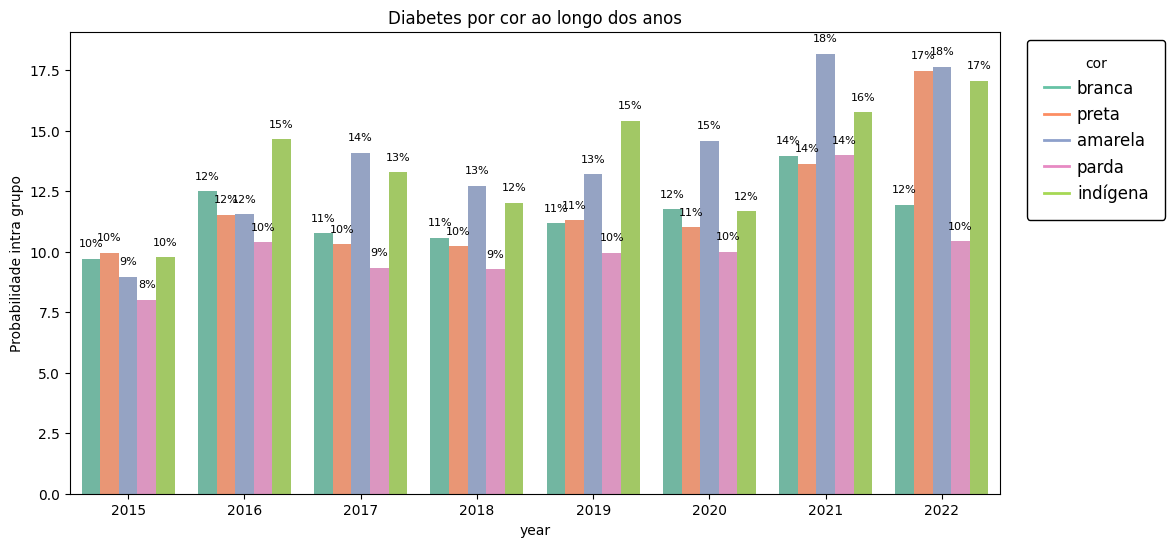

faixa_etaria  diabetes  count  percentage  year
0              1         1     43    1.000931  2015
2              2         1     75    1.214182  2015
4              3         1    249    3.518937  2015
6              4         1    551    6.972036  2015
8              5         1   1127   14.287525  2015
10             6         1   1755   20.096187  2015
0              1         1     46    1.006124  2016
2              2         1    109    1.716806  2016
4              3         1    299    4.201208  2016
6              4         1    780    9.494827  2016
8              5         1   1498   17.700579  2016
10             6         1   2449   24.351198  2016
0              1         1     21    0.531915  2017
2              2         1     78    1.455767  2017
4              3         1    204    3.108808  2017
6              4         1    603    7.868981  2017
8              5         1   1230   14.370838  2017
10             6         1   2284   20.434822  2017
0              1         1     24    0.593765  2018
2              2         1     67    1.274491  2018
4              3         1    186    2.790279  2018
6              4         1    577    7.536573  2018
8              5         1   1257   14.573913  2018
10             6         1   2210   20.519963  2018
0              1         1     24    0.685910  2019
2              2         1     58    1.268037  2019
4              3         1    198    3.214808  2019
6              4         1    483    6.799944  2019
8              5         1   1241   14.089464  2019
10             6         1   2584   20.569973  2019
0              1         1      9    0.679758  2020
2              2         1     35    1.836306  2020
4              3         1     98    3.743316  2020
6              4         1    195    7.222222  2020
8              5         1    500   15.629884  2020
10             6         1    935   21.101332  2020
0              1         1     12    1.291712  2021
2              2         1     34    2.550638  2021
4              3         1     88    4.782609  2021
6              4         1    184    9.006363  2021
8              5         1    410   15.625000  2021
10             6         1   1162   24.551025  2021
0              1         1      1    0.416667  2022
2              2         1      5    1.061571  2022
4              3         1     37    5.457227  2022
6              4         1     61    9.442724  2022
8              5         1     98   14.984709  2022
10             6         1    232   23.697651  2022

<ipython-input-56-e001c2f58666>:32: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  ax = sns.lineplot(x="year", y="percentage", hue=x_, data=diabetes_count,palette=palette)


[1, 2, 3, 4, 5, 6]

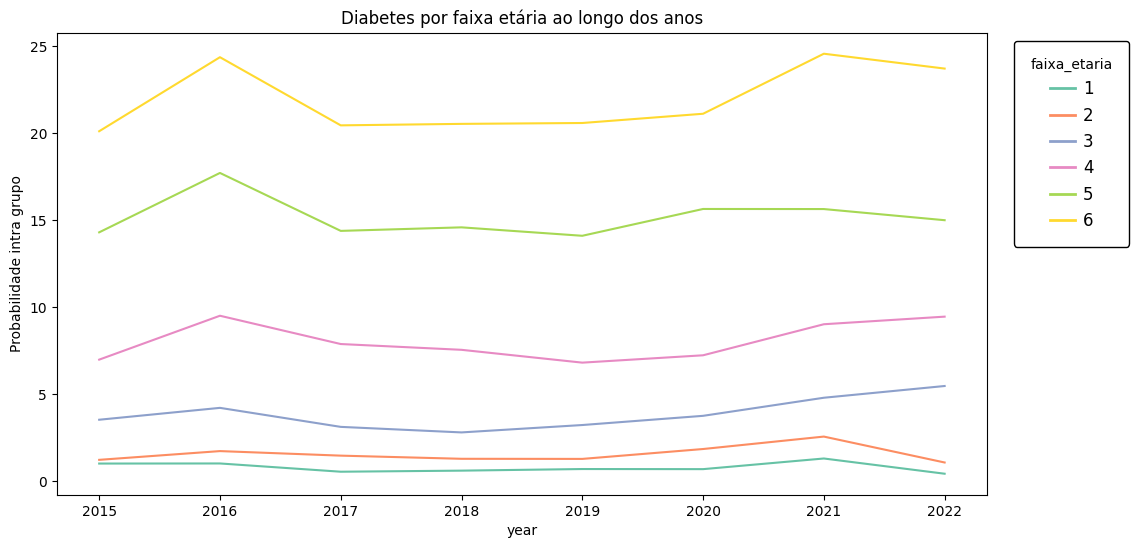

classe_imc  diabetes  count  percentage  year
0         Abaixo do peso         1     43    4.428424  2015
2     Obesidade classe I         1    838   14.510823  2015
4    Obesidade classe II         1    274   19.669777  2015
6   Obesidade classe III         1    107   20.380952  2015
8            Peso normal         1   1008    5.624686  2015
10             Sobrepeso         1   1530    9.878616  2015
0         Abaixo do peso         1     47    4.594330  2016
2     Obesidade classe I         1   1186   18.876333  2016
4    Obesidade classe II         1    351   22.792208  2016
6   Obesidade classe III         1    127   23.649907  2016
8            Peso normal         1   1352    7.228787  2016
10             Sobrepeso         1   2118   12.692515  2016
0         Abaixo do peso         1     41    4.047384  2017
2     Obesidade classe I         1    995   16.346312  2017
4    Obesidade classe II         1    313   20.922460  2017
6   Obesidade classe III         1    111   19.786096  2017
8            Peso normal         1   1186    6.580480  2017
10             Sobrepeso         1   1774   11.027538  2017
0         Abaixo do peso         1     35    3.528226  2018
2     Obesidade classe I         1    937   15.137318  2018
4    Obesidade classe II         1    307   19.271814  2018
6   Obesidade classe III         1    136   23.652174  2018
8            Peso normal         1   1085    6.139309  2018
10             Sobrepeso         1   1821   11.386231  2018
0         Abaixo do peso         1     50    5.235602  2019
2     Obesidade classe I         1   1030   16.220472  2019
4    Obesidade classe II         1    306   18.830769  2019
6   Obesidade classe III         1    143   22.843450  2019
8            Peso normal         1   1219    7.069945  2019
10             Sobrepeso         1   1840   11.567235  2019
0         Abaixo do peso         1     16    5.298013  2020
2     Obesidade classe I         1    376   15.479621  2020
4    Obesidade classe II         1    133   19.732938  2020
6   Obesidade classe III         1     51   21.888412  2020
8            Peso normal         1    482    7.735516  2020
10             Sobrepeso         1    714   11.317166  2020
0         Abaixo do peso         1     18    6.164384  2021
2     Obesidade classe I         1    404   18.976045  2021
4    Obesidade classe II         1    119   21.834862  2021
6   Obesidade classe III         1     55   25.821596  2021
8            Peso normal         1    528    9.954751  2021
10             Sobrepeso         1    766   15.262004  2021
0         Abaixo do peso         1      3    4.109589  2022
2     Obesidade classe I         1     95   14.984227  2022
4    Obesidade classe II         1     31   16.939891  2022
6   Obesidade classe III         1     13   21.311475  2022
8            Peso normal         1    106    8.024224  2022
10             Sobrepeso         1    186   13.323782  2022

<ipython-input-56-e001c2f58666>:32: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  ax = sns.lineplot(x="year", y="percentage", hue=x_, data=diabetes_count,palette=palette)


['Abaixo do peso',
 'Obesidade classe I',
 'Obesidade classe II',
 'Obesidade classe III',
 'Peso normal',
 'Sobrepeso']

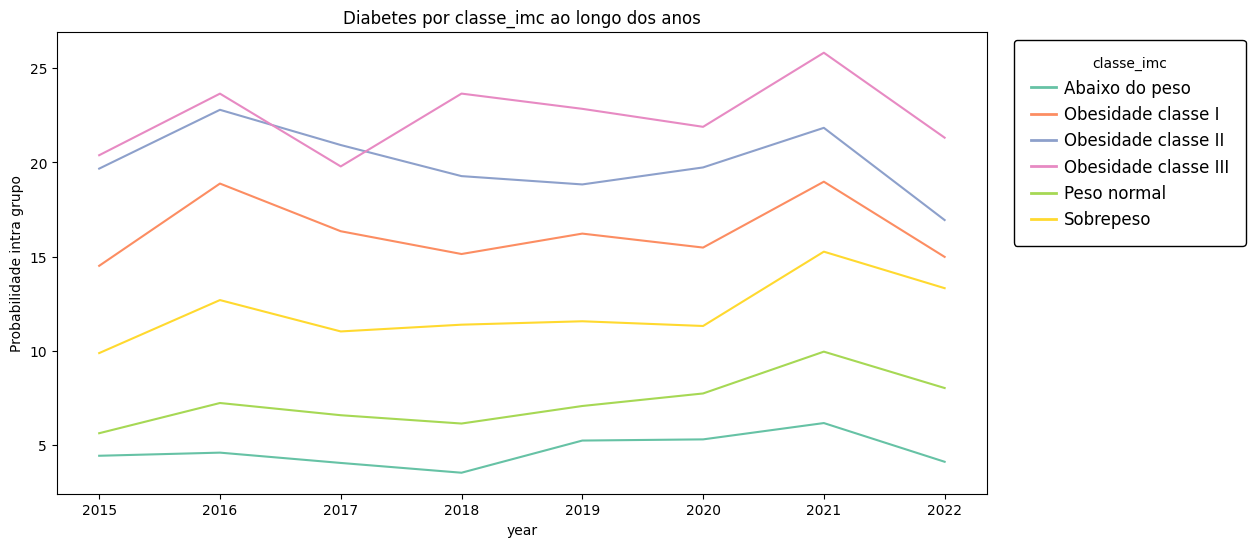

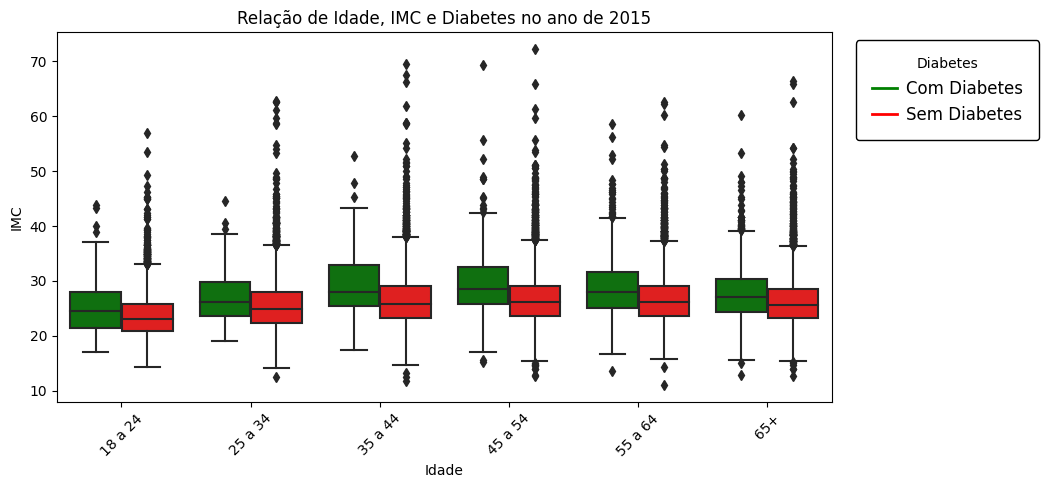

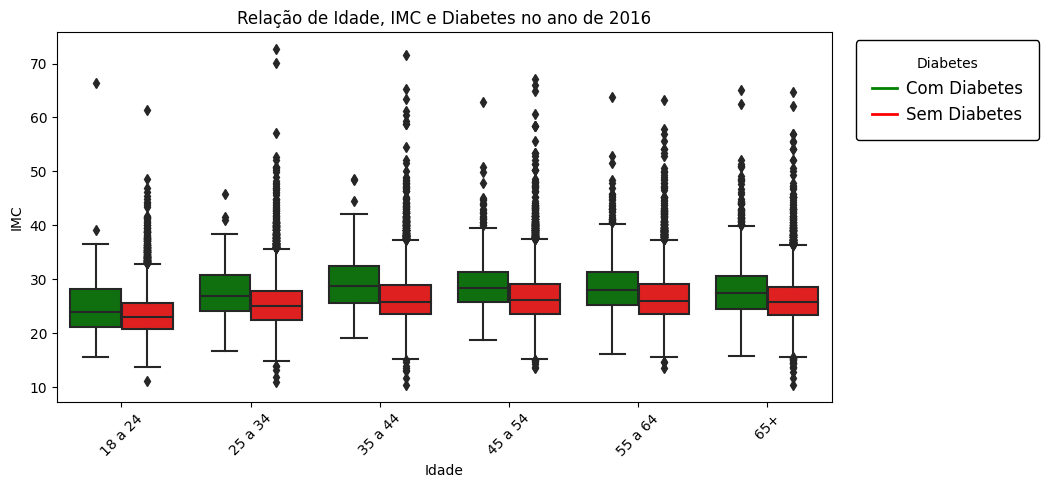

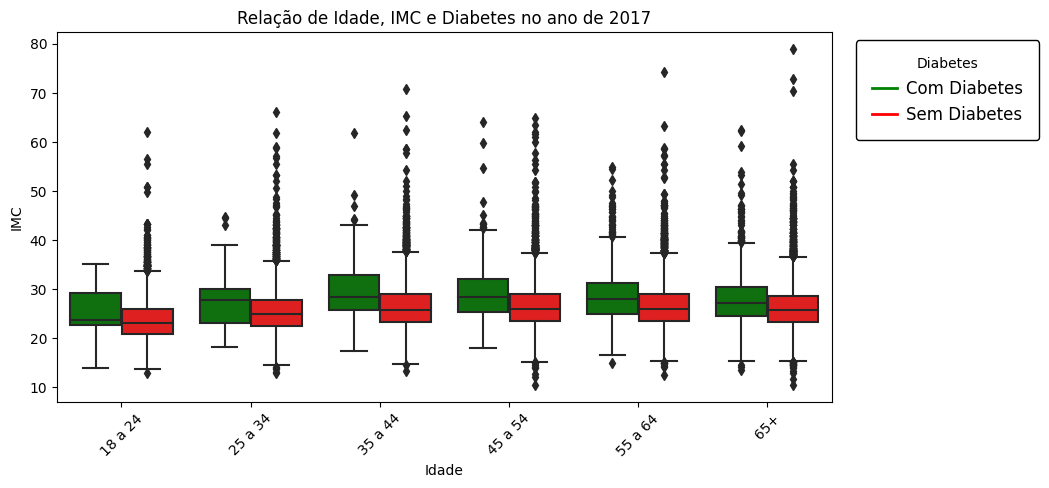

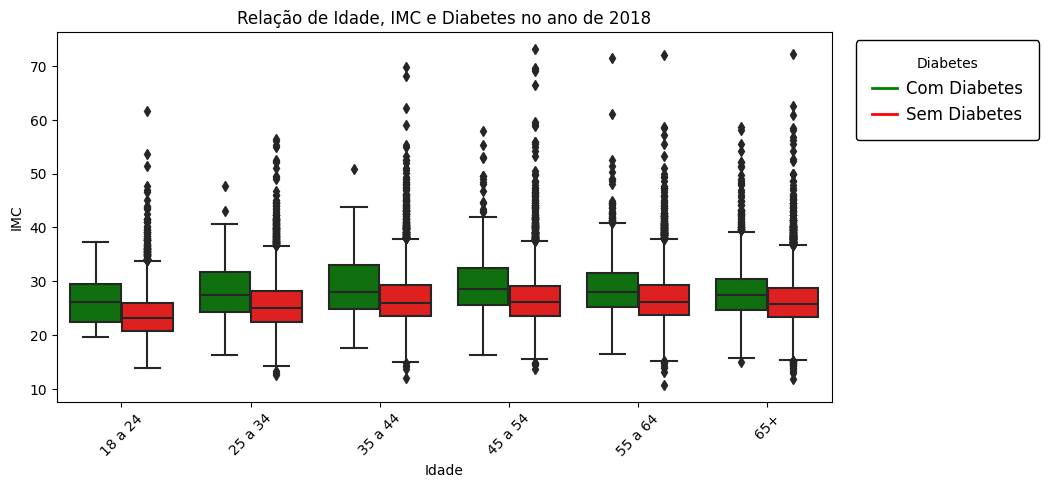

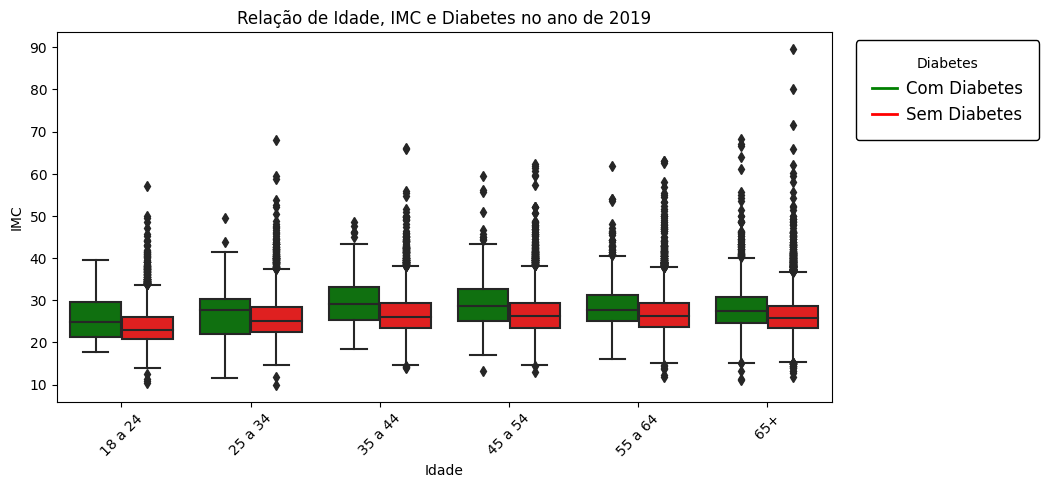

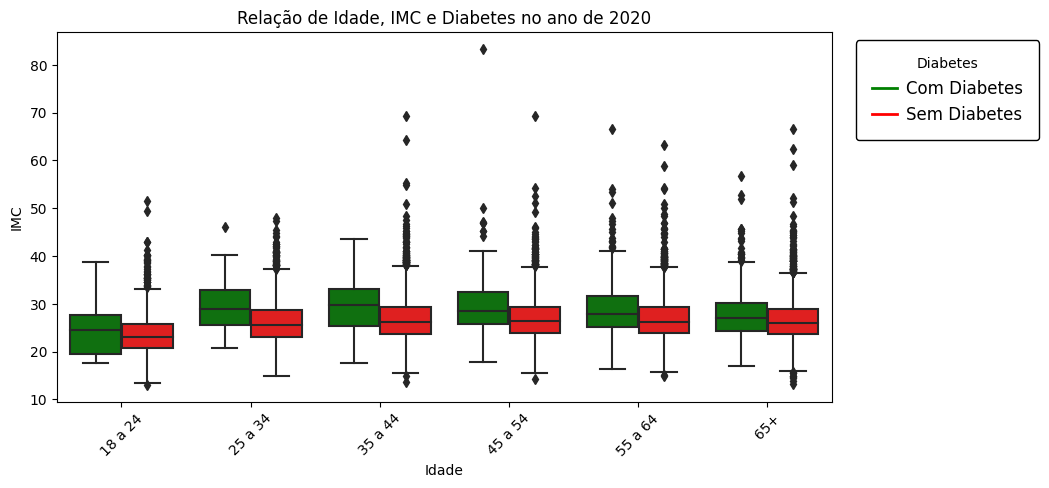

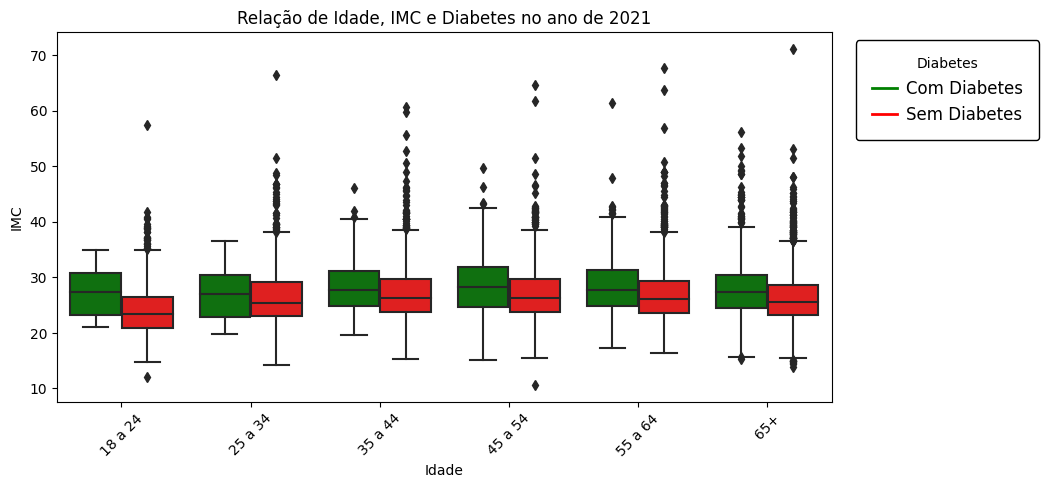

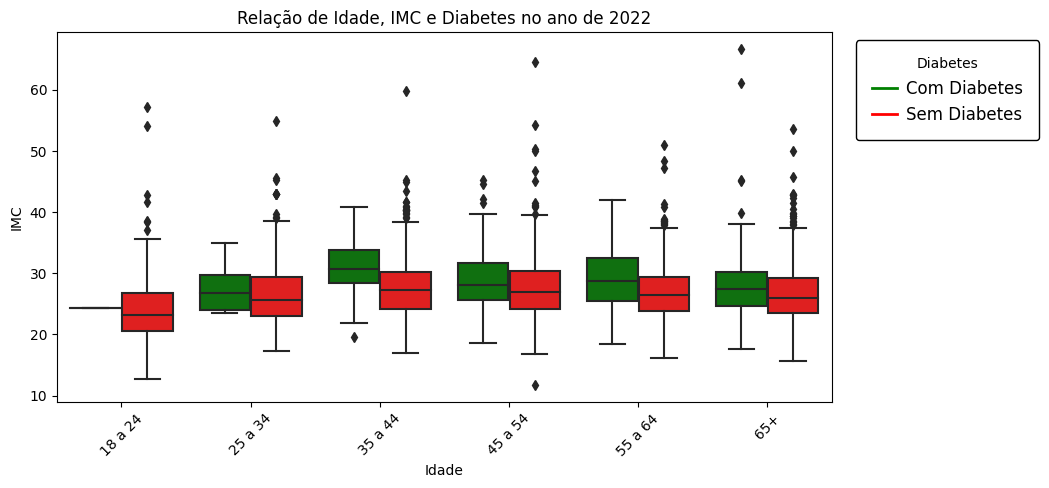

regiao  diabetes  count  percentage  year
0  Centro-Oeste         1    655   10.125213  2015
2      Nordeste         1   1171    9.043868  2015
4         Norte         1    856    7.670251  2015
6       Sudeste         1    471    9.788030  2015
8           Sul         1    510    9.966777  2015
0  Centro-Oeste         1    844   12.359057  2016
2      Nordeste         1   1668   11.671681  2016
4         Norte         1   1035    8.970359  2016
6       Sudeste         1    702   13.559977  2016
8           Sul         1    728   13.730668  2016
0  Centro-Oeste         1    777   11.756695  2017
2      Nordeste         1   1407    9.928027  2017
4         Norte         1    820    7.849895  2017
6       Sudeste         1    611   12.178593  2017
8           Sul         1    626   11.690009  2017
0  Centro-Oeste         1    706   10.412979  2018
2      Nordeste         1   1424    9.955257  2018
4         Norte         1    793    8.026316  2018
6       Sudeste         1    591   11.705288  2018
8           Sul         1    611   11.482804  2018
0  Centro-Oeste         1    731   10.688697  2019
2      Nordeste         1   1575   10.901163  2019
4         Norte         1    841    9.058595  2019
6       Sudeste         1    600   11.734794  2019
8           Sul         1    654   12.185579  2019
0  Centro-Oeste         1    290   11.779041  2020
2      Nordeste         1    571   10.903189  2020
4         Norte         1    358    8.657799  2020
6       Sudeste         1    251   14.245176  2020
8           Sul         1    244   12.329459  2020
0  Centro-Oeste         1    325   14.393268  2021
2      Nordeste         1    617   14.586288  2021
4         Norte         1    293   10.501792  2021
6       Sudeste         1    277   16.706876  2021
8           Sul         1    275   14.315461  2021
0  Centro-Oeste         1     39   15.354331  2022
2      Nordeste         1    152   11.977935  2022
4         Norte         1    170   10.216346  2022
6       Sudeste         1     49   16.118421  2022
8           Sul         1     22   13.664596  2022

['Centro-Oeste', 'Nordeste', 'Norte', 'Sudeste', 'Sul']

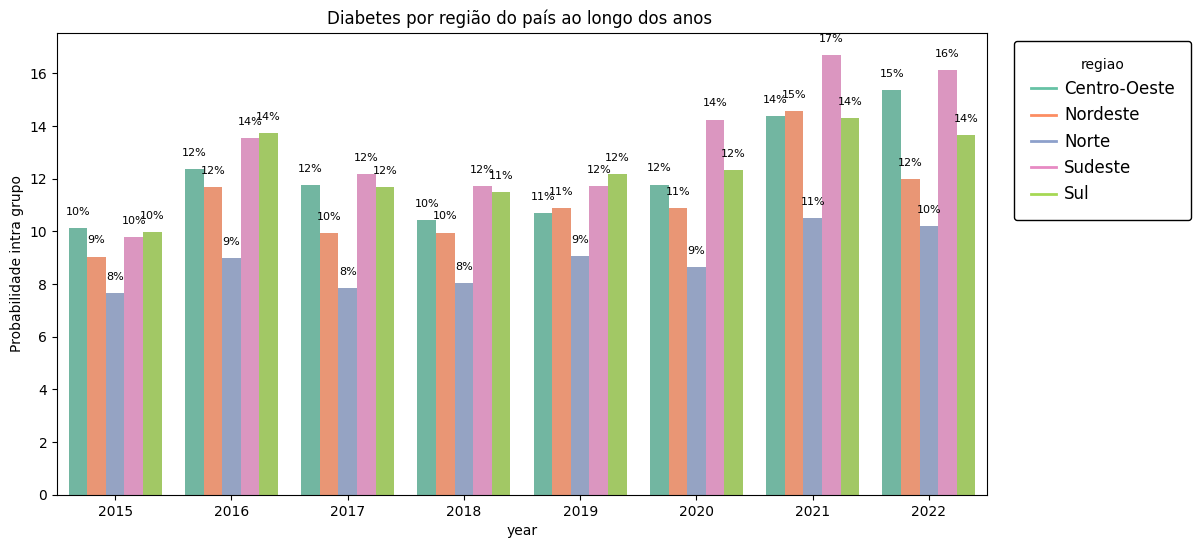

exercicio_fisico  diabetes  count  percentage  year
0                 1         1   1807    7.528853  2015
2                 2         1   1993   11.028110  2015
0                 1         1   2487    9.708018  2016
2                 2         1   2694   14.064213  2016
0                 1         1   2101    8.335648  2017
2                 2         1   2319   12.839110  2017
0                 1         1   2171    8.328858  2018
2                 2         1   2150   12.684366  2018
0                 1         1   2311    9.062034  2019
2                 2         1   2277   13.236063  2019
0                 1         1    907    9.131179  2020
2                 2         1    865   13.851081  2020
0                 1         1    908   11.751003  2021
2                 2         1    982   17.004329  2021
0                 1         1    200    9.332711  2022
2                 2         1    234   15.344262  2022

<ipython-input-56-e001c2f58666>:32: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  ax = sns.lineplot(x="year", y="percentage", hue=x_, data=diabetes_count,palette=palette)


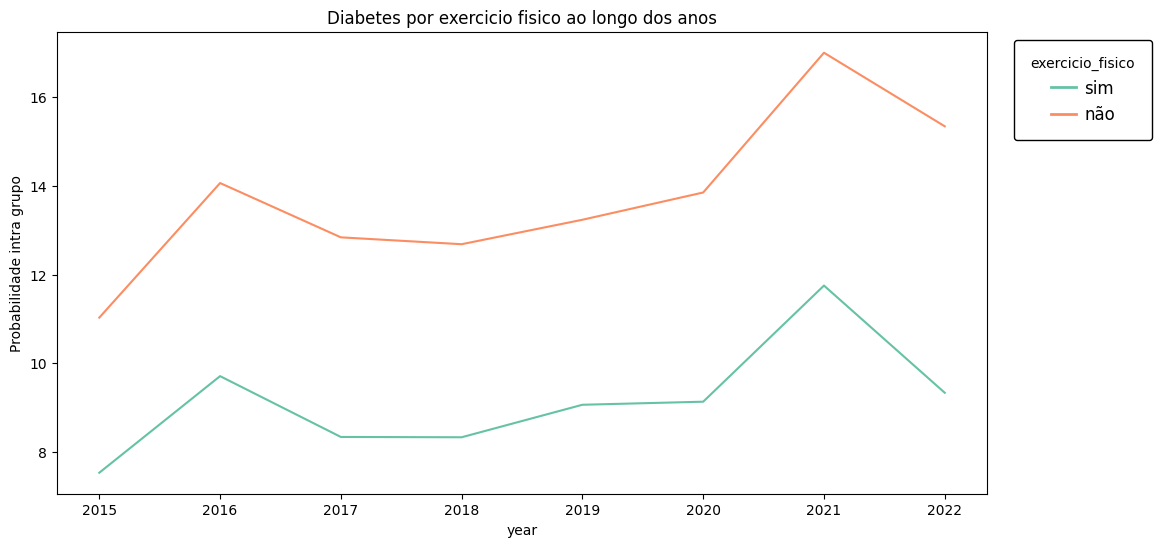

freq_horta  diabetes  count  percentage  year
0            1         1    531    9.177325  2015
2            2         1    794    8.160329  2015
4            3         1    477    6.855418  2015
6            4         1   1799   10.241375  2015
8            5         1    125   10.955302  2015
10           6         1     74    8.295964  2015
0            1         1    796   11.843476  2016
2            2         1   1328   11.618548  2016
4            3         1    680    9.653606  2016
6            4         1   2207   12.278847  2016
8            5         1    111   11.349693  2016
10           6         1     59    9.424920  2016
0            1         1    686   10.254111  2017
2            2         1   1143   10.331736  2017
4            3         1    541    8.210654  2017
6            4         1   1869   10.966379  2017
8            5         1    129   10.262530  2017
10           6         1     52    8.320000  2017
0            1         1    729   10.586698  2018
2            2         1   1154   10.173675  2018
4            3         1    558    8.547794  2018
6            4         1   1712   10.294648  2018
8            5         1    134   12.039533  2018
10           6         1     34    6.589147  2018
0            1         1    724   10.880673  2019
2            2         1   1204   10.643564  2019
4            3         1    611    9.112603  2019
6            4         1   1875   11.493196  2019
8            5         1    123   11.071107  2019
10           6         1     51    8.374384  2019
0            1         1    280   10.760953  2020
2            2         1    485   11.093321  2020
4            3         1    258    9.717514  2020
6            4         1    682   11.464112  2020
8            5         1     45   11.138614  2020
10           6         1     22   11.224490  2020
0            1         1    266   12.763916  2021
2            2         1    527   15.044248  2021
4            3         1    233   11.690918  2021
6            4         1    796   14.683638  2021
8            5         1     41   13.311688  2021
10           6         1     27   13.989637  2021
0            1         1     79   12.153846  2022
2            2         1    110   10.794897  2022
4            3         1     59   11.500975  2022
6            4         1    160   12.288786  2022
8            5         1     17   15.044248  2022
10           6         1      9   12.676056  2022

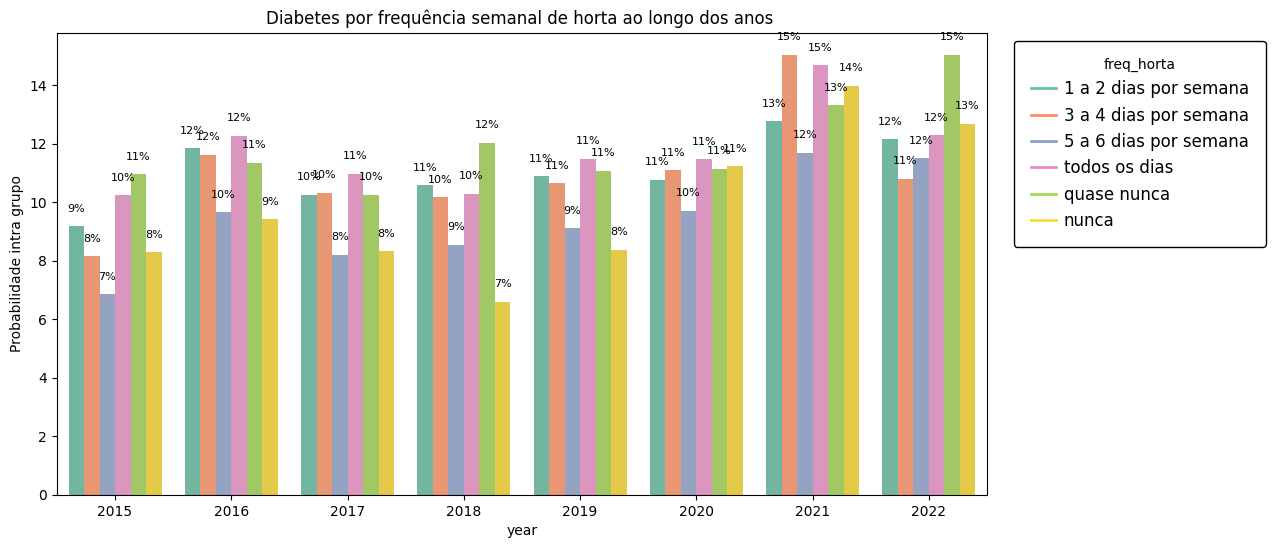

freq_refrigerante  diabetes  count  percentage  year
0                   1         1    851    6.753432  2015
2                   2         1    242    5.482556  2015
4                   3         1     97    4.743276  2015
6                   4         1    217    6.625954  2015
8                   5         1    937   11.111111  2015
10                  6         1   1456   12.879257  2015
0                   1         1   1434    9.405129  2016
2                   2         1    393    7.626625  2016
4                   3         1    124    6.212425  2016
6                   4         1    296   10.522574  2016
8                   5         1   1287   13.484912  2016
10                  6         1   1647   16.437126  2016
0                   1         1   1090    8.152580  2017
2                   2         1    277    6.839506  2017
4                   3         1    115    7.116337  2017
6                   4         1    195    8.412425  2017
8                   5         1   1190   10.805412  2017
10                  6         1   1553   14.247706  2017
0                   1         1    883    7.330843  2018
2                   2         1    262    7.199780  2018
4                   3         1     85    6.054131  2018
6                   4         1    185    7.953568  2018
8                   5         1   1296   10.660525  2018
10                  6         1   1610   14.067278  2018
0                   1         1   1098    8.668877  2019
2                   2         1    277    7.446237  2019
4                   3         1     71    4.985955  2019
6                   4         1    200    8.984726  2019
8                   5         1   1243   11.342276  2019
10                  6         1   1699   14.508967  2019
0                   1         1    475    9.418997  2020
2                   2         1    125    7.449344  2020
4                   3         1     47    7.230769  2020
6                   4         1     94   10.432852  2020
8                   5         1    455   10.958574  2020
10                  6         1    576   15.343633  2020
0                   1         1    486   11.997038  2021
2                   2         1    118    9.703947  2021
4                   3         1     43    9.976798  2021
6                   4         1     89   10.372960  2021
8                   5         1    487   15.128922  2021
10                  6         1    667   17.896431  2021
0                   1         1    112    9.630267  2022
2                   2         1     21    5.833333  2022
4                   3         1      3    2.419355  2022
6                   4         1     14    7.446809  2022
8                   5         1    116   12.903226  2022
10                  6         1    168   17.987152  2022

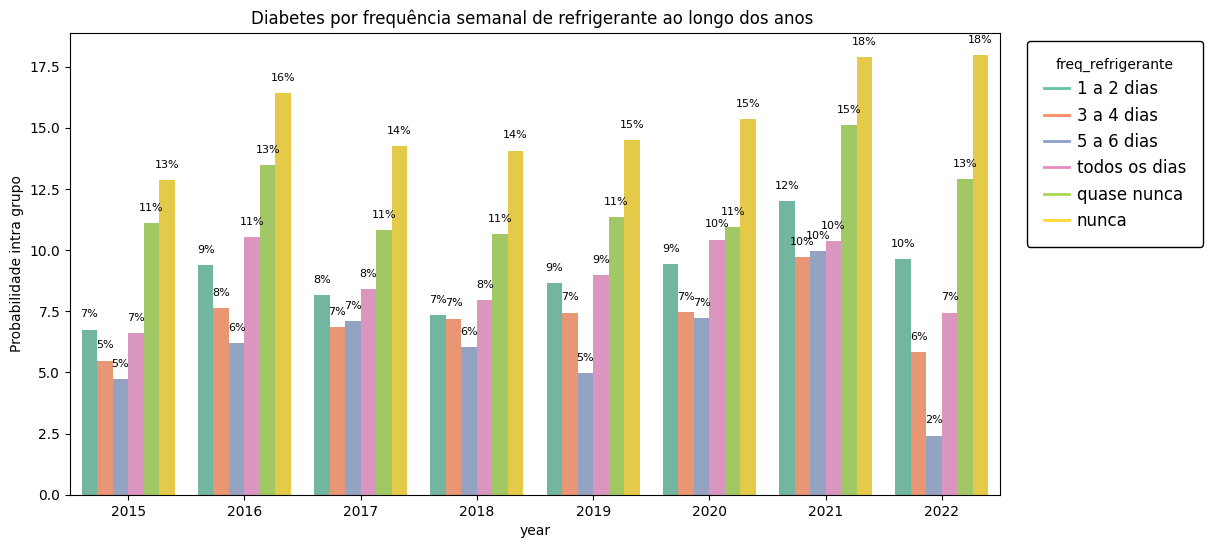

bebida_alcoolica  diabetes  count  percentage  year
0                 1         1    918    6.261510  2015
2                 2         1   2882   10.513644  2015
0                 1         1   1415    8.344144  2016
2                 2         1   3766   13.539457  2016
0                 1         1   1227    7.502752  2017
2                 2         1   3193   11.864155  2017
0                 1         1   1094    6.752253  2018
2                 2         1   3227   12.034758  2018
0                 1         1   1086    6.924254  2019
2                 2         1   3502   12.960290  2019
0                 1         1    791    8.517282  2020
2                 2         1    981   14.235960  2020
0                 1         1    691   10.416039  2021
2                 2         1   1199   17.457775  2021
0                 1         1    168    8.936170  2022
2                 2         1    266   14.876957  2022

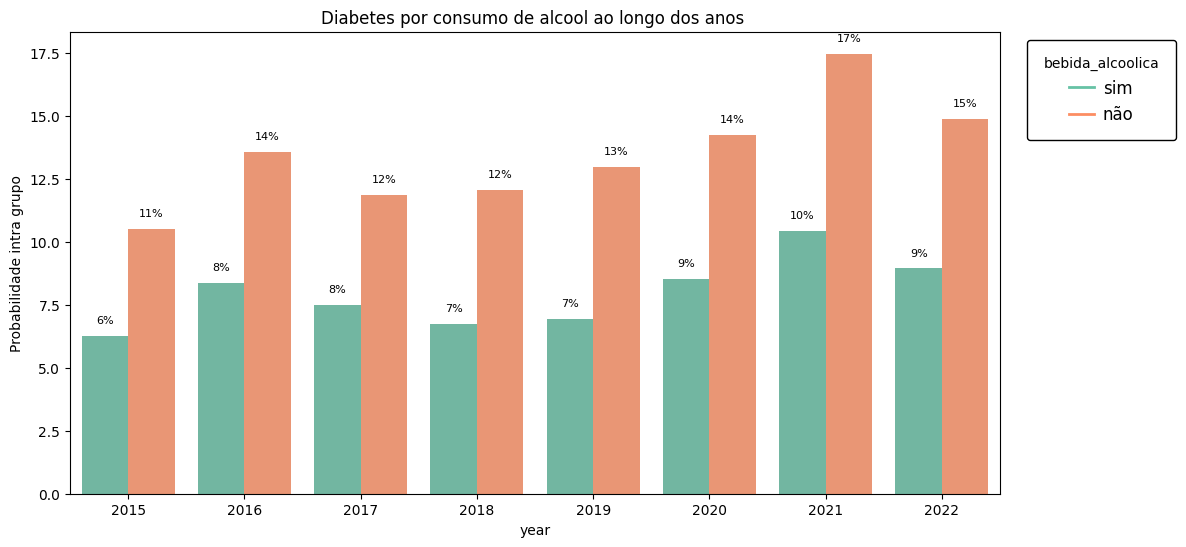

freq_alcool  diabetes  count  percentage  year
0           1.0         1    451    5.462032  2015
2           2.0         1     90    6.479482  2015
4           3.0         1     22    8.979592  2015
6           4.0         1     69   12.387792  2015
8           5.0         1    120    6.633499  2015
10          6.0         1    166    6.905158  2015
0           1.0         1    695    7.694863  2016
2           2.0         1    157    9.257075  2016
4           3.0         1     27    9.215017  2016
6           4.0         1     88   15.357766  2016
8           5.0         1    188    6.988848  2016
10          6.0         1    260    9.723261  2016
0           1.0         1    608    7.214048  2017
2           2.0         1    112    7.221148  2017
4           3.0         1     33   10.543131  2017
6           4.0         1     68   11.239669  2017
8           5.0         1    200    7.022472  2017
10          6.0         1    206    7.895745  2017
0           1.0         1    506    6.274024  2018
2           2.0         1    106    6.919060  2018
4           3.0         1     22    8.461538  2018
6           4.0         1     53   10.037879  2018
8           5.0         1    214    6.776441  2018
10          6.0         1    193    7.258368  2018
0           1.0         1    501    6.413210  2019
2           2.0         1    102    6.831882  2019
4           3.0         1     25    9.615385  2019
6           4.0         1     53    9.464286  2019
8           5.0         1    211    6.806452  2019
10          6.0         1    194    7.889386  2019
0           1.0         1    371    8.376609  2020
2           2.0         1     57    6.900726  2020
4           3.0         1     15   10.000000  2020
6           4.0         1     37   13.309353  2020
8           5.0         1    152    8.491620  2020
10          6.0         1    159    8.765160  2020
0           1.0         1    334    9.922757  2021
2           2.0         1     64   10.339257  2021
4           3.0         1     12   13.043478  2021
6           4.0         1     41   15.413534  2021
8           5.0         1     89    8.725490  2021
10          6.0         1    151   11.880409  2021
0           1.0         1     73    8.295455  2022
2           2.0         1     15   10.273973  2022
4           3.0         1      3    8.571429  2022
6           4.0         1     15   25.000000  2022
8           5.0         1     23    6.948640  2022
10          6.0         1     39    9.112150  2022

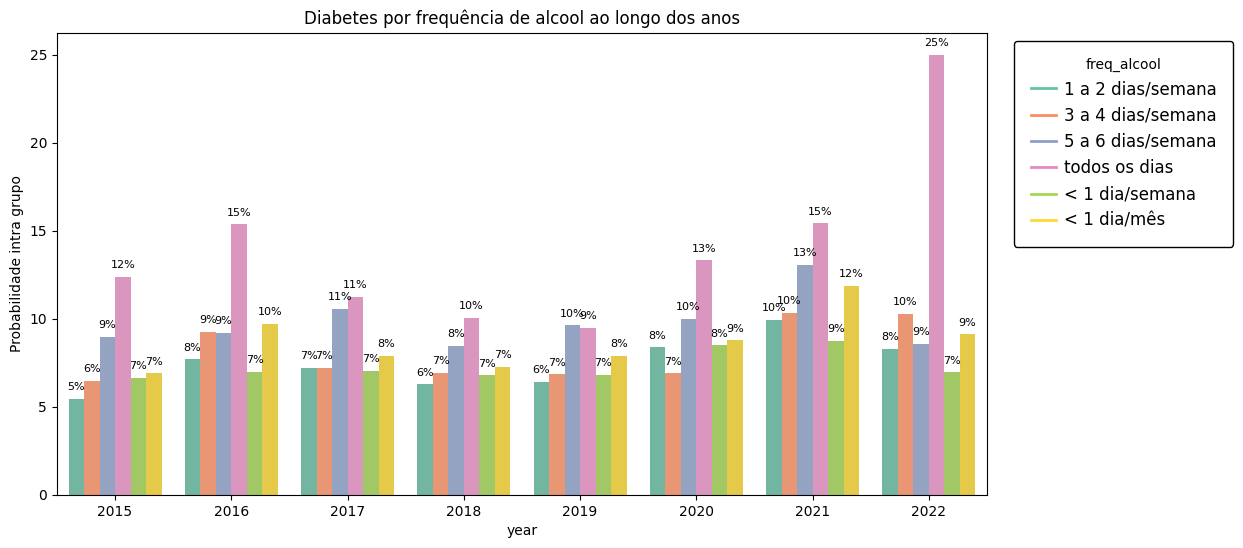

grau_escolaridade  diabetes  count  percentage  year
0                   1         1    438   22.121212  2015
2                   2         1     11   18.333333  2015
4                   3         1    133   19.703704  2015
6                   4         1    789   13.755230  2015
8                   5         1   1233    7.935384  2015
..                ...       ...    ...         ...   ...
6                   4         1     81   18.793503  2022
8                   5         1    135    9.782609  2022
10                  6         1    117    9.669421  2022
12                  7         1     33    8.291457  2022
14                  8         1     16   37.209302  2022

[64 rows x 5 columns]

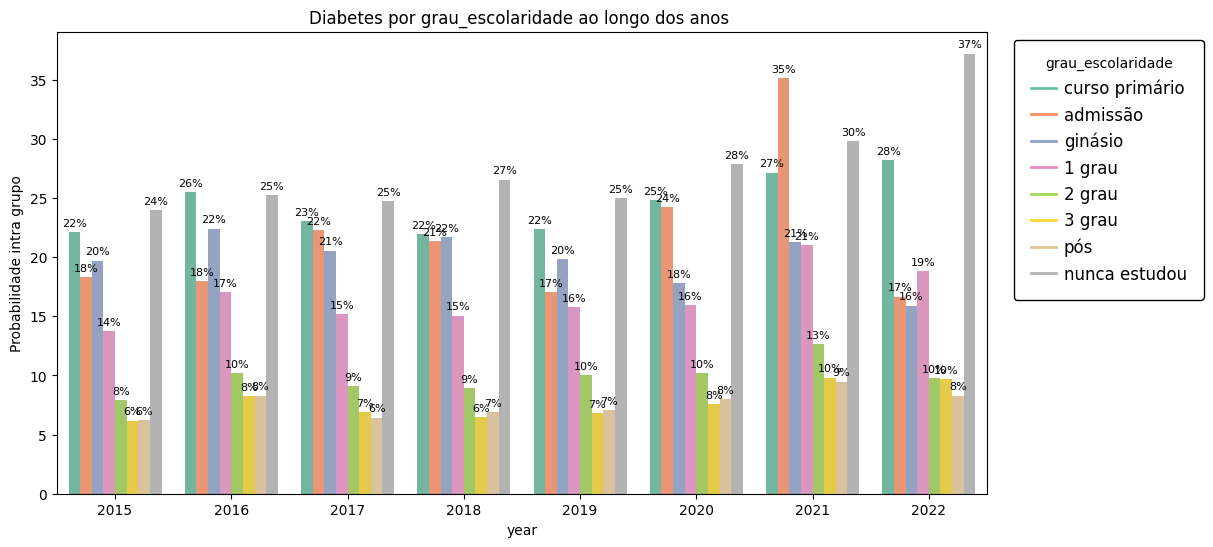

moradores  diabetes  count  percentage  year
0           1         1    605   13.402747  2015
2           2         1   1212   12.004754  2015
4           3         1    900    8.600096  2015
6           4         1    571    6.135167  2015
8           5         1    292    6.345067  2015
10  6 ou mais         1    220    7.122046  2015
0           1         1    816   17.801047  2016
2           2         1   1735   15.804336  2016
4           3         1   1124   10.018718  2016
6           4         1    784    7.993475  2016
8           5         1    446    9.057677  2016
10  6 ou mais         1    276    8.466258  2016
0           1         1    743   15.259807  2017
2           2         1   1550   13.647970  2017
4           3         1    974    9.084973  2017
6           4         1    647    7.168181  2017
8           5         1    297    6.644295  2017
10  6 ou mais         1    209    7.400850  2017
0           1         1    680   14.968083  2018
2           2         1   1517   13.346824  2018
4           3         1    969    8.851740  2018
6           4         1    653    7.134273  2018
8           5         1    294    6.720000  2018
10  6 ou mais         1    208    7.902736  2018
0           1         1    742   15.545778  2019
2           2         1   1660   14.160198  2019
4           3         1   1053    9.599781  2019
6           4         1    646    7.514249  2019
8           5         1    291    7.015429  2019
10  6 ou mais         1    196    7.855711  2019
0           1         1    274   15.939500  2020
2           2         1    649   14.709882  2020
4           3         1    385    9.539148  2020
6           4         1    247    7.307692  2020
8           5         1    129    8.017402  2020
10  6 ou mais         1     88    8.610568  2020
0           1         1    336   19.614711  2021
2           2         1    670   16.897856  2021
4           3         1    439   12.942217  2021
6           4         1    241    9.659319  2021
8           5         1    112    9.798775  2021
10  6 ou mais         1     92   11.586902  2021
0           1         1     55   16.516517  2022
2           2         1    133   15.393519  2022
4           3         1    105   11.653718  2022
6           4         1     64    7.833537  2022
8           5         1     40    9.174312  2022
10  6 ou mais         1     37   11.671924  2022

[1, 2, 3, 4, 5, '6 ou mais']

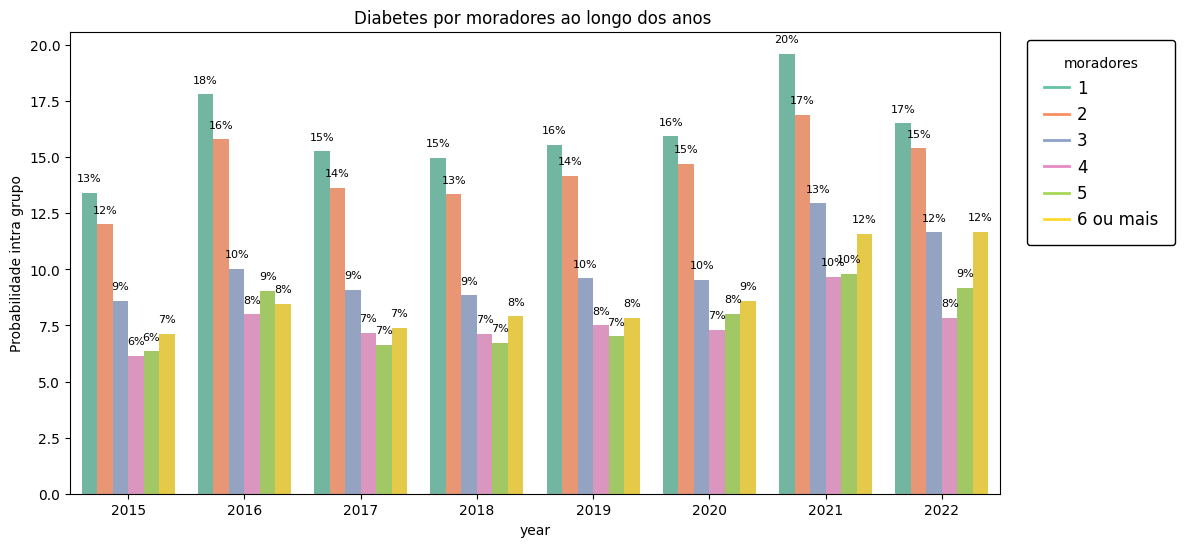

bolsa_familia  diabetes  count  percentage  year
0            1.0         1    186    8.959538  2016
2            2.0         1   4995   11.698714  2016
0            1.0         1    145    8.539458  2017
2            2.0         1   4275   10.284106  2017
0            1.0         1    136    8.066429  2018
2            2.0         1   4185   10.125817  2018
0            1.0         1    114    7.988788  2019
2            2.0         1   4474   10.838703  2019

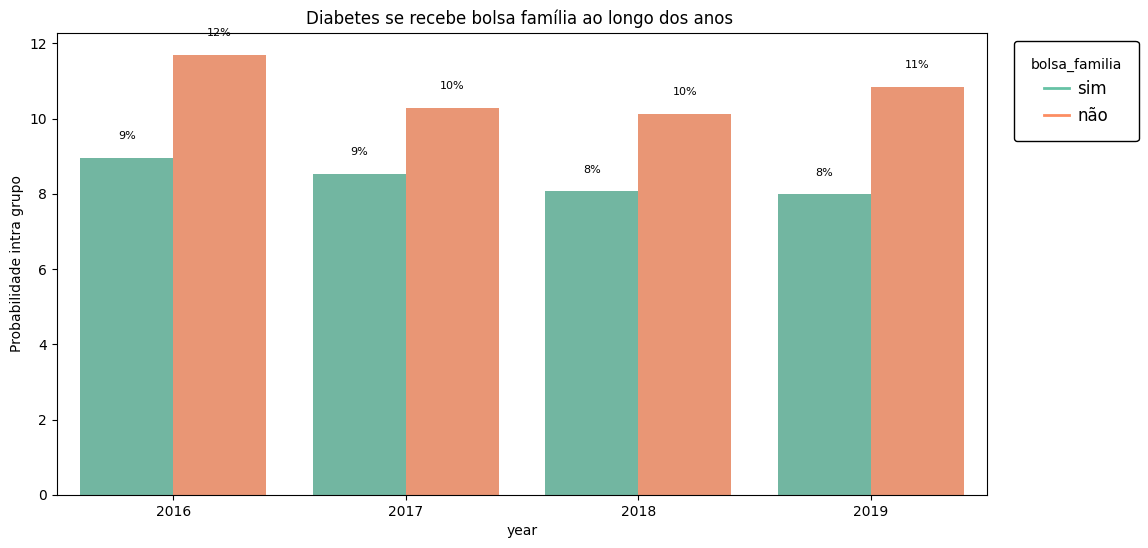

fumante  diabetes  count  percentage  year
0        1         1    213    8.300857  2015
2        2         1     28    5.415861  2015
4        3         1   3559    9.127982  2015
0        1         1    294   10.836712  2016
2        2         1     42    7.216495  2016
4        3         1   4845   11.680891  2016
0        1         1    238    9.770115  2017
2        2         1     43    7.747748  2017
4        3         1   4139   10.276592  2017
0        1         1    209    9.024180  2018
2        2         1     32    6.722689  2018
4        3         1   4080   10.143198  2018
0        1         1    234    9.902666  2019
2        2         1     29    5.502846  2019
4        3         1   4325   10.862740  2019
0        1         1    100    9.652510  2020
2        2         1     27    9.342561  2020
4        3         1   1645   11.075204  2020
0        1         1    110   12.359551  2021
2        2         1     19    9.268293  2021
4        3         1   1761   14.193600  2021
0        1         1     23   11.219512  2022
2        2         1      2    2.739726  2022
4        3         1    409   12.064897  2022

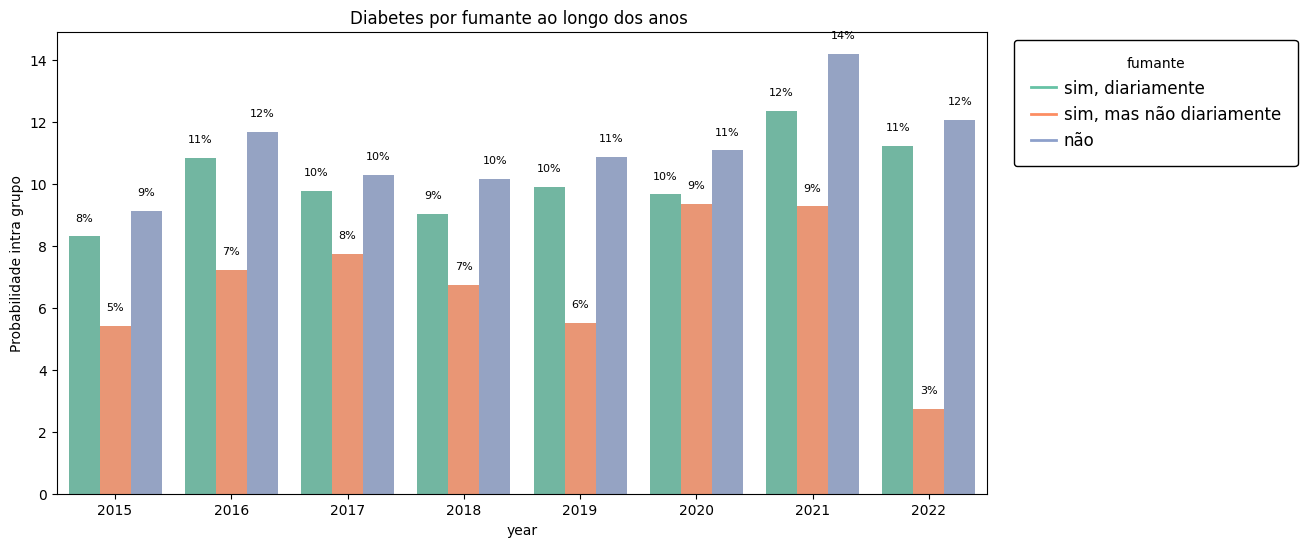

pressao_alta  diabetes  count  percentage  year
0             1         1   2601   20.285447  2015
2             2         1   1199    4.099005  2015
0             1         1   3552   24.513458  2016
2             2         1   1629    5.379256  2016
0             1         1   3064   21.413097  2017
2             2         1   1356    4.682644  2017
0             1         1   3024   21.635544  2018
2             2         1   1297    4.466407  2018
0             1         1   3285   22.201946  2019
2             2         1   1303    4.668745  2019
0             1         1   1225   22.987427  2020
2             2         1    547    5.041939  2020
0             1         1   1352   26.221877  2021
2             2         1    538    6.446202  2021
0             1         1    317   25.138779  2022
2             2         1    117    4.860823  2022

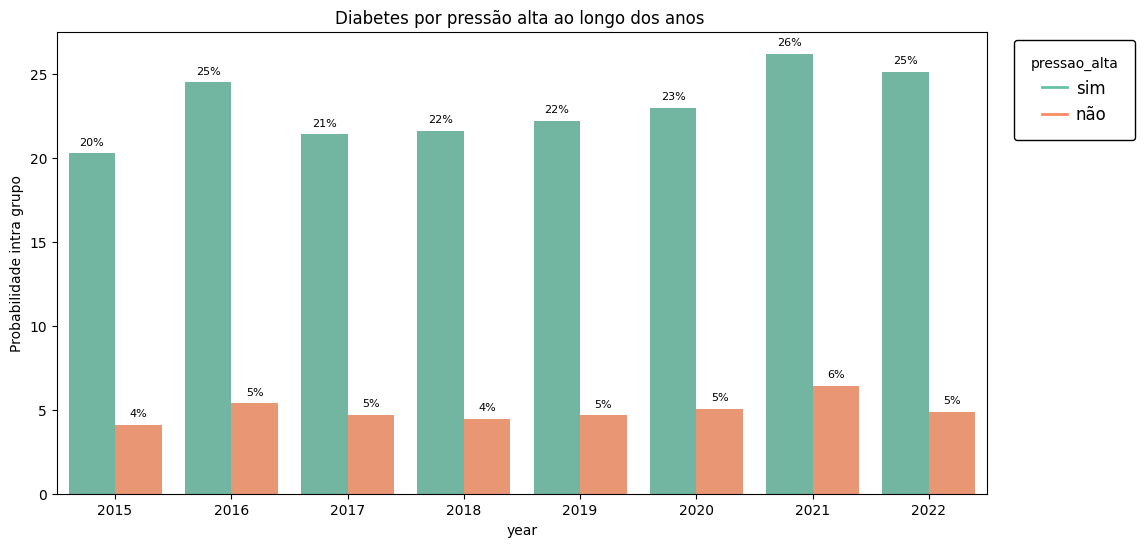

posse_plano_saude  diabetes  count  percentage  year
0                  1         1   2103    8.858840  2015
2                  2         1    125    7.886435  2015
4                  3         1   1572    9.385635  2015
0                  1         1   2910   11.939441  2016
2                  2         1    224   11.239338  2016
4                  3         1   2047   11.120769  2016
0                  1         1   2374   10.104708  2017
2                  2         1    176    9.570419  2017
4                  3         1   1870   10.427122  2017
0                  1         1   2264    9.828095  2018
2                  2         1    151    8.487915  2018
4                  3         1   1906   10.471952  2018
0                  1         1   2339   10.385401  2019
2                  2         1    164   10.006101  2019
4                  3         1   2085   11.243529  2019
0                  1         1    939   11.070502  2020
2                  2         1     61    9.870550  2020
4                  3         1    772   10.907036  2020
0                  1         1    978   14.367563  2021
2                  2         1     61   12.103175  2021
4                  3         1    851   13.745760  2021
0                  1         1    205   12.386707  2022
2                  2         1     19   14.960630  2022
4                  3         1    210   11.134677  2022

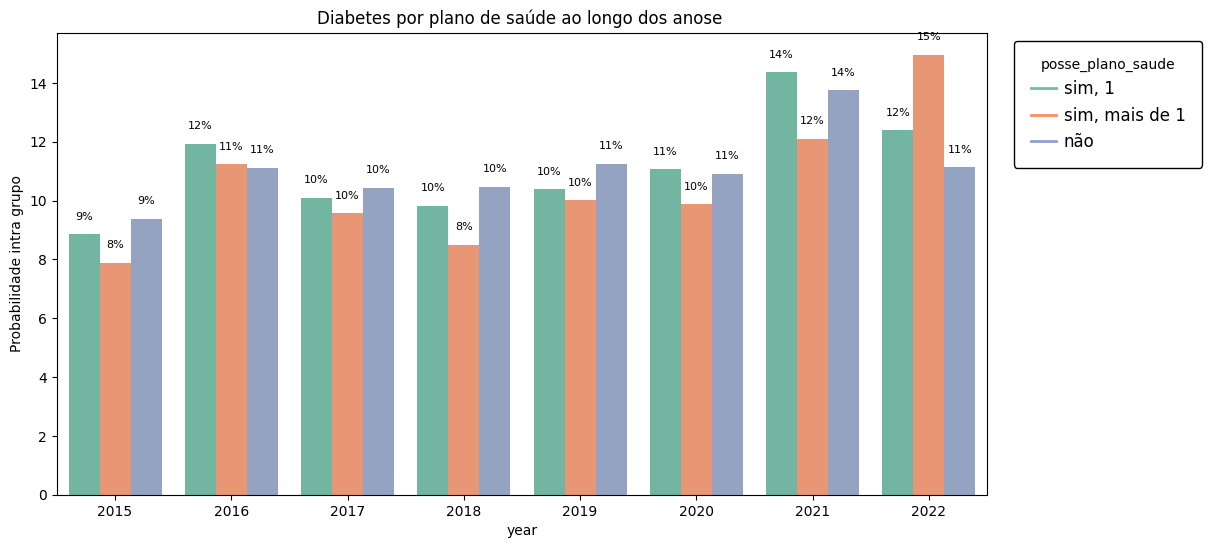

In [56]:
def catplot_var(df,years_list,x_,hue_,title_,graph='bar',height_=5,aspect_=1,x_values=None,xtick_rotation=None,display_data=True,show_perc=True,figsize_=(12, 6),palette=sns.color_palette("Set2")):
    """
    Faz o plot por anos de uma variável categórica pelo 'hue_'. Ex: plot de sexo no x_ e hue_ diabetes irá exibir um plot relacionando os dois
    Recebe a lista de anos a serem analisados, o título, rótulos do eixo x e parâmetros opcionais de estilização
    """
    appended_data = []
    for year in years_list:
      # try:
      df_plot = df[df['ano']==int(year)]

      # Group the data by 'sexo' and 'diabetes', and count the number of cases
      diabetes_count = df_plot.groupby([x_, hue_]).size().reset_index(name='count')

      # Calculate the percentage of diabetes cases per gender
      total_per_gender = diabetes_count.groupby(x_)['count'].transform('sum')
      diabetes_count['percentage'] = diabetes_count['count'] / total_per_gender * 100
      diabetes_count = diabetes_count[diabetes_count['diabetes'].astype(int)==1]
      diabetes_count['year'] = year
      appended_data.append(diabetes_count)

    appended_data = pd.concat(appended_data)

    diabetes_count = appended_data

    if display_data == True:
      display(diabetes_count)
    if graph == 'bar':
      # ax = sns.catplot(x=x_,y='percentage', hue=hue_, kind='bar', data=diabetes_count, legend=True,height=height_,aspect=aspect_,
      #             )
      ax = sns.barplot(x="year", y="percentage", hue=x_, data=diabetes_count,palette=palette)
    elif graph == 'line':
      ax = sns.lineplot(x="year", y="percentage", hue=x_, data=diabetes_count,palette=palette)
    elif graph == 'point':
      ax = sns.violinplot(x="year", y="percentage",hue=x_, data=diabetes_count,palette=palette,
             split=True, inner="stick")

    fig = plt.gcf()
    fig.set_size_inches(figsize_)
    # ax.set_aspect(aspect_)
    plt.title(f'{title_}')
    # if x_values != None:
    #   ax.set_xticklabels(x_values)
    # if xtick_rotation != None:
    #   plt.xticks(rotation = xtick_rotation)

    # plt.legend(['Com diabetes','Sem diabetes'])
    if x_values != None:
      legend_colors = palette
      plt.legend(title=x_, labels=x_values, loc="upper left", facecolor="white",
                framealpha=1, frameon=True, edgecolor="black", borderpad=1, 
                handletextpad=0.5, handlelength=1.5, bbox_to_anchor=(1.02, 1),
                markerscale=1, ncol=1, prop={"size":12}, 
                handles=[plt.Line2D([0], [0], color=c, lw=2) for c in legend_colors])
    else:
      legend_labels = diabetes_count[x_].unique().tolist()
      display(legend_labels)
      legend_colors = palette
      plt.legend(title=x_, labels=legend_labels, loc="upper left", facecolor="white",
                framealpha=1, frameon=True, edgecolor="black", borderpad=1, 
                handletextpad=0.5, handlelength=1.5, bbox_to_anchor=(1.02, 1),
                markerscale=1, ncol=1, prop={"size":12}, 
                handles=[plt.Line2D([0], [0], color=c, lw=2) for c in legend_colors])
    plt.ylabel('Probabilidade intra grupo')
    # Mostrar porcentagens
    if show_perc == True:
      total = len(df_plot)
      for p in plt.gca().patches:
          height = p.get_height()
          plt.text(p.get_x() + p.get_width() / 2, height + 0.5, f'{height:.0f}%', ha='center', fontsize=8)
    plt.show()
    plt.close()
      # except:
      #   print(f"problema com plot de {title_} no ano {year}")

df = df_.copy()
# years_analysis = ['2017','2018','2019','2020','2021','2022']
years_analysis = ['2015','2016','2017','2018','2019','2020','2021','2022']
# display(df)
# um preprocessamento pra todos os anos
df = dataset_preprocessing(df,
                              cols_to_keep = ["ano","cidade","q6","q7","civil","q8a","q9","q11","q16","q25","q27",
                  "q29","q35","q36","q42","q45","q46","q47","q48","q49","q50","q51","q52",
                  "q53","q54","q59a","q60","q61_fx","q64","q69","q74","q75",
                  "r129","q76","q88","moradores","adultos","fet",'imc','r900'],
                              cols_to_rename = rename_cols_dict)
# display(df)

# removendo valores 777 e 888
df = remove_unused_data(df,
                       list_cols = ['sexo','peso','altura','diabetes','faixa_etaria','cidade','exercicio_fisico','freq_horta',
                                    'grau_escolaridade','cor','freq_refrigerante','bebida_alcoolica','freq_alcool','pressao_alta',
                                    'posse_plano_saude','bolsa_familia'],
                       values = ['555','666','777','888']
                       )

# descritivas por ano
for year in years_analysis:
  df_plot = df[df['ano']==int(year)]
  print(f"Descrição geral do dataframe no ano {year}")
  display(df_plot.describe())


# sns.set_palette('Spectral')

# catplot_var(df,years_analysis,'ano','diabetes',f'Diabetes no dataset no ano de', height_=5.4, aspect_=9.7/5.4)

catplot_var(df,years_analysis,'sexo','diabetes',f'Diabetes por sexo ao longo dos anos ',graph='line',x_values=["Homem","Mulher"])

catplot_var(df,years_analysis,'cor','diabetes',f'Diabetes por cor ao longo dos anos',x_values=["branca","preta","amarela","parda","indígena"],xtick_rotation=45)

catplot_var(df,years_analysis,'faixa_etaria','diabetes',f'Diabetes por faixa etária ao longo dos anos',graph='line')

catplot_var(df,years_analysis,'classe_imc','diabetes',f'Diabetes por classe_imc ao longo dos anos',graph='line',xtick_rotation=45)

# plot de imc por faixa etária e diabetes
# for year in years_analysis:
#   df_plot = df[df['ano']==int(year)]
#   ax = sns.scatterplot(x='faixa_etaria', y='imc', hue='diabetes', data=df_plot,palette='tab10')# 
#   plt.title(f'Relação de Idade, IMC e Diabetes no ano de {year}')
#   plt.xlabel('Idade')
#   plt.ylabel('IMC')
#   ticks_loc = [".","18 a 24","25 a 34","35 a 44","45 a 54","55 a 64","65+"]
#   ax.set_xticklabels(ticks_loc)
#   plt.xticks(rotation = 45)
#   plt.show()
#   plt.close()
for year in years_analysis:
  # try:
  df_plot = df[df['ano']==int(year)]
  boxplot_colors = ['green', 'red']
  ax = sns.boxplot(x='faixa_etaria', y='imc', hue='diabetes', data=df_plot,palette=boxplot_colors)# 
  plt.title(f'Relação de Idade, IMC e Diabetes no ano de {year}')
  plt.xlabel('Idade')
  plt.ylabel('IMC')
  ticks_loc = ["18 a 24","25 a 34","35 a 44","45 a 54","55 a 64","65+"]
  ax.set_xticklabels(ticks_loc)
  plt.xticks(rotation = 45)
  plt.legend(title="Diabetes", loc='upper left', facecolor='white', framealpha=1, frameon=True,
            edgecolor='black', borderpad=1, handletextpad=0.5, handlelength=1.5, bbox_to_anchor=(1.02, 1), markerscale=1, ncol=1,
            prop={'size': 12}, labels=['Com Diabetes', 'Sem Diabetes'],handles=[plt.Line2D([0], [0], color=c, lw=2) for c in boxplot_colors])
  plt.show()
  plt.close()


catplot_var(df,years_analysis,'regiao','diabetes',f'Diabetes por região do país ao longo dos anos ',height_=5.4, aspect_=9.7/5.4)

catplot_var(df,years_analysis,'exercicio_fisico','diabetes',f'Diabetes por exercicio fisico ao longo dos anos',graph='line',x_values=["sim","não"])

catplot_var(df,years_analysis,'freq_horta','diabetes',f'Diabetes por frequência semanal de horta ao longo dos anos ',
            x_values=["1 a 2 dias por semana","3 a 4 dias por semana","5 a 6 dias por semana","todos os dias","quase nunca","nunca"],xtick_rotation=45)

catplot_var(df,years_analysis,'freq_refrigerante','diabetes',f'Diabetes por frequência semanal de refrigerante ao longo dos anos ',
            x_values=["1 a 2 dias","3 a 4 dias","5 a 6 dias","todos os dias","quase nunca","nunca"],xtick_rotation=45)

catplot_var(df,years_analysis,'bebida_alcoolica','diabetes',f'Diabetes por consumo de alcool ao longo dos anos ',
            x_values=["sim","não"],xtick_rotation=45)

catplot_var(df,years_analysis,'freq_alcool','diabetes',f'Diabetes por frequência de alcool ao longo dos anos',
            x_values=["1 a 2 dias/semana","3 a 4 dias/semana","5 a 6 dias/semana","todos os dias","< 1 dia/semana","< 1 dia/mês"],xtick_rotation=45)

# catplot_var(df,'feijao','diabetes',f'Diabetes por feijao no ano de {year}')

catplot_var(df,years_analysis,'grau_escolaridade','diabetes',f'Diabetes por grau_escolaridade ao longo dos anos ',
            x_values=["curso primário","admissão","ginásio","1 grau","2 grau","3 grau","pós","nunca estudou"],xtick_rotation=45, height_=5.4, aspect_=9.7/5.4)

catplot_var(df,years_analysis,'moradores','diabetes',f'Diabetes por moradores ao longo dos anos ', height_=5.4, aspect_=9.7/5.4)

catplot_var(df,years_analysis,'bolsa_familia','diabetes',f'Diabetes se recebe bolsa família ao longo dos anos ',
            x_values=["sim","não"],xtick_rotation=45)

catplot_var(df,years_analysis,'fumante','diabetes',f'Diabetes por fumante ao longo dos anos ',
            x_values=["sim, diariamente","sim, mas não diariamente","não"],xtick_rotation=45)

catplot_var(df,years_analysis,'pressao_alta','diabetes',f'Diabetes por pressão alta ao longo dos anos ',x_values=["sim","não"],xtick_rotation=45)

catplot_var(df,years_analysis,'posse_plano_saude','diabetes',f'Diabetes por plano de saúde ao longo dos anose ',x_values=["sim, 1","sim, mais de 1","não"],xtick_rotation=45)



## coisas antigas Testando visualizações no df padrão de 2019

<Axes: xlabel='faixa_etaria', ylabel='imc'>

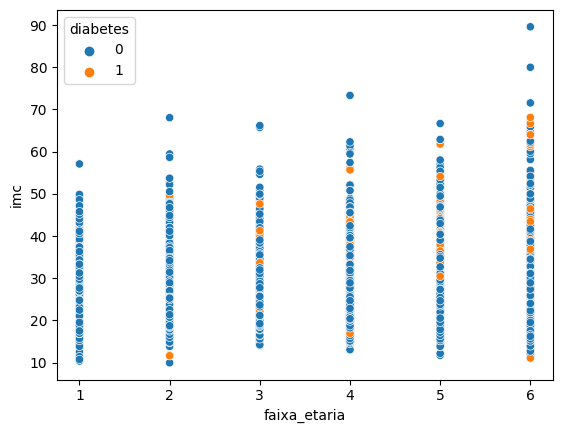

In [30]:
# Scatter plot to visualize relationship between age, BMI, and diabetes
sns.scatterplot(x='faixa_etaria', y='imc', hue='diabetes', data=df_ada)


<Axes: xlabel='imc', ylabel='diabetes'>

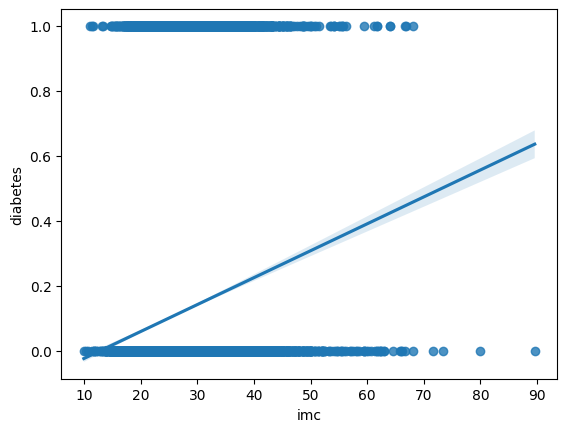

In [31]:
# df_ada.scatter(column='cidade', by='diabetes', figsize=(5,6))

sns.regplot(x=df_ada['imc'], y=df_ada['diabetes'])
# sns.swarmplot(x=df_ada['imc'], y=df_ada['diabetes'])


<Axes: title={'center': 'cidade'}, xlabel='diabetes'>

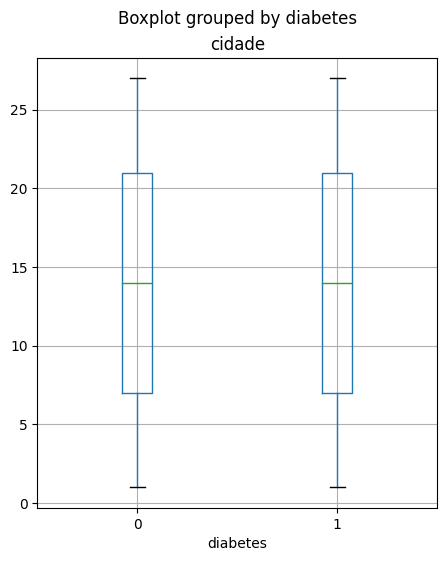

In [32]:
df_ada.boxplot(column='cidade', by='diabetes', figsize=(5,6))

Agrupando e estatísticas gerais

In [33]:
# Define the relevant columns to group by
group_columns = ['faixa_etaria', 'sexo']

for col in group_columns:
  # Calculate the total count of observations in each group
  total_counts = df_ada.groupby(col)['chave'].count()

  # Calculate the percentage of diabetes cases in each group
  grouped_data = (df_ada.groupby(col)
                  ['diabetes']
                  .apply(lambda x: (x.sum() / total_counts.loc[x.name]) * 100)
                  .reset_index(name='percentage of diabetes'))

  # Display the resulting table
  display(grouped_data)

faixa_etaria  percentage of diabetes
0             1                0.719424
1             2                1.405384
2             3                3.327092
3             4                7.083739
4             5               14.852138
5             6               21.389979

sexo  percentage of diabetes
0     1               11.114743
1     2               12.352958

In [34]:
# Define the relevant columns to group by
group_columns = [ 'sexo', 'faixa_etaria']

# Calculate the total count of observations in each group
total_counts = df_ada.groupby(group_columns)['chave'].count()

# Calculate the percentage of each category within each group
grouped_data = (df_ada.groupby(group_columns)
                [['imc', 'hipertensao', 'ativo_fis', 'peso', 'diabetes', 'altura']]
                .apply(lambda x: (x.sum() / total_counts.loc[x.name]) * 100))



In [35]:
# Define the relevant columns to group by
group_columns = [ 'diabetes']

# Calculate the total count of observations in each group
total_counts = df_ada.groupby(group_columns)['chave'].count()

# Calculate the percentage of each category within each group
# grouped_data = (df_ada.groupby(group_columns)
#                 [['hipertensao', 'ativo_fis', 'peso', 'altura']]
#                 .apply(lambda x: (x.sum() / total_counts.loc[x.name]) * 100))
grouped_data = (df_ada.groupby(group_columns)
                .apply(lambda x: (x.value_counts(normalize=True, dropna=False) * 100))
                .reset_index(level=[0,1], drop=True))



In [36]:
# Display the descriptive statistics table
grouped_data

hipertensao  ativo_fis  peso  diabetes  altura  cidade  sexo  faixa_etaria  chave        imc_calc   classe_imc    
0            1          33    0         182     18      1     2             29398126026  9.962565   Abaixo do peso    0.002165
1            1          80    0         167     26      1     6             24371562035  28.685145  Sobrepeso         0.002165
             2          80    0         167     1       1     3             58391177024  28.685145  Sobrepeso         0.002165
                                                3       2     6             80312523026  28.685145  Sobrepeso         0.002165
                                                5       2     6             81375266030  28.685145  Sobrepeso         0.002165
                                                                                                                        ...   
                        68    1         161     18      2     6             21396136021  26.233556  Sobrepeso         0.015

In [37]:
def plot_count_stats(df, count_col, title):
    """
    Receives a dataframe with categorical columns and a column to take the average and returns a plot.

    Parameters
    ----------   
    df: dataframe:
        Dataframe containing desired columns
    count_col: str:
        Name of the column with values to count
    title: str:
        Title of the plot
        
    
    Returns
    -------
    Plots the desired analysis
    """
    plt.rcParams['figure.figsize'] = (10,4.8)
    ax = sns.countplot(x=count_col, data=df, hue=count_col, dodge=False,
                      palette = sns.cubehelix_palette(8),order = df[count_col].value_counts().index )
    # colocar as labels por barras
    # for p, label in zip(ax.patches, df_ada["faixa_etaria"].value_counts().index):
    #     ax.annotate(label, (p.get_x()+0.5, p.get_height()+0.15),ha='center')
    abs_values = df[count_col].value_counts(ascending=False).values
    rel_values =  df[count_col].value_counts(ascending=False, normalize=True).values * 100
    lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

    ax.bar_label(container=ax.containers[0], labels=lbls)

    plt.title(f'{title}')
    plt.show()

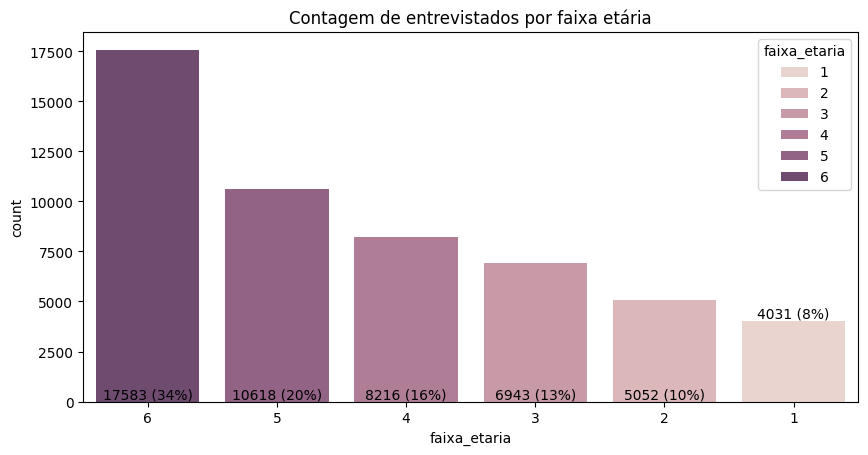

In [38]:
plot_count_stats(df_ada,'faixa_etaria','Contagem de entrevistados por faixa etária')

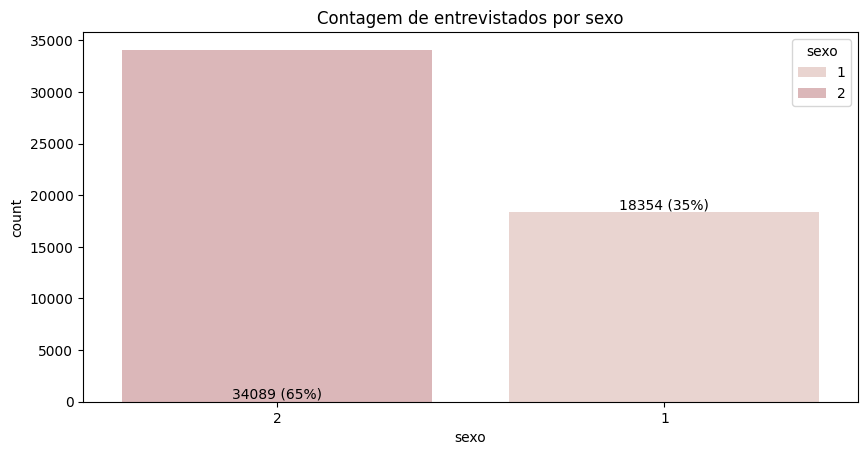

In [39]:
plot_count_stats(df_ada,'sexo','Contagem de entrevistados por sexo')

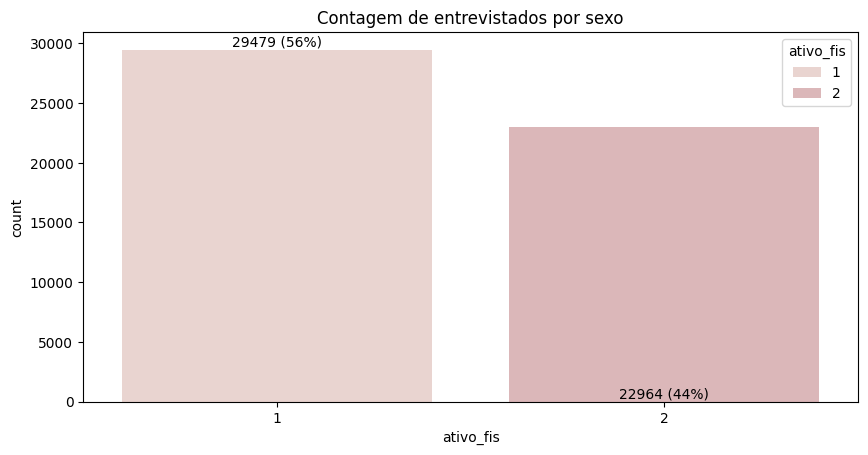

In [40]:
plot_count_stats(df_ada,'ativo_fis','Contagem de entrevistados por sexo')

In [41]:
df_ada.groupby(by=["faixa_etaria"]).count()

imc  hipertensao  ativo_fis   peso  diabetes  altura  cidade  \
faixa_etaria                                                                   
1              3644         4031       4031   4031      4031    4031    4031   
2              4755         5052       5052   5052      5052    5052    5052   
3              6504         6943       6943   6943      6943    6943    6943   
4              7622         8216       8216   8216      8216    8216    8216   
5              9735        10618      10618  10618     10618   10618   10618   
6             14859        17583      17583  17583     17583   17583   17583   

               sexo  chave  imc_calc  classe_imc  
faixa_etaria                                      
1              4031   4031      4031        4031  
2              5052   5052      5052        5052  
3              6943   6943      6943        6943  
4              8216   8216      8216        8216  
5             10618  10618     10618       10618  
6             17583  17583     17583       17583

In [42]:
df_ada['faixa_etaria'].value_counts()

6    17583
5    10618
4     8216
3     6943
2     5052
1     4031
Name: faixa_etaria, dtype: int64

<Axes: title={'center': 'Contagem de valores nulos por coluna'}>

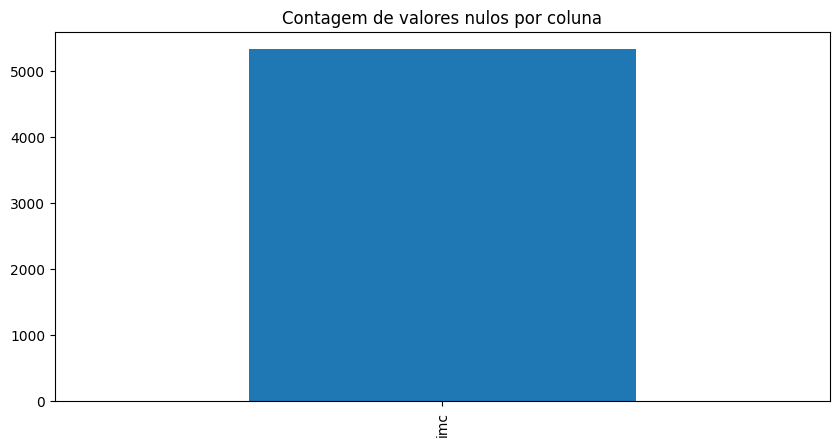

In [43]:
nas_count = df_ada.isna().sum()[df_ada.isna().sum()>0]
nas_count = nas_count.sort_values()
plt.title('Contagem de valores nulos por coluna')
nas_count.plot(kind='bar')

In [44]:
# dropar nas
df_ada = df_ada.dropna()
nas_count = df_ada.isna().sum()[df_ada.isna().sum()>0]
nas_count = nas_count.sort_values()
nas_count

Series([], dtype: int64)

In [45]:
# substituir 2 e 1 por 0 e 1
df_ada['ativo_fis'] = df_ada['ativo_fis'].replace({1: 0, 2: 1})
df_ada


<ipython-input-45-a95c3c227108>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ada['ativo_fis'] = df_ada['ativo_fis'].replace({1: 0, 2: 1})


imc  hipertensao  ativo_fis  peso  diabetes  altura  cidade  \
0      26.218821            1          1    74         0     168      27   
1      22.546576            0          1    57         0     159      27   
3      21.453287            0          0    62         0     170      10   
4      25.148605            0          0    66         0     162      10   
5      24.092970            1          1    68         0     168      10   
...          ...          ...        ...   ...       ...     ...     ...   
52435  27.407658            0          0    65         0     154      17   
52436  31.111111            1          1    70         0     150      17   
52437  28.906250            1          0    74         0     160      17   
52438  24.034407            0          0    57         0     154      17   
52439  16.233072            0          0    38         0     153       7   

       sexo  faixa_etaria        chave   imc_calc          classe_imc  
0         1             6    311666031  26.218821           Sobrepeso  
1         1             6    318136030  22.546576         Peso normal  
3         1             6   2323676021  21.453287         Peso normal  
4         1             6   2323716024  25.148605           Sobrepeso  
5         1             5   2328716023  24.092971         Peso normal  
...     ...           ...          ...        ...                 ...  
52435     2             6  81313475032  27.407657           Sobrepeso  
52436     2             6  81315865038  31.111111  Obesidade classe I  
52437     2             6  93317125038  28.906250           Sobrepeso  
52438     2             6  94312585036  24.034407         Peso normal  
52439     2             6  98318694029  16.233073      Abaixo do peso  

[47119 rows x 12 columns]

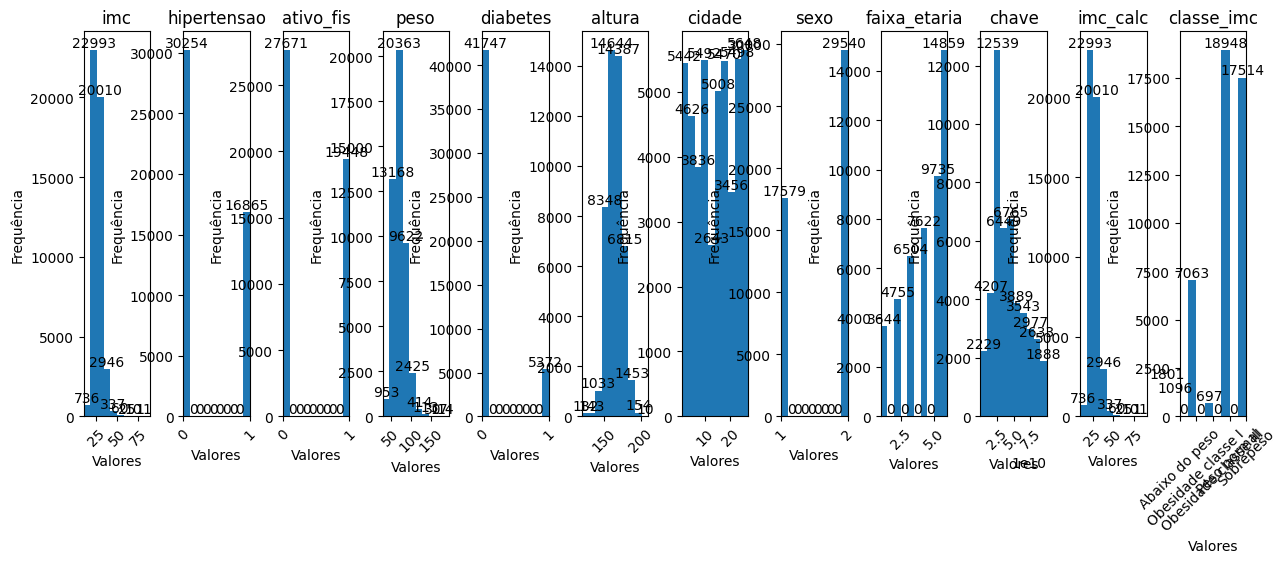

In [46]:
num_colunas = df_ada.shape[1]

# Criando um subplots com 1 linha e num_colunas colunas
fig, axs = plt.subplots(1, num_colunas, figsize=(15, 5))

# Plotando o histograma de cada coluna
for i in range(num_colunas):
    axs[i].hist(df_ada.iloc[:, i])
    axs[i].set_title(df_ada.columns[i])
    axs[i].set_xlabel('Valores')
    axs[i].set_ylabel('Frequência')
    axs[i].set_xlim([min(df_ada.iloc[:, i]), max(df_ada.iloc[:, i])])
    axs[i].tick_params(axis='x', labelrotation=45)

    # Adicionando a contagem de valores nas barras
    for rect in axs[i].patches:
        x = rect.get_x() + rect.get_width() / 2
        y = rect.get_height()
        axs[i].text(x, y, f'{int(y)}', ha='center', va='bottom')

# Ajustando o espaçamento entre os subplots
plt.subplots_adjust(wspace=0.5)
# Exibindo o gráfico
plt.show()

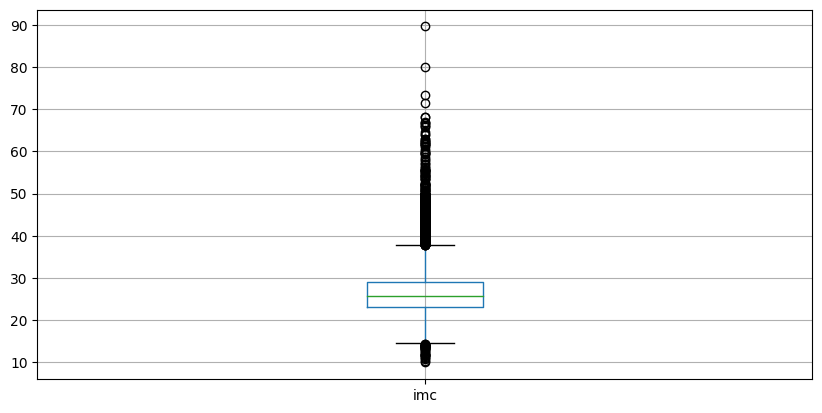

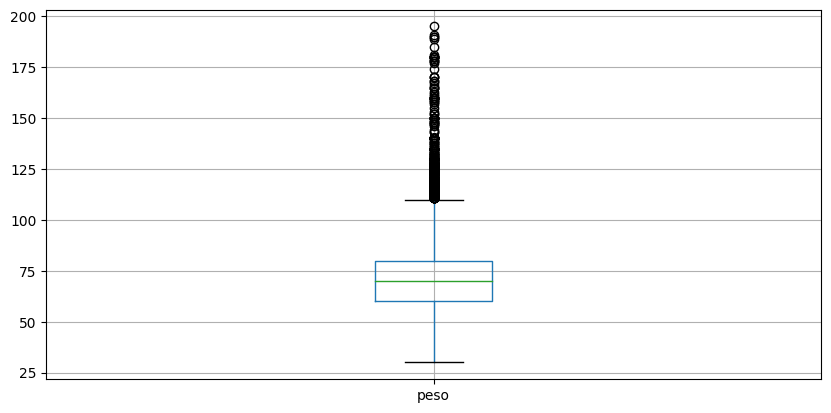

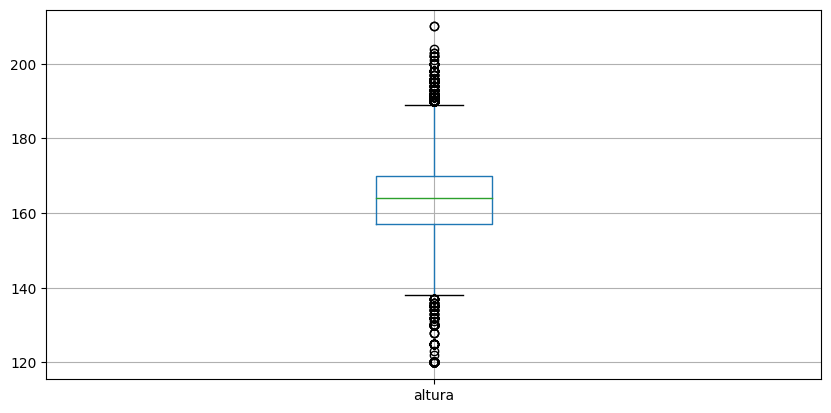

In [47]:
# boxplot do imc - algum tratamento especial pra outliers? 
for col in ['imc','peso','altura']:
    
  df_ada.boxplot(column=col)
  # Exibindo o gráfico
  plt.show()

<ipython-input-48-318d15ff4474>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_ada.corr()


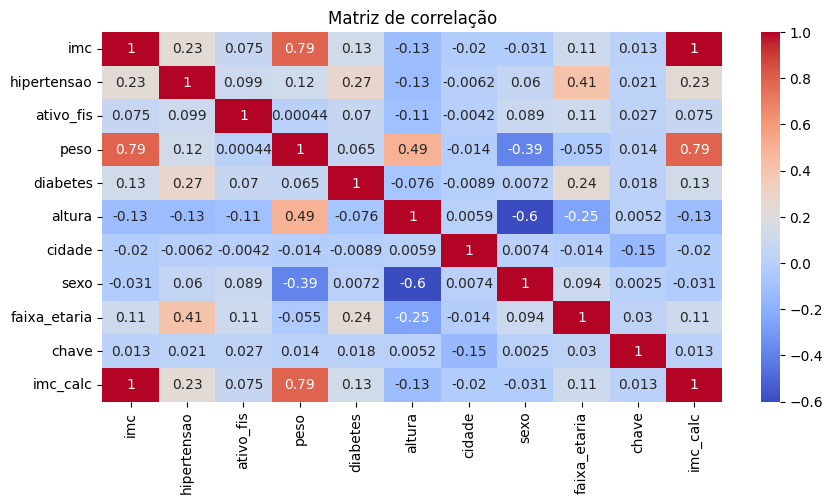

In [48]:
# Calculando a matriz de correlação
corr_matrix = df_ada.corr()

# Plotando a matriz de correlação
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title('Matriz de correlação')
plt.show()


In [49]:
# normalização

# Criando um objeto scaler
scaler = MinMaxScaler()

# Selecionando as colunas para normalização
cols_to_normalize = ['imc','peso']

# Aplicando a normalização min-max nas colunas selecionadas
df_ada[cols_to_normalize] = scaler.fit_transform(df_ada[cols_to_normalize])

<ipython-input-49-3bade5bd9084>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ada[cols_to_normalize] = scaler.fit_transform(df_ada[cols_to_normalize])


In [50]:
df_ada

imc  hipertensao  ativo_fis      peso  diabetes  altura  cidade  \
0      0.204128            1          1  0.266667         0     168      27   
1      0.158016            0          1  0.163636         0     159      27   
3      0.144288            0          0  0.193939         0     170      10   
4      0.190690            0          0  0.218182         0     162      10   
5      0.177434            1          1  0.230303         0     168      10   
...         ...          ...        ...       ...       ...     ...     ...   
52435  0.219056            0          0  0.212121         0     154      17   
52436  0.265560            1          1  0.242424         0     150      17   
52437  0.237874            1          0  0.266667         0     160      17   
52438  0.176699            0          0  0.163636         0     154      17   
52439  0.078738            0          0  0.048485         0     153       7   

       sexo  faixa_etaria        chave   imc_calc          classe_imc  
0         1             6    311666031  26.218821           Sobrepeso  
1         1             6    318136030  22.546576         Peso normal  
3         1             6   2323676021  21.453287         Peso normal  
4         1             6   2323716024  25.148605           Sobrepeso  
5         1             5   2328716023  24.092971         Peso normal  
...     ...           ...          ...        ...                 ...  
52435     2             6  81313475032  27.407657           Sobrepeso  
52436     2             6  81315865038  31.111111  Obesidade classe I  
52437     2             6  93317125038  28.906250           Sobrepeso  
52438     2             6  94312585036  24.034407         Peso normal  
52439     2             6  98318694029  16.233073      Abaixo do peso  

[47119 rows x 12 columns]